In [1]:
import pandas as pd
from tqdm import tqdm
import os
import csv
import pickle
import gzip
import matplotlib as mpl
import matplotlib.pyplot as plt
import graph_tool.all as gt
from config import TWITTER_DATA_DIR
from config import FOLLOWER_DATA_DIR
from cascade import Cascade
from tweet import Tweet, MissingTweet 
from wand.image import Image as WImage
import pickle
import numpy as np
import preprocessing

In [2]:
%load_ext autoreload
%autoreload 2

# Load Tweet Time Series Data and User Data

In [3]:
campaigns = preprocessing.load_campaign()
users = preprocessing.load_user_data()

# Extracting Largest Cascades

In [6]:
min_size = lambda x: x.n_retweets > 30
top_cascades = preprocessing.process_campaign(campaigns, top_n=100, filter_func=min_size)

100%|██████████| 75/75 [00:25<00:00,  2.94it/s]


## Collecting High Influence Nodes in Large Cascades
cascades are more than 50 tweets

In [35]:
min_size = lambda x: x.n_retweets > 50

In [36]:
res = preprocessing.process_campaign(campaigns, filter_func=min_size)

100%|██████████| 75/75 [00:22<00:00,  3.27it/s]


In [37]:
top_tweets = [t for c in res for t in c.get_top_tweets(thresh=5)]

In [38]:
def summarize_top_tweets(top_tweets, rt_thresh=0):
    # input: [(Tweet, (implied) RT count)]
    # output: info about these tweets
    labels = []#[get_user_type(tweet.username) for tweet, rt_count in top_tweets]
    rt_counts = []#[rt_count for tweet, rt_count in top_tweets]
    
    label_dict = {}
    for tweet, rt_count in top_tweets:
        if rt_count > rt_thresh:
            user_type = users.type.get(tweet.username, 'Unknown')
            labels.append(user_type)
            rt_counts.append(rt_count)
            temp = label_dict.get(user_type, [])
            temp.append(rt_count)
            label_dict[user_type] = temp
    
    return label_dict
#label_dict = summarize_top_tweets(top_tweets)

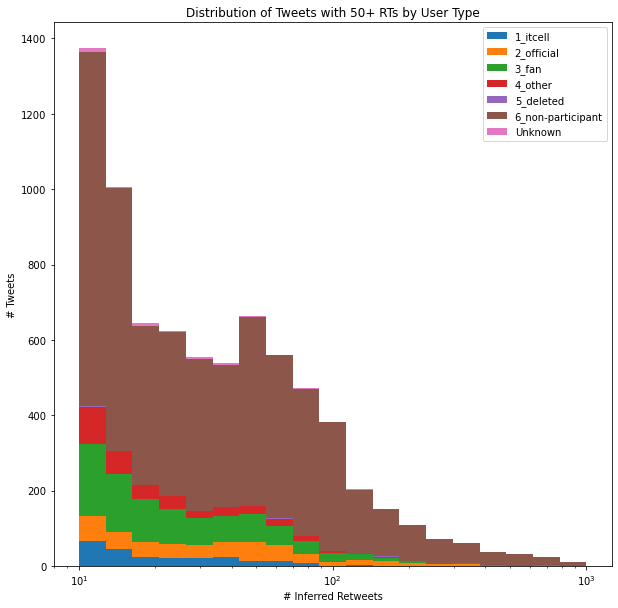

In [39]:
label_dict = summarize_top_tweets(top_tweets)
keys, values = list(label_dict.keys()), list(label_dict.values())
sorted_keys, sorted_values = zip(*sorted(zip(keys, values), key=lambda x: x[0]))

plt.figure(figsize=(10,10))
logbins = np.geomspace(10, 1000, 20)
plt.hist(sorted_values, stacked=True, label=sorted_keys, bins=logbins)
plt.legend()
plt.xscale('log')
plt.xlabel('# Inferred Retweets')
plt.ylabel('# Tweets')
plt.title('Distribution of Tweets with 50+ RTs by User Type')
plt.savefig('top_tweets_by_user.png')

## Distribution of All Retweets Of Templates

In [8]:
def extract_tweets(cascade, result_list, min_size=50, rt_thresh=5, template=False):
    ''' Helper function takes a cascade and builds 
    a global list top_tweets with tweets that satisfy the various criteria
    min_size: the # of tweets in a cascade to be considered
    rt_thresh: how many rts a tweet has to have to be added
    template: boolean for whether the root must be a template
    '''
    if template and cascade.root.template == '':
        return
    if cascade.n_retweets > min_size:
        result_list += cascade.get_top_tweets(thresh=rt_thresh)

In [10]:
template_rts = []
for tag, tweets in campaigns.items():
        preprocessing.parse_cascades_low_mem(*preprocessing.process_tweet_ts(tweets.values()), 
                               cascade_func=lambda x: extract_tweets(x, template_rts, min_size=0, 
                                                                     rt_thresh=0, template=True))

  0%|          | 0/7386 [00:00<?, ?it/s]

'missing_1082197976494292992'
'missing_1081808701944516608'
'missing_1081813653798539264'


  1%|▏         | 100/7386 [00:00<02:30, 48.47it/s]

'missing_1097054185340600320'
'missing_1097054219763240961'
'missing_1097054259810463744'
'missing_1097054302961463296'
'missing_1097054343587491841'


  2%|▏         | 153/7386 [00:01<01:31, 78.88it/s]

'missing_1097056302415499264'


  7%|▋         | 532/7386 [00:02<00:26, 262.53it/s]

'missing_1097061396322242560'


  8%|▊         | 609/7386 [00:02<00:23, 286.29it/s]

'missing_1097061892059652096'
'missing_1097061900758638592'
'missing_1097061940298305536'
'missing_1097061955276173313'
'missing_1097061966336512000'
'missing_1097061979800260608'
'missing_1097061990403457024'
'missing_1097061998813011969'
'missing_1097062008078315520'
'missing_1097062016596889600'
'missing_1097062032392609793'
'missing_1097062048075141120'
'missing_1097062058607075328'
'missing_1097062068442656769'
'missing_1097062075824631808'
'missing_1097062085811306497'
'missing_1097062104786362368'
'missing_1097062229193703424'
'missing_1097093032145412096'
'missing_1097062311943200768'
'missing_1097062705264033793'
'missing_1097105289440948225'


 11%|█         | 794/7386 [00:03<00:38, 173.13it/s]

'missing_1097063853869871104'


 25%|██▍       | 1832/7386 [00:05<00:10, 528.78it/s]

'missing_1097074716408467456'
'missing_1097099582788358148'
'missing_1097089361365983234'
'missing_1097135731816964096'


 43%|████▎     | 3145/7386 [00:06<00:04, 924.71it/s]

'missing_1097744831579750400'
'missing_1097079997695574017'
'missing_1097080063466459136'
'missing_1097080098405011458'
'missing_1097080199022141441'
'missing_1097097488991956994'
'missing_1097080335135735808'
'missing_1097080942332727297'
'missing_1097082817052377089'
'missing_1097083608945311746'
'missing_1097083613944991744'
'missing_1097083612258803712'
'missing_1097083610581135360'
'missing_1097085177199771649'
'missing_1097086526142513153'
'missing_1097119501185896448'
'missing_1097086711450857472'
'missing_1097086739804352512'
'missing_1097092744860692480'
'missing_1097093247623520257'
'missing_1097105153407086593'
'missing_1097092830671994881'
'missing_1097092841187069952'
'missing_1097105161053396994'
'missing_1097092876608012288'
'missing_1097105212446130176'
'missing_1097093361243025408'
'missing_1097093412623269888'
'missing_1097092921256366080'
'missing_1097092932996235266'
'missing_1097093347305353216'
'missing_1097093268490248192'
'missing_1097105068615028739'
'missing_1

  7%|▋         | 36/532 [00:00<00:01, 325.26it/s]

'missing_1128562487140306944'
'missing_1172052970818555906'
'missing_1172028219773468672'
'missing_1172028278992801793'
'missing_1172045352028950528'
'missing_1172036822710411270'
'missing_1172040818275708928'
'missing_1172042779284762625'
'missing_1172042810289115136'
'missing_1172042819134840832'
'missing_1172042834456633344'
'missing_1172042846997663744'
'missing_1172045326187786240'
'missing_1172045289256931328'
'missing_1172045267849232384'
'missing_1172045254867816448'
'missing_1172042920897048576'
'missing_1172045326900850688'
'missing_1172044170728366080'
'missing_1172054989545472000'
'missing_1172048604732645376'
'missing_1172048075486941185'
'missing_1172047459498872832'
'missing_1172048678200041472'
'missing_1172049784397451264'
'missing_1172106369006063617'
'missing_1172057154007654400'
'missing_1172057176141025280'
'missing_1172057251449720832'
'missing_1172057331355357184'
'missing_1172059208516157441'
'missing_1172078309229727744'
'missing_1172072075760041985'
'missing_1

 31%|███       | 164/532 [00:00<00:00, 431.01it/s]

'missing_1094214144746766336'
'missing_1094214888266727424'
'missing_1094216431892197378'
'missing_1094216453371252736'
'missing_1094216465777999872'
'missing_1094216532429758464'
'missing_1094216701665697792'
'missing_1094217732919185408'
'missing_1094216746297257984'
'missing_1094216766576705536'
'missing_1094216881337057281'
'missing_1094216922894221312'
'missing_1094217285550657536'


100%|██████████| 532/532 [00:00<00:00, 899.69it/s]

'missing_1094221326431088640'
'missing_1094219753499947009'
'missing_1094219770830802944'
'missing_1094219827990933504'
'missing_1094220279683866626'
'missing_1094223163687264256'
'missing_1094220527319859200'
'missing_1094220950730461184'
'missing_1094221064605814784'
'missing_1094221294512463873'
'missing_1094221330755465216'
'missing_1094221523022303232'
'missing_1094221552885784576'
'missing_1094221565208809472'
'missing_1094221634888622081'
'missing_1094221924354248704'
'missing_1094221933477019649'
'missing_1094222856853090304'
'missing_1094538192643067904'
'missing_1094223038239764480'
'missing_1094223276732166147'
'missing_1094224956211118080'
'missing_1094224986624016384'
'missing_1094226054372311041'
'missing_1094227872192057344'
'missing_1094237559423680512'
'missing_1094230977134628864'
'missing_1094234897617743872'
'missing_1094237459313876992'
'missing_1094250497454665729'
'missing_1094253774540029953'
'missing_1094270768462974978'
'missing_1094280201565917184'
'missing_1


  0%|          | 64/15648 [00:00<00:27, 575.32it/s]

'missing_1061445754080772096'
'missing_1061447830479560706'
'missing_1061590973984071686'
'missing_1061489470929821696'
'missing_1061497901795307522'
'missing_1061488952127873024'
'missing_1061497536874188800'


  1%|          | 148/15648 [00:00<00:33, 457.91it/s]

'missing_1061489949218889728'
'missing_1061490078009176064'
'missing_1061492580435804160'
'missing_1061491199394111489'
'missing_1061524405052788737'
'missing_1061492730570911745'
'missing_1061494212602953728'


  2%|▏         | 294/15648 [00:00<00:27, 555.62it/s]

'missing_1061491957682323463'
'missing_1061501054876033024'
'missing_1061492468628242432'
'missing_1063032260977258496'
'missing_1061860992940826624'
'missing_1061534399907422208'
'missing_1061560485433106432'
'missing_1061492677995360256'
'missing_1061492718625583104'
'missing_1061492726821281792'
'missing_1061492773285707776'
'missing_1061540014063079424'
'missing_1061492797491023872'
'missing_1061501051247837184'
'missing_1061492842558828544'
'missing_1061492873764524032'


  3%|▎         | 427/15648 [00:00<00:25, 588.06it/s]

'missing_1061494083594539008'
'missing_1061493092988215298'
'missing_1061493123086467072'
'missing_1061493194674847744'
'missing_1061493242745757701'
'missing_1061497873219506176'
'missing_1061499718319009793'
'missing_1061667832755249152'
'missing_1061661670055890944'
'missing_1061493595620823042'
'missing_1061493695151661057'
'missing_1061493718157549569'
'missing_1061496376687611904'
'missing_1061494122442379264'
'missing_1061496059250204672'
'missing_1061511204047388672'
'missing_1061494409475317760'


  4%|▍         | 630/15648 [00:00<00:20, 742.55it/s]

'missing_1061494545899237377'
'missing_1061494562198298626'
'missing_1061494574617686016'
'missing_1061505987025268736'
'missing_1061494783804207105'
'missing_1061613285647147009'
'missing_1061494812069781506'
'missing_1061494814708023296'
'missing_1061593730166140928'
'missing_1061542914575253504'
'missing_1061494990214434817'
'missing_1061506243594985472'
'missing_1061528638733017088'
'missing_1061495256406024192'
'missing_1061495376371507200'
'missing_1061495447511019520'
'missing_1061533068232740864'
'missing_1061495687244734465'
'missing_1061495693372608512'
'missing_1061495963372662784'
'missing_1061496090879582208'
'missing_1061496124639338496'


  6%|▌         | 916/15648 [00:01<00:15, 942.11it/s]

'missing_1061515753139126272'
'missing_1061496369297256450'
'missing_1061517450246709248'
'missing_1061496563690864641'
'missing_1061496569294454784'
'missing_1061496582808485888'
'missing_1061567997356036096'
'missing_1061565042838159360'
'missing_1061566924490866688'
'missing_1061496653767536640'
'missing_1061496658171637761'
'missing_1061496663901057024'
'missing_1061496671274622977'
'missing_1061496685824696320'
'missing_1061496695140184064'
'missing_1061496706351620096'
'missing_1061496728690409474'
'missing_1061496747321569286'
'missing_1061496754716139520'
'missing_1061496763259867136'
'missing_1061496773141651457'
'missing_1061496787804946432'
'missing_1061496791055589378'
'missing_1061496797019942912'
'missing_1061560967870509057'
'missing_1061496904637468672'
'missing_1061498998756966401'
'missing_1061497218753064961'
'missing_1061515950720274433'
'missing_1061499455759937536'
'missing_1061497558390861824'
'missing_1061497792332320768'
'missing_1061497829347082240'
'missing_1

  8%|▊         | 1195/15648 [00:01<00:13, 1059.98it/s]

'missing_1061499049235275776'
'missing_1061499072475852800'
'missing_1061499074556370944'
'missing_1061609279755599872'
'missing_1061513926641356800'
'missing_1061499207268233217'
'missing_1061499240982216705'
'missing_1061499510357078016'
'missing_1061499973836058624'
'missing_1061499734756487169'
'missing_1061499872036118529'
'missing_1061500043742474240'
'missing_1061499917896577024'
'missing_1061499921528893440'
'missing_1061499963908091904'
'missing_1061929440278646784'
'missing_1061500015661658112'
'missing_1061500152047788033'
'missing_1061500160931328000'
'missing_1061852937033416704'
'missing_1061500659487260672'
'missing_1061500718937464832'
'missing_1061500929348956160'
'missing_1061829729421062145'
'missing_1061501253715288065'


 11%|█         | 1759/15648 [00:01<00:09, 1413.62it/s]

'missing_1061501407239389184'
'missing_1061501414583623680'
'missing_1061514235547664384'
'missing_1061501593063841793'
'missing_1061549532872409088'
'missing_1061501880872980480'
'missing_1061559165213016064'
'missing_1061544456984227842'
'missing_1061502029741416448'
'missing_1061502042664001537'
'missing_1061502082681729024'
'missing_1061502291994337285'
'missing_1061502497901006848'
'missing_1061502557124808704'
'missing_1061587771700047872'
'missing_1061595600603381760'
'missing_1061502869826912256'
'missing_1061502930207952896'
'missing_1061503034428141568'
'missing_1061503282529497091'
'missing_1061518894979002368'
'missing_1061503403069661184'
'missing_1061503464692375554'
'missing_1061503990310072320'
'missing_1061534831576702976'
'missing_1061503797200007169'
'missing_1071382062194675713'
'missing_1061534841030623232'
'missing_1061534845438849025'
'missing_1061567671768993792'
'missing_1061503975680225280'
'missing_1061504004109275136'
'missing_1061642740654436352'
'missing_1

 12%|█▏        | 1925/15648 [00:01<00:11, 1215.43it/s]

'missing_1061505202488930306'
'missing_1061585947744063488'
'missing_1061505370953138182'
'missing_1061505401986867202'
'missing_1061588787170631680'
'missing_1061505666949373952'
'missing_1061505982520418304'


 15%|█▍        | 2319/15648 [00:02<00:09, 1448.55it/s]

'missing_1061506309986500609'
'missing_1061513932530167809'
'missing_1061522968239636480'
'missing_1061508750849261568'
'missing_1061506334015668226'
'missing_1061506342387560448'
'missing_1061506356585189377'
'missing_1061506360318119936'
'missing_1061506439800250368'
'missing_1061508727264538624'
'missing_1061538750130401281'
'missing_1061506887999504384'
'missing_1061506998351601664'
'missing_1061507097303699458'
'missing_1061515127340613632'
'missing_1061515118821982208'
'missing_1061507333665112064'
'missing_1061507355110715392'
'missing_1061507628424036353'
'missing_1061507633226510336'
'missing_1061507647394975746'
'missing_1061643270558601216'
'missing_1061507799065284608'
'missing_1061508853920088064'
'missing_1061524517892317185'
'missing_1061507864307605504'
'missing_1061507868401303552'
'missing_1061558409890156545'
'missing_1061507911808139265'
'missing_1061563691198484481'
'missing_1061550510598119424'
'missing_1061552525118124032'
'missing_1061545761744318464'
'missing_1

 16%|█▌        | 2482/15648 [00:02<00:11, 1189.38it/s]

'missing_1061665703181406208'
'missing_1061653925584138241'
'missing_1061510986421624832'
'missing_1061511043506089985'
'missing_1061527086194520064'
'missing_1061533439940313090'
'missing_1061511370401857536'
'missing_1061522141437411328'
'missing_1061511851928768512'
'missing_1061511962918445056'
'missing_1061514619137605633'
'missing_1061512139918184448'
'missing_1061513369667203072'
'missing_1061517326829453312'
'missing_1061518023398428672'
'missing_1061512328879853568'
'missing_1061512976698621952'
'missing_1061512474342711296'
'missing_1061512482857062400'
'missing_1061519620581048320'
'missing_1061512515178455040'
'missing_1061512914824237056'
'missing_1061515060068188160'
'missing_1061512544588832768'
'missing_1061515044129828864'
'missing_1061514203306057728'
'missing_1061512878140862465'
'missing_1061524734402289664'
'missing_1061512898634227713'
'missing_1061512946327666689'
'missing_1061513384829562880'
'missing_1061513457592426496'
'missing_1061513603176632321'
'missing_1

 19%|█▊        | 2900/15648 [00:02<00:10, 1180.20it/s]

'missing_1061514582919864321'
'missing_1061559096552419328'
'missing_1061629946081071104'
'missing_1061515322249773056'
'missing_1061516717237698560'
'missing_1061515445830860800'
'missing_1061515449547059200'
'missing_1061518577365336065'
'missing_1061515737280495616'
'missing_1061552767544815617'
'missing_1061526545729228800'
'missing_1061562890438762496'
'missing_1061544222937862144'
'missing_1061516134611075074'
'missing_1061516294783225856'
'missing_1061516500031492096'
'missing_1061519474795405312'
'missing_1061516630054916096'
'missing_1061516653169725440'
'missing_1061545180078194689'
'missing_1061516689639038976'
'missing_1061516878609334273'
'missing_1061516999954595840'
'missing_1061517047891353611'
'missing_1061518087235690497'
'missing_1061519398152953856'
'missing_1061517420618268672'
'missing_1061546580908666880'
'missing_1061522808071700480'
'missing_1061522817735426048'
'missing_1061523141816541184'
'missing_1061517702223855618'
'missing_1061518089471385600'
'missing_1

 27%|██▋       | 4236/15648 [00:02<00:05, 2002.88it/s]

'missing_1061519673420902401'
'missing_1061519754836492288'
'missing_1061519955961831426'
'missing_1061520306634813440'
'missing_1061520735234072576'
'missing_1061558976263839744'
'missing_1061555819513208832'
'missing_1061522351110664192'
'missing_1061522326066475008'
'missing_1061522336963272704'
'missing_1061522483398893568'
'missing_1061522795384000518'
'missing_1061534180029485056'
'missing_1061523095570141184'
'missing_1061523389913931776'
'missing_1061523425259282432'
'missing_1061523812846424064'
'missing_1061531528646328321'
'missing_1061743779453890560'
'missing_1061524316964057088'
'missing_1061524329639202816'
'missing_1061590759529271297'
'missing_1061524647274074112'
'missing_1061809051678527489'
'missing_1061525005731807232'
'missing_1061525037470113792'
'missing_1061525052343103490'
'missing_1061525068180848640'
'missing_1061525084496711680'
'missing_1061525099969499136'
'missing_1061525113269616640'
'missing_1061525114192224256'
'missing_1061547573293441024'
'missing_1

 30%|██▉       | 4640/15648 [00:02<00:04, 2329.12it/s]

'missing_1061538220708573184'
'missing_1061538220872089600'
'missing_1061539000450637824'
'missing_1061539616346431488'
'missing_1061597619690958848'
'missing_1061540870145470464'
'missing_1061540881503645696'
'missing_1061540303566327808'
'missing_1061678226433429504'
'missing_1061540542805270528'
'missing_1062756662098956290'
'missing_1061540879142289409'
'missing_1061571609532788736'
'missing_1061541055097491461'
'missing_1061541131568275456'
'missing_1061541139663056897'
'missing_1061541442970140672'
'missing_1061800100366696448'
'missing_1061542210624196608'
'missing_1061543044778942464'
'missing_1061542528611082242'
'missing_1061542674510045185'
'missing_1061542682768502784'
'missing_1061542697968627712'
'missing_1061542784044163073'
'missing_1061845487437967365'
'missing_1061543027896807425'
'missing_1061543272269508608'
'missing_1061543438640852994'
'missing_1061590286500020224'
'missing_1061656830894497793'
'missing_1061543585508556800'
'missing_1061543613660831744'
'missing_1

 32%|███▏      | 5036/15648 [00:03<00:06, 1691.07it/s]

'missing_1061548899620376576'
'missing_1061548970172801024'
'missing_1061549076922064899'
'missing_1061549162544545793'
'missing_1061549200045936640'
'missing_1061549218375065600'
'missing_1061663437741162497'
'missing_1061549264155795459'
'missing_1061549326839758848'
'missing_1061549385631350784'
'missing_1061549438173204480'
'missing_1061549496188854272'
'missing_1061549694126440448'
'missing_1061549716071043074'
'missing_1061549729274769409'
'missing_1061549746630860800'
'missing_1061549800527618048'
'missing_1061549814330998784'
'missing_1061549827983466498'
'missing_1061549837210988545'
'missing_1061550016635043840'
'missing_1061550143227318273'
'missing_1061550162454036481'
'missing_1061550209392472064'
'missing_1061550234386526210'
'missing_1061550286957735936'
'missing_1061550377126875137'
'missing_1061550578940014593'
'missing_1061550819940679682'
'missing_1061551073599483907'
'missing_1061761227494428673'
'missing_1061566832115478530'
'missing_1061552151661490176'
'missing_1

 35%|███▍      | 5473/15648 [00:03<00:05, 1873.16it/s]

'missing_1061558106470207488'
'missing_1061691831488929797'
'missing_1061558624525332480'
'missing_1061558677163847680'
'missing_1061559091896569857'
'missing_1061559129976668160'
'missing_1061559132111675392'
'missing_1061559210171924482'
'missing_1061559229918654464'
'missing_1061846447845367808'
'missing_1061559322805645318'
'missing_1061559379101712384'
'missing_1061559608790188032'
'missing_1061559872347627520'


 37%|███▋      | 5764/15648 [00:05<00:25, 390.76it/s] 

'missing_1061559940647542784'
'missing_1061606976977661952'
'missing_1061560267463639040'
'missing_1061560395993923584'
'missing_1061560912925073408'
'missing_1061561494121340928'
'missing_1061561532063121408'
'missing_1061561596772839425'
'missing_1061562018585554945'
'missing_1061561940030513153'
'missing_1061562033445859328'
'missing_1061626608564371457'
'missing_1061562715112640512'
'missing_1061609693552865282'
'missing_1061562944989921282'
'missing_1061563132966027264'
'missing_1061563435098419201'
'missing_1061563598697185280'
'missing_1061563831678390272'
'missing_1061625863651901440'
'missing_1061564183450451968'
'missing_1061564305508913152'
'missing_1061564588448079873'
'missing_1061564669180239873'
'missing_1061564712687558656'
'missing_1061564777091207168'
'missing_1061631031046897664'
'missing_1061564932666216448'
'missing_1061607726193696768'
'missing_1061565278079746048'
'missing_1061594323672682496'
'missing_1061565302272638976'
'missing_1061565378915033088'
'missing_1

 38%|███▊      | 5972/15648 [00:06<00:28, 345.24it/s]

'missing_1061567955983421441'
'missing_1061568296170864640'
'missing_1061568874716512256'
'missing_1061571410881957888'
'missing_1061569774684196864'
'missing_1061569814295007232'
'missing_1061569862634373121'
'missing_1061570075717746688'
'missing_1061570296849817601'
'missing_1061570429456912385'
'missing_1061570554388373504'
'missing_1061570568841908224'
'missing_1061570624022171653'
'missing_1061581135044501505'
'missing_1061570870072623104'
'missing_1061570885289570305'
'missing_1061570896568102912'
'missing_1061570918206435329'
'missing_1061679040556400642'
'missing_1061587828612653056'
'missing_1072003074615468032'
'missing_1061573365515730944'
'missing_1061590439738785792'
'missing_1061573988072079362'
'missing_1061581605247074304'
'missing_1061574096335462400'
'missing_1061878326862573568'
'missing_1061652373800595457'
'missing_1061574831815172098'
'missing_1061574853478809605'
'missing_1061574939155677184'
'missing_1062163757294481409'
'missing_1061575378790039552'
'missing_1

 44%|████▍     | 6848/15648 [00:06<00:15, 562.58it/s]

'missing_1061580470159212545'
'missing_1061580684320374785'
'missing_1061638830254514176'
'missing_1061800258966093824'
'missing_1061581574880149504'
'missing_1061699047420018688'
'missing_1061581888408690688'
'missing_1061582898824798208'
'missing_1061583153377140736'
'missing_1061583724603572227'
'missing_1061584060600979457'
'missing_1061599747486691330'
'missing_1061584279334019072'
'missing_1061584551850528769'
'missing_1061584662789672960'
'missing_1061584795665219584'
'missing_1061584801914748934'
'missing_1061584811775545344'
'missing_1061585770551533569'
'missing_1061585779476983810'
'missing_1061968488535916545'
'missing_1061586074567434240'
'missing_1061968585562689536'
'missing_1061586374371901440'
'missing_1061586396513595392'
'missing_1061586454420353029'
'missing_1061586698155507713'
'missing_1064540118512484353'
'missing_1061586656375894016'
'missing_1061601474709348353'
'missing_1061587155959525378'
'missing_1061587623368486912'
'missing_1061588155890130946'
'missing_1

  0%|          | 0/2973 [00:00<?, ?it/s]

'missing_1106808646527258624'
'missing_1106902224498651137'
'missing_1106940599578644480'
'missing_1107233738172309504'
'missing_1107695231216947202'
'missing_1107986017024278529'
'missing_1114393197826822144'
'missing_1114399520425562113'
'missing_1119563782030630912'
'missing_1120668365104640000'
'missing_1120693054531358720'
'missing_1120704342275682304'
'missing_1121787981268799488'
'missing_1126080022601539586'
'missing_1134130535180132352'
'missing_1142829817454161920'
'missing_1144598702071271424'
'missing_1147118259004592128'
'missing_1152101053225062400'
'missing_1164177528627404802'
'missing_1173904550656278528'
'missing_1174149091938275329'
'missing_1089950873109712896'


  4%|▍         | 117/2973 [00:00<01:21, 35.21it/s]

'missing_1090044068019748869'
'missing_1090092488436535296'
'missing_1090044151268282371'
'missing_1090122368461070337'
'missing_1090044266804637697'
'missing_1090054147913719816'
'missing_1090054758260445184'
'missing_1090054770050691073'
'missing_1090054780922351616'
'missing_1090083659657310208'
'missing_1090054804783677447'
'missing_1090054813616914432'
'missing_1090054829513342976'
'missing_1090054843811749890'
'missing_1090054855287324673'
'missing_1090054864904876033'
'missing_1090054875759759361'
'missing_1090054888812408833'
'missing_1090084046703480832'
'missing_1090054912199852037'
'missing_1090054922903715842'
'missing_1090054933188104193'
'missing_1090054943652892673'
'missing_1090054960337874945'
'missing_1090054973797425157'
'missing_1090054983507152896'
'missing_1090054993053388800'
'missing_1090055003128111104'
'missing_1090055015178342400'
'missing_1090055025164988416'
'missing_1090055038741954560'
'missing_1090055049982763009'
'missing_1090055056806813696'
'missing_1

 15%|█▌        | 459/2973 [00:01<00:22, 113.66it/s]

'missing_1090087076064841733'
'missing_1090095096060465152'
'missing_1090082659605241856'
'missing_1090083306861805569'
'missing_1090083341431332864'
'missing_1090083493839745024'
'missing_1090083362394406912'
'missing_1090083443050872833'
'missing_1090083529445134336'
'missing_1090083570293518336'
'missing_1090083589197189120'
'missing_1090083668150767616'


 19%|█▉        | 567/2973 [00:01<00:15, 155.31it/s]

'missing_1090083684890206209'
'missing_1090083709221363718'
'missing_1090083742960373760'
'missing_1090083758823227394'
'missing_1090083779614466048'
'missing_1090083797255614464'
'missing_1090083829656694784'
'missing_1090083865144639488'
'missing_1090084334948646912'
'missing_1090084398567833600'
'missing_1090084410643206144'
'missing_1090084431396655107'
'missing_1090084437172178945'
'missing_1090084448404615170'
'missing_1090084458676416512'
'missing_1090095057598730240'
'missing_1090084743893241861'
'missing_1090084778244624384'
'missing_1090084836805468160'
'missing_1090084844770476032'
'missing_1090084861530955778'
'missing_1090101544035409920'
'missing_1090084879117643776'
'missing_1090084889821495297'
'missing_1090084898579214336'
'missing_1090084903293661184'
'missing_1090084913116700672'
'missing_1090084918724423680'
'missing_1090084925913554944'
'missing_1090084930619551744'
'missing_1090084945727344640'
'missing_1090101531976785921'
'missing_1090084962684923905'
'missing_1

 22%|██▏       | 644/2973 [00:01<00:15, 154.29it/s]

'missing_1090086379139153920'
'missing_1090105904039514112'
'missing_1090091615098728448'
'missing_1090105874293518336'
'missing_1090091636665827329'
'missing_1090105815694925825'
'missing_1090093851971211265'
'missing_1090094059115270147'
'missing_1090094510695010304'
'missing_1090094533218455552'
'missing_1090094559709679616'
'missing_1090094578219212800'
'missing_1090094614424444930'
'missing_1090094659571871744'
'missing_1090094674201653248'
'missing_1090094683991072768'
'missing_1090094705163919361'
'missing_1090094749032144897'
'missing_1090094762596548609'
'missing_1090122856820690944'
'missing_1090245461368164352'
'missing_1090123595165007873'
'missing_1090094908117929987'
'missing_1090094914707152901'
'missing_1090123283096170496'
'missing_1090123047002992640'
'missing_1090094978024361985'
'missing_1090094992352206848'
'missing_1090095002963722242'
'missing_1090095015550799876'
'missing_1090123509584429058'
'missing_1090095046567780354'
'missing_1090123264125366272'
'missing_1

 40%|███▉      | 1178/2973 [00:02<00:06, 279.99it/s]

'missing_1090099953173577729'
'missing_1090099966830231552'
'missing_1090240069426765825'
'missing_1090100066025500673'
'missing_1090100224297623557'
'missing_1090100245592039424'
'missing_1090100297077161986'
'missing_1090100313879498752'
'missing_1090100348906135553'
'missing_1090100374801833984'
'missing_1090100395555250177'
'missing_1090100424684625920'
'missing_1090100466690678784'
'missing_1090100488945586177'
'missing_1090100494591176709'
'missing_1090100515919126529'
'missing_1090100528959217664'
'missing_1090100539042349056'
'missing_1090100549096108032'
'missing_1090100606646214657'
'missing_1090100623821856768'
'missing_1090100633825243136'
'missing_1090100668172357632'
'missing_1090100681397039104'
'missing_1090100695015948289'
'missing_1090100704960643073'
'missing_1090100747738304512'
'missing_1090100821067325440'
'missing_1090100829183299586'
'missing_1090100857004146688'
'missing_1090100871180894209'
'missing_1090100912398323717'
'missing_1090101189859930112'
'missing_1

 44%|████▍     | 1309/2973 [00:02<00:05, 331.13it/s]

'missing_1090106367900233729'
'missing_1090165638973145088'
'missing_1090108190404923393'
'missing_1090108199921844224'
'missing_1090164555408240640'
'missing_1090165619834540034'
'missing_1090117840089210880'
'missing_1090197439842258944'
'missing_1090117765107597314'
'missing_1090165433464844288'
'missing_1090165253814374400'
'missing_1090108623978561536'
'missing_1090165423478165504'
'missing_1090117659306291200'
'missing_1090117779422760960'
'missing_1090117783466070017'
'missing_1090117791443632128'
'missing_1090197482804596736'
'missing_1090197429687934977'
'missing_1090108725942087682'
'missing_1090165504721936386'
'missing_1090165680773619714'
'missing_1090108787787104256'
'missing_1090108797173911553'
'missing_1090108805285740544'


 51%|█████     | 1516/2973 [00:02<00:03, 423.00it/s]

'missing_1090112369093599232'
'missing_1090114396288835584'
'missing_1090117057939529729'
'missing_1090117154035294209'
'missing_1090117143771832320'
'missing_1090122185484644353'
'missing_1090184254309289985'
'missing_1090427163721981952'
'missing_1090165043293908992'
'missing_1090122133798150144'
'missing_1090117393639124993'
'missing_1090164921067655168'
'missing_1090165227780370433'
'missing_1090165067402731526'
'missing_1090165322450010112'
'missing_1090117462954192896'
'missing_1090165301721784321'
'missing_1090117512237219840'
'missing_1090165290854375424'
'missing_1090117558571659265'
'missing_1090196630895280128'
'missing_1090165393992208385'
'missing_1090117648652718080'
'missing_1090118101083971584'
'missing_1090118227093467136'
'missing_1090118243245686784'
'missing_1090118253932736513'
'missing_1090118264946974720'
'missing_1090118275688685568'
'missing_1090118371033546757'
'missing_1090118385805885440'
'missing_1090118422531256322'
'missing_1090118438356279296'
'missing_1

 56%|█████▌    | 1653/2973 [00:02<00:02, 531.83it/s]

'missing_1090166094893993985'
'missing_1090119573142040576'
'missing_1090168260962639872'
'missing_1090119886204895233'


 64%|██████▍   | 1897/2973 [00:03<00:01, 572.92it/s]

'missing_1090121825978216449'
'missing_1090121924691189761'
'missing_1090126879934173184'
'missing_1090122318578278400'
'missing_1090122348810760203'
'missing_1090122383153721344'
'missing_1090122656693637120'
'missing_1090122678038552576'
'missing_1090122719390121985'
'missing_1090123019815596032'
'missing_1090123036878036992'
'missing_1090123089025761280'
'missing_1090123207967821824'
'missing_1090123272098742272'
'missing_1090123417938841600'
'missing_1090123434619588609'
'missing_1090123443272527872'
'missing_1090123489149767680'
'missing_1090123517511618560'
'missing_1090123545139589120'
'missing_1090123627922567169'
'missing_1090157330761568257'
'missing_1090123680372252673'
'missing_1090123689679409152'
'missing_1090123713331122177'
'missing_1090123731005890562'
'missing_1090123805144432640'
'missing_1090123845212635136'
'missing_1090123854431711232'
'missing_1090123880214097920'
'missing_1090123914758447104'
'missing_1090123924694753280'
'missing_1090124005137297408'
'missing_1

 68%|██████▊   | 2008/2973 [00:03<00:01, 645.84it/s]

'missing_1090135503960268805'
'missing_1090137650764238848'
'missing_1090140318459019265'
'missing_1090142445504028673'
'missing_1090142837209915392'
'missing_1090142866842705920'


 75%|███████▍  | 2219/2973 [00:03<00:01, 445.75it/s]

'missing_1090144915370078210'
'missing_1090150990047838208'
'missing_1090150995500265472'
'missing_1090152818185523200'
'missing_1090222101921816576'
'missing_1090156978557444101'


  0%|          | 0/438 [00:00<?, ?it/s]

'missing_1090166859486322688'
'missing_1090166868839587840'
'missing_1090166913131401216'
'missing_1090167114458005504'
'missing_1090168117022474241'
'missing_1090168133145350144'
'missing_1090247138150240257'
'missing_1090168152112082944'
'missing_1090246762546192384'
'missing_1090168344924237824'
'missing_1090171562332844033'
'missing_1090175980109324288'
'missing_1090176172854435840'
'missing_1090177171019030528'
'missing_1090177190925283328'
'missing_1090177301382193154'
'missing_1090177416952041474'
'missing_1090240594075475968'
'missing_1090182153302732802'
'missing_1090182658322120704'
'missing_1090230195762548736'
'missing_1102892699307278336'
'missing_1090200284830195712'
'missing_1090200371899752448'
'missing_1090200401901608960'
'missing_1090201153172692997'
'missing_1090213958168993792'
'missing_1090222223594479622'
'missing_1090230108302979072'
'missing_1090244393200566272'
'missing_1090244461236445184'
'missing_1090289058448736256'
'missing_1090245435233423360'
'missing_1

 13%|█▎        | 56/438 [00:00<00:02, 185.22it/s]

'missing_1036958086798295040'
'missing_1036921002876235777'
'missing_1036924453114900480'
'missing_1036921434143186944'
'missing_1036918454908014592'
'missing_1036921408989872128'
'missing_1036921786619883520'
'missing_1036918596285419520'
'missing_1036923268098191360'
'missing_1036966707582009347'
'missing_1036921174784204800'
'missing_1036919308251803648'
'missing_1036919392729276418'
'missing_1036920913415962624'
'missing_1036921642453225473'
'missing_1036920097456250880'
'missing_1036921308800372737'
'missing_1036920855199182853'
'missing_1036920885385486338'
'missing_1036921023331880960'
'missing_1036921235890888705'
'missing_1036925475124174848'
'missing_1036984440046551040'
'missing_1036922078560018432'


 39%|███▉      | 171/438 [00:00<00:00, 272.79it/s]

'missing_1036922641456586753'
'missing_1036926405609578496'
'missing_1036922876106948609'
'missing_1036930948372283393'
'missing_1036923012707115008'
'missing_1036923807162720257'
'missing_1036923809520005120'
'missing_1036923877211787264'
'missing_1036923964407218176'
'missing_1036932688941203458'
'missing_1039614565602996225'
'missing_1036925116330823681'
'missing_1036925438327631874'
'missing_1036925943502188544'
'missing_1036926468918370304'
'missing_1036927555050209280'


 54%|█████▎    | 235/438 [00:00<00:00, 272.90it/s]

'missing_1037073654733922304'
'missing_1036945826243854337'
'missing_1036930994375258113'
'missing_1036931053162647552'
'missing_1036938238756179968'


  0%|          | 0/2238 [00:00<?, ?it/s]

'missing_1036934467040858117'
'missing_1036934345142018049'
'missing_1036934350367903745'
'missing_1036936689749577728'
'missing_1036981735379152896'
'missing_1036938429412474882'
'missing_1036939371839016962'
'missing_1036939454076743680'
'missing_1036939861859549185'
'missing_1036942864226299904'
'missing_1036988628478582784'
'missing_1036943295698460672'
'missing_1036943361066889216'
'missing_1036943414468571138'
'missing_1036943488716136448'
'missing_1036943500124667907'
'missing_1036943710750212097'
'missing_1036943580433006592'
'missing_1036943593020112900'
'missing_1036943600427257858'
'missing_1036945996159152128'
'missing_1036946656799936513'
'missing_1036946688454402048'
'missing_1036946700252991489'
'missing_1036947929028874241'
'missing_1036947950918873088'
'missing_1036947312495484928'
'missing_1036948111380373505'
'missing_1036948014634594304'
'missing_1036950063971360768'
'missing_1037035065589415937'
'missing_1036970972195110912'
'missing_1036957447141748738'
'missing_1

  7%|▋         | 152/2238 [00:00<00:03, 652.09it/s]

'missing_1065843093981655040'
'missing_1065843125761978368'
'missing_1067057489550692357'
'missing_1065885554951151617'
'missing_1065845920523214848'
'missing_1065843510560022529'
'missing_1065843549474742272'
'missing_1065897210741702656'
'missing_1065843646652592128'
'missing_1065868343670755328'
'missing_1065850765560827904'
'missing_1065843938307661824'
'missing_1065843947056951296'
'missing_1065843956674527232'
'missing_1065845639282606080'
'missing_1065843973397213185'
'missing_1065844152947146752'
'missing_1065844634222395393'
'missing_1065942503734444033'
'missing_1065858629817950208'
'missing_1065844767299387392'
'missing_1065844797213208576'
'missing_1065844809158529024'
'missing_1065897680038215681'
'missing_1065844875730522113'
'missing_1065844896395874304'
'missing_1065844897486462976'
'missing_1065844909670875137'
'missing_1065844912007114752'
'missing_1065844920940777473'
'missing_1065844930227159040'
'missing_1065844959977398272'
'missing_1065844981770985472'
'missing_1

 22%|██▏       | 486/2238 [00:00<00:02, 872.47it/s]

'missing_1065846230083788800'
'missing_1065846356835618816'
'missing_1065849013197451264'
'missing_1065846649254223872'
'missing_1065847137760505858'
'missing_1065850388027338753'
'missing_1065848548992806912'
'missing_1065846946143776769'
'missing_1065906656511447040'
'missing_1065855908104757248'
'missing_1065858919958859777'
'missing_1065869847668633601'
'missing_1065848483909840896'
'missing_1065862785995812864'
'missing_1065847268408881153'
'missing_1065847364693282816'
'missing_1065877631114072064'
'missing_1065850116332912640'
'missing_1065848621801779201'
'missing_1066179418459013120'
'missing_1065848701439094784'
'missing_1065848718270681088'
'missing_1065848750432751616'
'missing_1065849446313984000'
'missing_1065849205997023232'
'missing_1065849398968680449'
'missing_1065870133703303168'
'missing_1065849380727648256'
'missing_1065849656255508482'
'missing_1065850264085651456'
'missing_1065850110293069826'
'missing_1065850257903403009'
'missing_1065850402451611649'
'missing_1

 51%|█████     | 1145/2238 [00:00<00:00, 1141.17it/s]

'missing_1065864909387251712'
'missing_1065864918929367041'
'missing_1065864941884780544'
'missing_1065865105819070464'
'missing_1065865145245736960'
'missing_1065865271385055232'
'missing_1065865385897947136'
'missing_1065865661660971009'
'missing_1065865647475830784'
'missing_1065865652873936896'
'missing_1065865660151054336'
'missing_1065865633747910656'
'missing_1065865631675965440'
'missing_1065865654719430656'
'missing_1065865663300947968'
'missing_1065865919245705216'
'missing_1066206697067298817'
'missing_1065954070689718272'
'missing_1065867238325006336'
'missing_1065866890814251008'
'missing_1065867191822794753'
'missing_1065868264910143488'
'missing_1065869108124643328'
'missing_1065869115036884992'
'missing_1065869998424506368'
'missing_1065933753459998720'
'missing_1065872162043482112'
'missing_1065872615452172288'


  0%|          | 0/357 [00:00<?, ?it/s]

'missing_1065873844353843200'
'missing_1065874378032766976'
'missing_1065901021585494016'
'missing_1065943093768142848'
'missing_1065876101254258688'
'missing_1065878041665171456'
'missing_1065947759071522816'
'missing_1065943093046796290'
'missing_1065884721446453249'
'missing_1065889614752374784'
'missing_1066174297050275840'
'missing_1065895041644654592'
'missing_1066223671381872647'
'missing_1065907940492754944'
'missing_1065896413161242624'
'missing_1065896686961209344'
'missing_1065899126850760704'
'missing_1065901011062018050'
'missing_1065909169780330496'
'missing_1065901051264389120'
'missing_1066025212221648896'
'missing_1065904403176030208'
'missing_1065905061488979968'
'missing_1065905142124306432'
'missing_1065906822131982342'
'missing_1065909370024747009'
'missing_1065984208118509568'
'missing_1065914758753214464'
'missing_1065915383977140225'
'missing_1065918281150799872'
'missing_1065918673741766656'
'missing_1065918686345580544'
'missing_1065918697808613376'
'missing_1

  5%|▌         | 19/357 [00:00<00:01, 181.25it/s]

'missing_1081889523091603457'
'missing_1081886729412390912'
'missing_1081884706357080065'
'missing_1081884720802250754'
'missing_1081885463177318400'
'missing_1081886822953672706'
'missing_1081889547846176769'
'missing_1081885522589634560'
'missing_1081885557125468160'
'missing_1081885582299668481'
'missing_1081885954770636801'
'missing_1081886094390628352'
'missing_1081886739772231689'
'missing_1081886128343601152'
'missing_1081887569594396672'
'missing_1081886632020561920'
'missing_1081886642741248000'
'missing_1081886922748776448'


  0%|          | 0/447 [00:00<?, ?it/s]

'missing_1081887452053200896'
'missing_1081891952885301254'
'missing_1081887515940917248'
'missing_1081889335215935488'
'missing_1081889722165714949'
'missing_1081895063074947072'
'missing_1081890688101273602'
'missing_1081889371152777216'
'missing_1081889389960019968'
'missing_1081889401079193601'
'missing_1081889411598409728'
'missing_1081889417436946432'
'missing_1081889427540963328'
'missing_1082014915525832705'
'missing_1081935480239898625'
'missing_1081889461749788673'
'missing_1081890773694537730'
'missing_1081889481920110592'
'missing_1081889491885780993'
'missing_1081889507236929536'
'missing_1081889556809494529'
'missing_1081889565067988992'
'missing_1081889587461447681'
'missing_1081890857714733058'
'missing_1081889614120407041'
'missing_1081890702701649920'
'missing_1081890670866907137'
'missing_1081889640288645122'
'missing_1081889652263419904'
'missing_1081889662241669120'
'missing_1081889668042391552'
'missing_1081889691912138753'
'missing_1081889701143863296'
'missing_1

 43%|████▎     | 194/447 [00:00<00:00, 775.47it/s] 

'missing_1095565638259617792'
'missing_1095566141865439233'
'missing_1095565878735728640'
'missing_1095574183680057344'
'missing_1095565907777052672'
'missing_1095565927402237953'
'missing_1095573567197061120'
'missing_1095566147393482753'
'missing_1095566386921984000'
'missing_1095566445096898560'
'missing_1095579514728439808'
'missing_1095568058440142848'
'missing_1095568156934823936'
'missing_1095568753146900480'
'missing_1095568762005344257'
'missing_1095568777943703552'
'missing_1095568789993869313'
'missing_1095568802572578816'
'missing_1095568814308249601'
'missing_1095568827751059456'
'missing_1095568838865895424'
'missing_1095568854070317056'
'missing_1095568866305036294'
'missing_1095568877902352385'
'missing_1095568887322722307'
'missing_1095568900534792192'
'missing_1095568911460909056'
'missing_1095572645473447936'
'missing_1095572756811309057'
'missing_1095569480015536128'
'missing_1095570013623205888'
'missing_1095570294008205313'
'missing_1095572293261111298'
'missing_1

 29%|██▉       | 229/783 [00:00<00:00, 2187.19it/s]

'missing_1095914652209270784'
'missing_1095582980494417920'
'missing_1095583312456835072'
'missing_1095604838723997697'
'missing_1095617887157567488'
'missing_1095617917872308224'
'missing_1095622581653188609'
'missing_1095630102464000000'
'missing_1095655057331113985'
'missing_1095686159714242561'
'missing_1095686166886592514'
'missing_1095704853731405826'
'missing_1095746408760659968'
'missing_1095745494222102529'
'missing_1095745525842931713'
'missing_1095746395892576257'
'missing_1095940738888523776'
'missing_1095988037253824513'
'missing_1098204352404062208'
'missing_1086681711625134081'
'missing_1081207745158754304'
'missing_1081222892891836420'
'missing_1081493523868864512'
'missing_1081851560894750721'
'missing_1082557138692726784'
'missing_1082293651181527042'
'missing_1082705553493766144'
'missing_1082333052876087300'
'missing_1082603311105224704'
'missing_1083300886984704000'
'missing_1083237111233503233'
'missing_1083240647442624512'
'missing_1084131725494476802'
'missing_1

 52%|█████▏    | 408/783 [00:00<00:00, 1095.17it/s]

'missing_1089382239169740800'
'missing_1089382905053233152'
'missing_1089382752053428224'
'missing_1089382288960380928'
'missing_1089382310447738881'
'missing_1089382821796274177'
'missing_1089382784248889344'
'missing_1089382939954016257'
'missing_1089382811167993856'
'missing_1089382360024473600'
'missing_1089382861101125632'
'missing_1089385138159521793'
'missing_1089382472855445504'
'missing_1089396145233772545'
'missing_1089382498939809792'
'missing_1089382510427926529'
'missing_1089382889605652480'
'missing_1089382727948759041'
'missing_1089382705060442112'
'missing_1089382683539496960'
'missing_1089422838115774464'
'missing_1089382834089967622'
'missing_1089383101673996288'
'missing_1089384560809336833'
'missing_1089384619852451841'
'missing_1089385630528950272'
'missing_1089384834022207488'
'missing_1089384848920326144'
'missing_1089385665522032642'
'missing_1089384924707258369'
'missing_1089384935734034432'
'missing_1089385067388891139'
'missing_1089385093636907014'
'missing_1

  0%|          | 0/10328 [00:00<?, ?it/s]

'missing_1089418309794115584'
'missing_1089418686555963392'
'missing_1089434887713566720'
'missing_1089435517790371845'
'missing_1089513933952770048'
'missing_1089712793950044161'
'missing_1089602514222235648'
'missing_1089505527355322368'
'missing_1089476389894529024'
'missing_1090247117279559684'
'missing_1089503480677580800'
'missing_1089513329368936448'
'missing_1089512668984233984'
'missing_1089515380698214406'
'missing_1089579721321529344'
'missing_1089554975179591680'
'missing_1089554983807275008'
'missing_1089555046428274688'
'missing_1089555051423719424'
'missing_1089555184433405952'
'missing_1089555268919279616'
'missing_1089555299491565568'
'missing_1089580286856359937'
'missing_1089585711668449280'
'missing_1089585873165926402'
'missing_1089877745054605314'
'missing_1089695906901999617'
'missing_1089714740715286528'
'missing_1089722860275298304'
'missing_1089726372132593665'
'missing_1089727194912428032'
'missing_1089735909963124736'
'missing_1089739827879145472'
'missing_1

  2%|▏         | 201/10328 [00:00<00:22, 443.35it/s]

'missing_1070211074459193344'
'missing_1070183527818428417'
'missing_1070183555442053120'
'missing_1070232546762354688'
'missing_1070282320861573122'
'missing_1070246530731233280'
'missing_1070259647070785536'
'missing_1070185391712436224'
'missing_1070234093512732672'
'missing_1070198399192846338'
'missing_1070232525967147008'


  3%|▎         | 351/10328 [00:00<00:21, 473.43it/s]

'missing_1070255775119958017'
'missing_1070187153571770369'
'missing_1070217650964455425'
'missing_1070187201072324609'
'missing_1070319203033395200'
'missing_1070719006250807296'
'missing_1070188508264820736'
'missing_1070243937737162752'
'missing_1070215806921924608'
'missing_1070200053611053056'
'missing_1070189480815005696'


  6%|▌         | 626/10328 [00:00<00:15, 643.25it/s]

'missing_1070191554600599552'
'missing_1070199237714038784'
'missing_1070238737139929089'
'missing_1070189983963717632'
'missing_1070190067782770688'
'missing_1070190286200954880'
'missing_1070215618761277440'
'missing_1070190454845644800'
'missing_1070190552354705408'


  8%|▊         | 804/10328 [00:01<00:12, 735.84it/s]

'missing_1070250813858168833'
'missing_1070206295884619776'
'missing_1070191473776189440'
'missing_1070213547336986624'
'missing_1070192103894999040'
'missing_1070192101936324608'
'missing_1070192097154654208'
'missing_1070192115022360576'
'missing_1070192273730793472'
'missing_1070192316575506434'
'missing_1070216550395887616'
'missing_1070192339828633601'
'missing_1070250434332368896'


 10%|▉         | 1003/10328 [00:01<00:11, 802.68it/s]

'missing_1070247489385758721'
'missing_1070254191308886017'
'missing_1070207833914757120'
'missing_1070217115049910272'
'missing_1070193014713151488'
'missing_1070256581084884992'
'missing_1070238483413917696'
'missing_1070194275282022400'


 11%|█▏        | 1179/10328 [00:01<00:12, 721.89it/s]

'missing_1070194488809787393'
'missing_1070194626584178688'
'missing_1070194964397678592'


 13%|█▎        | 1387/10328 [00:02<00:20, 429.53it/s]

'missing_1070195833201549312'
'missing_1070195556452945920'
'missing_1070195567639224320'
'missing_1070195575532904448'
'missing_1070195578376663042'
'missing_1070195772803739650'
'missing_1070252720060289024'
'missing_1070218217765945344'


 15%|█▍        | 1547/10328 [00:02<00:15, 557.67it/s]

'missing_1070850368479752192'
'missing_1070196793533587456'


 16%|█▋        | 1689/10328 [00:02<00:15, 574.64it/s]

'missing_1070197798321180674'
'missing_1070212565987459072'
'missing_1070396947314475011'
'missing_1070238067166982145'


 18%|█▊        | 1864/10328 [00:02<00:12, 670.11it/s]

'missing_1070232219992670209'
'missing_1070198814848376832'
'missing_1070199127202353152'
'missing_1070199223897845761'
'missing_1070199229098819586'
'missing_1070199279812145152'
'missing_1070199361575907329'
'missing_1070536622398029824'
'missing_1070199594779176960'


 20%|██        | 2105/10328 [00:03<00:09, 838.56it/s]

'missing_1070248376053194752'
'missing_1070202419831803904'
'missing_1070200003707191297'
'missing_1070275016493740032'
'missing_1070200357102477312'
'missing_1070200729049161728'


 22%|██▏       | 2311/10328 [00:03<00:12, 663.99it/s]

'missing_1070201146059444224'
'missing_1070229533427675137'
'missing_1070201412552781824'


 23%|██▎       | 2389/10328 [00:03<00:13, 580.16it/s]

'missing_1070204351849947137'
'missing_1070204945775951872'
'missing_1070201900732112896'
'missing_1070201973897478144'
'missing_1070202012464074752'
'missing_1070202264122507264'
'missing_1070202269893722112'


 25%|██▍       | 2557/10328 [00:03<00:12, 630.82it/s]

'missing_1070202445068943360'
'missing_1070202555156914176'
'missing_1070202565399318528'
'missing_1070245809415847936'
'missing_1070202613235441665'
'missing_1070202622571888640'
'missing_1070202730893983744'
'missing_1070202780491677696'
'missing_1071352131867852802'
'missing_1070202839794937857'
'missing_1070202876331474944'
'missing_1070203004677181440'
'missing_1070203044879572993'
'missing_1070203082800283648'
'missing_1070203188920373248'
'missing_1070203380356866050'
'missing_1070203388808347648'
'missing_1070203468315590657'
'missing_1070203688835264512'
'missing_1070240494406512640'
'missing_1070203853520453632'
'missing_1070203900584701952'
'missing_1070203921996627970'
'missing_1070203956700344321'
'missing_1070204012631285760'


 27%|██▋       | 2836/10328 [00:04<00:08, 843.47it/s]

'missing_1070230162191507456'
'missing_1070204962544726017'
'missing_1070204189681213441'
'missing_1070204249261232128'
'missing_1070204336930725889'
'missing_1070204447454834688'
'missing_1070204517763964928'
'missing_1070547457807998976'
'missing_1070204567260925952'
'missing_1070204573866971136'
'missing_1070221099202338816'
'missing_1070541023204405248'
'missing_1070334748831055872'
'missing_1070334754405285889'
'missing_1070206251928182784'
'missing_1070218857283874816'
'missing_1070205576150310912'
'missing_1070218147507068928'


 29%|██▉       | 2983/10328 [00:04<00:07, 955.36it/s]

'missing_1070232115659370496'
'missing_1070206322912714752'
'missing_1070206378898350080'
'missing_1070234755906580480'
'missing_1070206467762937856'
'missing_1070280378844360705'
'missing_1070223848715382784'


 30%|██▉       | 3097/10328 [00:04<00:10, 658.04it/s]

'missing_1070207064167788544'
'missing_1070207185609666563'
'missing_1070213308622479360'
'missing_1070207671440195584'
'missing_1070207726444269568'
'missing_1070207777476407296'
'missing_1070213319066312705'
'missing_1070207821793378304'
'missing_1070207862247436288'
'missing_1070207869235159041'
'missing_1070207881344155648'
'missing_1070209617974693888'


 32%|███▏      | 3352/10328 [00:04<00:10, 683.50it/s]

'missing_1070208145132306432'
'missing_1070208259129147399'
'missing_1070208220453629954'
'missing_1070220864975716352'
'missing_1070208323729977344'
'missing_1070208446027452416'
'missing_1070208494681362432'
'missing_1070208610247106561'
'missing_1070208728375402497'
'missing_1070208805420576768'
'missing_1070212126982225921'
'missing_1070850220055904256'
'missing_1070224051832946688'
'missing_1070208994755567616'
'missing_1070209629576028160'
'missing_1070267487151890434'
'missing_1070236274802479104'
'missing_1070209515759509504'
'missing_1070212379630333952'
'missing_1070218401149276165'
'missing_1070387184337895424'
'missing_1070216566543925251'
'missing_1070535404569321472'
'missing_1070210936454111233'
'missing_1070211005219667968'
'missing_1070246156624650242'


 34%|███▎      | 3468/10328 [00:04<00:09, 755.19it/s]

'missing_1070211232630800386'
'missing_1070211486197387264'
'missing_1070211579344494592'


 36%|███▌      | 3688/10328 [00:05<00:09, 673.70it/s]

'missing_1070216969020817409'
'missing_1070257741724352512'
'missing_1070293159597330432'
'missing_1070212036880162816'
'missing_1070212062243106816'
'missing_1070212061739798528'
'missing_1070212090726498305'
'missing_1070212168249892866'
'missing_1070212222658469888'
'missing_1070523294292549634'
'missing_1070212294599168000'
'missing_1070212322403213312'
'missing_1070229512380653568'


 37%|███▋      | 3775/10328 [00:05<00:10, 603.70it/s]

'missing_1070212447947186176'
'missing_1070214128533364736'
'missing_1070212526837772288'
'missing_1070256174539382784'
'missing_1070214688733044743'
'missing_1070213181535076353'


 39%|███▉      | 4035/10328 [00:05<00:09, 688.41it/s]

'missing_1070213199318958080'
'missing_1070213207204290562'
'missing_1070213348225015808'
'missing_1070213373982314496'
'missing_1070213480224092160'
'missing_1070213589028429824'
'missing_1070214182337945600'
'missing_1070258016518316032'
'missing_1070250555375783936'
'missing_1070213931178713088'
'missing_1070253009911865344'
'missing_1070214078956679168'
'missing_1070215803889442816'
'missing_1070572963064205313'
'missing_1070214164042407936'
'missing_1070261811205861379'
'missing_1070214173982769152'
'missing_1070214178026094592'
'missing_1070214183906623488'
'missing_1070214228353736705'
'missing_1070214239334350848'
'missing_1070214239187537920'
'missing_1070273906836209664'
'missing_1070217292850577409'
'missing_1070214402564112384'
'missing_1070214457052315649'
'missing_1070214464740438016'
'missing_1070214462676852736'
'missing_1070259135407632384'
'missing_1070609695142928386'


 44%|████▎     | 4507/10328 [00:05<00:05, 1026.80it/s]

'missing_1070257692055404544'
'missing_1070253809107120134'
'missing_1070215162022510596'
'missing_1070215231903813638'
'missing_1070215275616919553'
'missing_1070215307795415042'
'missing_1070215482639310848'
'missing_1070215676726407168'
'missing_1070216205976387584'
'missing_1070215987209953280'
'missing_1070216061667172352'
'missing_1070234597504487425'
'missing_1070216167506071554'
'missing_1070216246766026753'
'missing_1070252067544010752'
'missing_1070247109750861824'
'missing_1070490236751360000'
'missing_1070234610964008960'
'missing_1070216436331749376'
'missing_1070216485816160257'
'missing_1070248336219750400'
'missing_1070216624333033472'
'missing_1070218598533292033'
'missing_1070216710404362240'
'missing_1070218581240090624'
'missing_1070535907646865410'
'missing_1070516908498280448'
'missing_1070255329324101632'
'missing_1070219038263922688'
'missing_1070217942015578113'
'missing_1070218049779916800'
'missing_1070218290155282433'
'missing_1070218438088556544'
'missing_1

 46%|████▌     | 4711/10328 [00:06<00:04, 1145.24it/s]

'missing_1070235613679575041'
'missing_1070232276771004421'
'missing_1070224380716818432'
'missing_1070224515513442304'
'missing_1070224529291702272'
'missing_1070224578717327361'
'missing_1070235586471051264'
'missing_1070224681565749248'
'missing_1070224713685893120'
'missing_1070225091143831553'
'missing_1070262605934194688'
'missing_1070226160502493184'


 48%|████▊     | 5002/10328 [00:06<00:05, 1053.28it/s]

'missing_1070226306355335169'
'missing_1070226351263629312'
'missing_1070624351215595520'
'missing_1070237908706181120'
'missing_1070235989749174272'
'missing_1070320556510085120'
'missing_1070228180248772608'
'missing_1070230197226610690'
'missing_1070230285822976000'
'missing_1070230420242001920'
'missing_1070230818952544256'
'missing_1070228419651268613'
'missing_1070228426987048961'
'missing_1070228430480965632'
'missing_1070232334908170240'
'missing_1070228453201448960'
'missing_1070232575774519296'
'missing_1070228463452385280'
'missing_1070239055412113408'
'missing_1070228474063974400'
'missing_1070228479369773056'
'missing_1070228489176039424'
'missing_1070228491923263488'
'missing_1070228498760024064'
'missing_1070228502019039232'
'missing_1070228507639377920'
'missing_1070402018005667840'
'missing_1070228514044035072'
'missing_1070228518582272000'
'missing_1070228525733548033'
'missing_1070228568200933377'
'missing_1070228593819627521'
'missing_1070228611326709761'
'missing_1

 56%|█████▋    | 5818/10328 [00:06<00:02, 1648.46it/s]

'missing_1070234584376320000'
'missing_1070234775045066753'
'missing_1070271368938176513'
'missing_1070235369147387904'
'missing_1070236320113586176'
'missing_1070235902784483328'
'missing_1070235940700925952'
'missing_1070236124021436417'
'missing_1070236519460413440'
'missing_1070236653225107456'
'missing_1070236820401676289'
'missing_1070247070467088384'
'missing_1070237771309162496'
'missing_1070566095176658944'
'missing_1070237861184602112'
'missing_1070312411004067840'
'missing_1070238028952559616'
'missing_1070241095643222016'
'missing_1070240001017884672'
'missing_1070240499540226048'
'missing_1070315722428084228'
'missing_1070240541281939456'
'missing_1070241240099229696'
'missing_1070241254049529856'
'missing_1070241255546851329'
'missing_1070241263583195137'
'missing_1070241243802804224'
'missing_1070241260366123008'
'missing_1070241466130161665'
'missing_1070241517472669699'
'missing_1070581680774221824'
'missing_1070242695216537600'
'missing_1070242835813810176'
'missing_1

100%|██████████| 10328/10328 [00:06<00:00, 1508.16it/s]


'missing_1070629529977114628'
'missing_1070629546574012416'
'missing_1070629567419756545'
'missing_1070634521865871363'
'missing_1070637324394881024'
'missing_1070640564641632258'
'missing_1070641648873472001'
'missing_1070648380366315522'
'missing_1070649747353014272'
'missing_1070650002949558274'
'missing_1070652580450062336'
'missing_1070659640734568449'
'missing_1070682903665725440'
'missing_1071159564588871681'
'missing_1070664929206661122'
'missing_1070671605368528896'
'missing_1070672446984937473'
'missing_1070756272457297920'
'missing_1070674441858772992'
'missing_1070675175547564032'
'missing_1070680489109979138'
'missing_1070680919349100545'
'missing_1070685245647671296'
'missing_1070688766770110465'
'missing_1071000564425744385'
'missing_1070693106876645376'
'missing_1070696097620738048'
'missing_1070696143858868224'
'missing_1070696342828265475'
'missing_1070698131396943874'
'missing_1070700898207260673'
'missing_1070701293377748993'
'missing_1072068656773939200'
'missing_1

  9%|▉         | 732/8004 [00:00<00:01, 5733.29it/s]

'missing_1044183946936889344'
'missing_1044752789006635011'
'missing_1044289851238092800'
'missing_1044532458165800960'
'missing_1044594782717317123'
'missing_1044644753315323904'
'missing_1044600413591412738'
'missing_1044606135196684288'
'missing_1044644844889468928'
'missing_1044644884848640000'
'missing_1044644891471433728'
'missing_1044644957275938817'
'missing_1044645003241254912'
'missing_1044645085122506752'
'missing_1044660796112998400'
'missing_1044655026285813761'
'missing_1044719307286994945'
'missing_1044696179299225606'
'missing_1044819534115475456'
'missing_1044847752918814720'
'missing_1044875215480737793'
'missing_1044887155808636928'
'missing_1045335487068745729'
'missing_1045269570477588480'
'missing_1045239015492997121'
'missing_1045271289009766400'
'missing_1045549611757293570'
'missing_1045222076909408263'
'missing_1045234110103314432'
'missing_1045212467318738945'
'missing_1045517705023901698'
'missing_1045238165156454400'
'missing_1045260236016226305'
'missing_1

 16%|█▌        | 1257/8004 [00:00<00:02, 3239.21it/s]

'missing_1045536814520397830'
'missing_1045545494963843072'
'missing_1045536963661451265'
'missing_1045536977892782080'
'missing_1045537007735205888'
'missing_1045591560052600832'
'missing_1045809479093121024'
'missing_1045545138800353280'
'missing_1045537819211390978'
'missing_1045555887518019584'
'missing_1045554719618289664'
'missing_1045554563644719104'
'missing_1045540522058629120'
'missing_1045540819212619779'
'missing_1045559293599207424'
'missing_1045541434231869441'
'missing_1045541476564914181'
'missing_1045541486048219138'
'missing_1045599932760182784'
'missing_1045542236979490816'
'missing_1045541681460740096'
'missing_1045541687009796096'
'missing_1045543419207020544'
'missing_1045542349730971649'
'missing_1045542706548596737'
'missing_1045542947234566145'
'missing_1045543297584902144'
'missing_1045543682366230528'
'missing_1045579097185955842'
'missing_1045544007521239040'
'missing_1045559820902952960'
'missing_1045546964396339200'
'missing_1045544310043750400'
'missing_1

 28%|██▊       | 2228/8004 [00:00<00:01, 2982.93it/s]

'missing_1045556392629690368'
'missing_1045556683798446082'
'missing_1045556699661312000'
'missing_1045558799002677250'
'missing_1045558425881595909'
'missing_1045558471578537984'
'missing_1045558831739166720'
'missing_1045558854707286016'
'missing_1045559007082151936'
'missing_1045559054016409600'
'missing_1045559070793617408'
'missing_1045559225152425985'
'missing_1045559274636742656'
'missing_1045559410347642880'
'missing_1045559864007831552'
'missing_1045560044870422528'
'missing_1045560062331310080'
'missing_1045581157994119168'
'missing_1045560317663752192'
'missing_1045560390665539584'
'missing_1045560399469383682'
'missing_1045560416544456704'
'missing_1045560422676475906'
'missing_1045560483028365313'
'missing_1045560910608322560'
'missing_1045567629774266368'
'missing_1045617467765207040'
'missing_1045562408847065088'
'missing_1045595781548462081'
'missing_1045564587532152832'
'missing_1045565942477066240'
'missing_1045566284165918720'
'missing_1045566701386039296'
'missing_1

 34%|███▍      | 2715/8004 [00:00<00:01, 3025.21it/s]

'missing_1045598168140771328'
'missing_1045599111146135553'
'missing_1046362199629783041'
'missing_1045932740833464320'
'missing_1045600583707545600'
'missing_1045600443353559040'
'missing_1045877200149348352'
'missing_1045604729059827712'
'missing_1045657046350278656'
'missing_1045605713664462848'
'missing_1045612677018443777'
'missing_1045605998621335552'
'missing_1045633700556345344'
'missing_1045608372597186562'
'missing_1045693847047753729'
'missing_1045607004142632961'
'missing_1046020185818259457'
'missing_1045608337163911169'
'missing_1045608375810248704'
'missing_1045609383651168256'
'missing_1045611080238551041'
'missing_1045610544009424896'
'missing_1045610648514818049'
'missing_1045612593610600448'
'missing_1045653081734623235'
'missing_1045613438758789121'
'missing_1045614206031093760'
'missing_1045616292982607872'
'missing_1045621498407399424'
'missing_1045616995612295168'
'missing_1045618368198234112'
'missing_1045618416713904128'
'missing_1045618970886381575'
'missing_1

 46%|████▌     | 795/1730 [00:00<00:00, 7305.45it/s]

'missing_1045863512663183362'
'missing_1045870902221705216'
'missing_1045871092580020224'
'missing_1045874813326295041'
'missing_1045875622235525120'
'missing_1045913836535128064'
'missing_1045876941243408385'
'missing_1045878869448769536'
'missing_1045911324910383104'
'missing_1045933963934609408'
'missing_1045883317810331648'
'missing_1045892365271977984'
'missing_1045885728276676608'
'missing_1045886477018705920'
'missing_1045887773645783041'
'missing_1045889113738567680'
'missing_1045890806580535298'
'missing_1046224938657624066'
'missing_1045892600337780736'
'missing_1045901757425999872'
'missing_1045899447748702208'
'missing_1045893453635354624'
'missing_1045893523017359360'
'missing_1045893726860718081'
'missing_1045894063139033088'
'missing_1046833429604704257'
'missing_1045894288972763142'
'missing_1046265200670720000'
'missing_1045897728679600128'
'missing_1045917196218757120'
'missing_1045900340258758656'
'missing_1045976949527461888'
'missing_1045901885327257600'
'missing_1

 16%|█▌        | 114/720 [00:00<00:00, 1075.59it/s]

'missing_1090127291974340609'
'missing_1090125384102883328'
'missing_1090122247900000256'
'missing_1090120711337852928'
'missing_1090120930783911936'
'missing_1090120952770428929'
'missing_1090121234128486400'
'missing_1090121306144681984'
'missing_1090122145118613504'
'missing_1090121499762139136'
'missing_1090121525531983872'
'missing_1090122153645625344'
'missing_1090130735694893056'
'missing_1090121903472168961'
'missing_1090122210230988800'
'missing_1090122242342567937'
'missing_1090121965891870721'
'missing_1090121978143420416'
'missing_1090122296495300609'
'missing_1090122306196631552'
'missing_1090122171278479361'
'missing_1090122269248999424'
'missing_1090123026417500160'
'missing_1090125767277727744'
'missing_1090123054103973889'
'missing_1090123841152712704'
'missing_1090124080697622528'
'missing_1090125248215896064'
'missing_1090126971923763205'
'missing_1090128034177241088'
'missing_1090129805989691392'
'missing_1090137650135216129'
'missing_1090145362268942336'
'missing_1

 46%|████▋     | 333/720 [00:00<00:00, 1064.89it/s]

'missing_1098467915739754496'
'missing_1098467974577442817'
'missing_1098468487511498754'
'missing_1098468495115735041'
'missing_1098468974520496128'
'missing_1098469420064636928'
'missing_1098476796872400896'
'missing_1098470216659390464'
'missing_1098472107946561536'
'missing_1098471080493223937'
'missing_1098471552423809024'
'missing_1098471588863700992'
'missing_1098472226419101696'
'missing_1098472144059727872'
'missing_1098471800827047936'
'missing_1100747515383574528'
'missing_1100037489052520449'
'missing_1098472357679820800'
'missing_1100747425419939840'
'missing_1098472557596962816'
'missing_1098472787314790400'
'missing_1098473364145008641'
'missing_1098506158799835136'
'missing_1098506147064135681'
'missing_1098473197119299584'
'missing_1098823266750218241'
'missing_1098473369836503040'
'missing_1098473474258059265'
'missing_1098479048794230784'
'missing_1098475509569138688'
'missing_1098474386229682178'
'missing_1098500549962420224'
'missing_1098476105219100672'
'missing_1

  0%|          | 0/1343 [00:00<?, ?it/s]

'missing_1098476413630373888'
'missing_1098504254439022593'
'missing_1098478115989454848'
'missing_1098504121940885504'
'missing_1098478215692255237'
'missing_1098504058632052738'
'missing_1098477893171109889'
'missing_1098479244907290625'
'missing_1098478576863608832'
'missing_1098485225703694336'
'missing_1098479255112044544'
'missing_1098479275861266432'
'missing_1098479294576238593'
'missing_1098479315774263296'
'missing_1098480413880840192'
'missing_1098479532669956097'
'missing_1098501012535554050'
'missing_1098482313757773824'
'missing_1098500984106639360'
'missing_1098500975382462464'
'missing_1098500929840656385'
'missing_1098500685560205314'
'missing_1098500632066097152'
'missing_1098480792290832384'
'missing_1098481283196284928'
'missing_1098481305392635904'
'missing_1098481357897039877'
'missing_1098500227571613696'
'missing_1098500219153588224'
'missing_1098481437253296128'
'missing_1098481512587186176'
'missing_1098481536377257989'
'missing_1098483305522126849'
'missing_1

 38%|███▊      | 511/1343 [00:00<00:00, 1618.86it/s]

'missing_1098922661072138240'
'missing_1099021183759060992'
'missing_1098923017072267264'
'missing_1098924244078153729'
'missing_1098923928733401088'
'missing_1098950701064118277'
'missing_1098976631690051586'
'missing_1098936547598987265'
'missing_1098940371311112192'
'missing_1098925075561046018'
'missing_1098925136848322561'
'missing_1098925165482831873'
'missing_1098944419217039360'
'missing_1098925470601494528'
'missing_1098925787908980741'
'missing_1098925835455737861'
'missing_1098925847518502912'
'missing_1098927498346127360'
'missing_1099007995092979712'
'missing_1098926065123094528'
'missing_1099144303736246274'
'missing_1098926138053689344'
'missing_1098926169603207168'
'missing_1098981283529519104'
'missing_1098926221881008129'
'missing_1099307596224385025'
'missing_1098926236678541313'
'missing_1098926255531933696'
'missing_1098943880009986048'
'missing_1098944199167070208'
'missing_1098926349358489600'
'missing_1098929566045954050'
'missing_1098926721036734464'
'missing_1

 54%|█████▍    | 725/1343 [00:00<00:00, 1214.97it/s]

'missing_1098931348419502080'
'missing_1098931409048092675'
'missing_1098931420938960896'
'missing_1098990484708421637'
'missing_1098931631308472322'
'missing_1099126565818912769'
'missing_1098931658856624128'
'missing_1098932259367735296'
'missing_1098932457330552832'
'missing_1098932561538048002'
'missing_1098932634036531201'
'missing_1098932687555973120'
'missing_1098932740097925120'
'missing_1098932790819618816'
'missing_1098933044675731461'
'missing_1098933372288552960'
'missing_1098945398444417029'
'missing_1098934459057856512'
'missing_1098962907424059403'
'missing_1098933756013002752'
'missing_1099227039591088128'
'missing_1098968603771179008'
'missing_1098933981989326849'
'missing_1098934630260961280'
'missing_1098977416268124161'
'missing_1098934896892960768'
'missing_1098934936701038592'
'missing_1098935131987820544'
'missing_1098980569713504256'
'missing_1098935231963262976'
'missing_1098935238644781057'
'missing_1098935460762656769'
'missing_1098939683545870337'
'missing_1

  5%|▍         | 32/669 [00:00<00:02, 281.05it/s]

'missing_1099308371574849537'
'missing_1099308560486256642'
'missing_1099610542434541568'
'missing_1099582200431824898'
'missing_1099595771949678592'
'missing_1099760360700047360'
'missing_1099971971847208961'
'missing_1100418447052132354'
'missing_1101796161571176450'
'missing_1102971227143131136'
'missing_1087614928796565504'
'missing_1093143644339527682'
'missing_1093143733611126784'
'missing_1093143765760454656'
'missing_1093146824561483776'
'missing_1093146856769507330'
'missing_1093154556240949248'
'missing_1093150639197044736'
'missing_1093148366542753792'


  0%|          | 0/1912 [00:00<?, ?it/s]

'missing_1093148232073527297'
'missing_1093173822759538688'
'missing_1093150074756972544'
'missing_1093148327678423040'
'missing_1093148622286274566'
'missing_1093148865174401025'
'missing_1093149649630679042'
'missing_1093149387239215104'
'missing_1093186202449125380'
'missing_1093148909658984448'
'missing_1093148920098615296'
'missing_1093148952281546752'
'missing_1093148969956306944'
'missing_1093148993880616966'
'missing_1093149699685650432'
'missing_1093149725929472000'
'missing_1093149736620773377'
'missing_1093150753789636608'
'missing_1093200870450188288'
'missing_1093150742238490624'
'missing_1093150764401344512'
'missing_1093150788698890240'
'missing_1093150800774197249'
'missing_1093150806461710336'
'missing_1093155941124661249'
'missing_1093150814728642560'
'missing_1093150820743270400'
'missing_1093150833833697280'
'missing_1093150833078820864'
'missing_1093151455576506368'
'missing_1093150845493886976'
'missing_1093155967980716032'
'missing_1093150851152019456'
'missing_1

 24%|██▍       | 462/1912 [00:00<00:01, 839.93it/s]

'missing_1082132899216818176'
'missing_1082132925624180738'
'missing_1082159844587499520'
'missing_1082137632937820160'
'missing_1082133115349258241'
'missing_1082133130083880960'
'missing_1082133146445836288'
'missing_1082135056548855808'
'missing_1082136119561469952'
'missing_1082298319190347777'
'missing_1082146934532571136'
'missing_1082139858972303360'
'missing_1082134855536836608'
'missing_1082159339022934017'
'missing_1082134987535777794'
'missing_1082241372546060288'
'missing_1082136105036599297'
'missing_1082158633381593089'
'missing_1082275649312575488'
'missing_1082159383444770816'
'missing_1082136718071996416'
'missing_1082138693316550656'
'missing_1082206711597973504'
'missing_1082138965409357824'
'missing_1082139458865000448'
'missing_1082139566256128002'
'missing_1082216532413841408'
'missing_1082175500288548864'
'missing_1082276119951364096'
'missing_1082140972572688387'
'missing_1082142831156781056'
'missing_1082305440392736768'
'missing_1082205142189916160'
'missing_1

 32%|███▏      | 603/1912 [00:00<00:01, 924.16it/s]

'missing_1082275116480790529'
'missing_1082161304603750400'
'missing_1082436492767588352'
'missing_1082144936567263232'
'missing_1082144971883458561'
'missing_1082231008882114560'
'missing_1082145036270067712'
'missing_1082145332472020992'
'missing_1082179203796070400'
'missing_1082145996375818240'
'missing_1082146248231010304'
'missing_1082275174148321280'
'missing_1082146812151123968'
'missing_1082147752736256000'
'missing_1082148568184451073'
'missing_1082314788720435201'


  0%|          | 0/384 [00:00<?, ?it/s]

'missing_1082149858520096768'
'missing_1082150132420796417'
'missing_1082615251596587008'
'missing_1082150414596755456'
'missing_1082150754419466240'
'missing_1082150862569594880'
'missing_1082151872645914624'
'missing_1082194191701094400'
'missing_1082152742691397632'
'missing_1082152857279713280'
'missing_1082165032522141696'
'missing_1082153383224520705'
'missing_1082153617048530944'
'missing_1082153774142021632'
'missing_1082161779122130946'
'missing_1082154558296485894'
'missing_1082154734390308864'
'missing_1082155050103783424'
'missing_1082220663295795201'
'missing_1082155097914654720'
'missing_1082155474877800449'
'missing_1082155725642784768'
'missing_1082155830139473920'
'missing_1082156007541813248'
'missing_1082190665604366336'
'missing_1082183997151535106'
'missing_1082156933812027392'
'missing_1082157524097425408'
'missing_1082273959540740096'
'missing_1082165353554239488'
'missing_1082157658730225664'
'missing_1082157779802968064'
'missing_1082158731331280898'
'missing_1

 29%|██▉       | 111/384 [00:00<00:00, 392.14it/s]

'missing_1038032600508641280'
'missing_1038024321807966208'
'missing_1038032783849873409'
'missing_1038024868674121729'
'missing_1038026500434350080'
'missing_1038024893424644097'
'missing_1038025047896674304'
'missing_1038025067593195520'
'missing_1038082390688772096'
'missing_1038025180533145601'
'missing_1038037648315740162'
'missing_1038058330155937792'
'missing_1038032395843371010'
'missing_1038025912690860032'
'missing_1038031473910181888'
'missing_1038040795901816832'
'missing_1038025965350219776'
'missing_1038026072300904449'
'missing_1038026089019453440'
'missing_1038026100138500096'
'missing_1038031971170091009'
'missing_1038029642496659456'
'missing_1038026518402818048'
'missing_1038026533804228613'
'missing_1038027178129027072'
'missing_1038027934294888448'
'missing_1038027968981823488'
'missing_1038028144664432640'
'missing_1038028153766039555'
'missing_1038028169205272576'
'missing_1038031225297035264'
'missing_1038028255318528001'
'missing_1038031694576721920'
'missing_1

 72%|███████▏  | 275/384 [00:00<00:00, 462.24it/s]

'missing_1038031153888997378'
'missing_1038031862348693504'
'missing_1038031298357551104'
'missing_1038031329508712449'
'missing_1038031335481323520'
'missing_1038031358126424064'
'missing_1038031377692864513'
'missing_1038031397385105409'
'missing_1038031431275106306'
'missing_1038031553237016576'
'missing_1038031749572423682'
'missing_1038031779779829761'
'missing_1038031979697131521'
'missing_1038032506220630017'
'missing_1038031996574945281'
'missing_1038032008851714048'
'missing_1038032058130546689'
'missing_1038032081677377536'
'missing_1038032343980756993'
'missing_1038034118091714560'
'missing_1038036375038095360'
'missing_1038034629540888577'
'missing_1038035693782609920'
'missing_1038035314776846336'
'missing_1038035321634447361'
'missing_1038036350048428032'
'missing_1038036432886091776'
'missing_1038036451487694848'
'missing_1038037954810265600'
'missing_1038038851850326018'


  0%|          | 0/2430 [00:00<?, ?it/s]

'missing_1038039850224472064'
'missing_1038107291566985219'
'missing_1038049799713574912'
'missing_1038271897107144704'
'missing_1038127282592735232'
'missing_1038275564199657473'
'missing_1038277186354999297'
'missing_1038331018028244992'
'missing_1038359502670704641'
'missing_1038455116582580224'
'missing_1039046072012697600'


  2%|▏         | 48/2430 [00:00<00:05, 460.14it/s]

'missing_1092253021193392129'


 15%|█▌        | 369/2430 [00:00<00:03, 631.57it/s]

'missing_1092297682691907585'
'missing_1092341999502573568'
'missing_1092351922848186369'
'missing_1092313086860550144'
'missing_1095341745141760000'


 67%|██████▋   | 1619/2430 [00:00<00:00, 1139.96it/s]

'missing_1092309553683808256'
'missing_1092306335914328064'
'missing_1092306445981253632'
'missing_1092306682665787393'
'missing_1092307235999346688'
'missing_1092307641022406657'
'missing_1092308967118692353'
'missing_1092310775903997952'
'missing_1092386693607391232'
'missing_1092313227340533761'
'missing_1092603455405883393'
'missing_1092399213873451009'
'missing_1098895797809143809'
'missing_1092320343232933888'
'missing_1092327241940258816'
'missing_1092321744755531776'
'missing_1092324752444874752'
'missing_1092323084902617089'
'missing_1093005116280516614'
'missing_1092342817408630785'
'missing_1092323751344058368'
'missing_1092325466868920320'
'missing_1092332627439177728'
'missing_1092345547275395073'
'missing_1092327630643159042'
'missing_1092372202505322496'
'missing_1092328366202531840'
'missing_1092390290621644800'
'missing_1092330236081954819'
'missing_1092411671144947713'
'missing_1092330168511651840'
'missing_1092421579269562369'
'missing_1092331529542516736'
'missing_1

 24%|██▍       | 669/2790 [00:00<00:00, 5419.61it/s]

'missing_1092356662025842688'
'missing_1092397979439386625'
'missing_1092365805461823488'
'missing_1092420230352035840'
'missing_1092377888622628864'
'missing_1092371255792037888'
'missing_1092372050843500544'
'missing_1092372801539821568'
'missing_1092390521304018944'
'missing_1092379900743319552'
'missing_1092657381119537152'
'missing_1092453241453916160'
'missing_1092486846477520898'
'missing_1092639713750478848'
'missing_1092373833577713665'
'missing_1093417314958090241'
'missing_1092374491370409986'
'missing_1092420987470004224'
'missing_1092376560072577024'
'missing_1092639531348578304'
'missing_1092378407386734592'
'missing_1092378409248976896'
'missing_1092390582629093376'
'missing_1092390191241687042'
'missing_1092382849343389698'
'missing_1092380390042480640'
'missing_1092390399656820736'
'missing_1092382475190448128'
'missing_1092385667139555328'
'missing_1092392406769487872'
'missing_1092393485674590208'
'missing_1092421728108593152'
'missing_1092656699960377345'
'missing_1

  0%|          | 0/360 [00:00<?, ?it/s]

'missing_1070171619778330624'
'missing_1070171950318804994'
'missing_1070172082997288960'
'missing_1070172112747462656'
'missing_1070303230486171648'
'missing_1070173005521805312'
'missing_1070173208458870784'
'missing_1070173280399777792'
'missing_1070185011654156288'
'missing_1071050504829001728'
'missing_1070738244306796544'
'missing_1070175522926223360'
'missing_1070177145995948033'
'missing_1070181436387278848'
'missing_1070178167766171648'
'missing_1070177275679694849'
'missing_1070181482658856960'
'missing_1070177413127004161'
'missing_1070177884973592576'
'missing_1070177956289437697'
'missing_1070177992553332736'
'missing_1070178113223516162'
'missing_1070178125856702464'
'missing_1070178138527694848'
'missing_1070178152477995008'
'missing_1070388048012050432'
'missing_1070180637011664896'
'missing_1070180734017499136'
'missing_1070180926456512512'
'missing_1070195656508137478'
'missing_1070181333375291393'
'missing_1070181479198744576'
'missing_1070251358144598016'
'missing_1

 12%|█▏        | 199/1626 [00:00<00:00, 1884.27it/s]

'missing_1075783074993049602'
'missing_1075752245180813314'
'missing_1075752707699294210'
'missing_1075753009081126912'
'missing_1075753089775198209'
'missing_1075754655504846848'
'missing_1075754924250558464'
'missing_1075764376190111746'
'missing_1075760604898422785'
'missing_1075764603777249282'
'missing_1075764628645339137'
'missing_1075764712225234944'
'missing_1075764888880918529'
'missing_1075777335935135747'
'missing_1076116937384570880'
'missing_1075771972078817280'
'missing_1075771975824433154'
'missing_1075782643604701189'
'missing_1075783126058643456'
'missing_1075783167636721667'
'missing_1075783582281428993'
'missing_1075942926285336577'
'missing_1075786701681745927'
'missing_1075786717288751104'
'missing_1075788173786128384'
'missing_1075831318519341056'
'missing_1075903284596985856'
'missing_1075903337596280832'
'missing_1075928017493467136'
'missing_1075929966624235520'
'missing_1075931706375397376'
'missing_1076021239112581120'
'missing_1076051626291474433'
'missing_1

100%|██████████| 1626/1626 [00:00<00:00, 6505.86it/s]


'missing_1068765363461009408'
'missing_1068805817489600512'
'missing_1068906846541529090'
'missing_1068760844278919168'
'missing_1068749995673702401'
'missing_1069955232237531137'
'missing_1069143212999172096'
'missing_1068750058781208577'
'missing_1068750131040636929'
'missing_1068762624899321856'
'missing_1069039780833353728'
'missing_1068759683773554689'
'missing_1068752964267859975'
'missing_1068760012753842177'
'missing_1068751607460900864'
'missing_1068751660397162496'
'missing_1068751905457762304'
'missing_1068751942199824384'
'missing_1068760305889492992'
'missing_1068752206948487168'
'missing_1068752253262024704'
'missing_1068759017814614016'
'missing_1068752970223837185'
'missing_1068753037341057024'
'missing_1068754936266055680'
'missing_1068847962824953856'
'missing_1068758355164839936'
'missing_1068815605212561408'
'missing_1068753512631169024'
'missing_1068900254869708801'
'missing_1068753627693559808'
'missing_1068955514598563841'
'missing_1068758728558563328'
'missing_1

 21%|██        | 2154/10415 [00:00<00:00, 10842.46it/s]

'missing_540152741620760576'
'missing_540153370317574147'
'missing_630404989395939328'
'missing_773497350874656768'
'missing_778885395090137088'
'missing_806916752437219328'
'missing_812204735864311809'
'missing_884659203033374720'
'missing_885047096621101056'
'missing_886055621568548864'
'missing_925039358096285696'
'missing_956503847333085187'
'missing_956505909550723072'
'missing_976991264745799680'
'missing_976681247337603072'
'missing_994550503395741698'
'missing_994613199713456129'
'missing_994812789091860480'
'missing_1077251780331876352'
'missing_1077253555776512000'
'missing_999893602812575744'
'missing_999573276086042624'
'missing_1012681313843851269'
'missing_1030466851883511815'
'missing_1030690237188464640'
'missing_1034456380961259520'
'missing_1034473977144463361'
'missing_1036548127489019904'
'missing_1039477968890777601'
'missing_1040287462021459968'
'missing_1043201188370542592'
'missing_1043378816435933184'
'missing_1043432813926731777'
'missing_1044300631010406402'


 26%|██▌       | 2664/10415 [00:00<00:01, 7316.18it/s] 

'missing_1077466922999009280'
'missing_1077491437334392833'
'missing_1077569747728908288'
'missing_1077567549963939840'
'missing_1077517250079277056'
'missing_1077468288441929728'
'missing_1077468302434279424'
'missing_1077468471452205056'
'missing_1077468610531131392'
'missing_1077468918648881153'
'missing_1077472416379527168'
'missing_1077616120440344576'
'missing_1077469029273665536'
'missing_1077469070780293122'
'missing_1077469140254744576'
'missing_1077671545399500800'
'missing_1077473589459329024'
'missing_1077469319372595201'
'missing_1077469356303347715'
'missing_1077482539915272192'
'missing_1077469840414203904'
'missing_1077485892481286144'
'missing_1077555638626971649'
'missing_1077470361153753089'
'missing_1077470384230989824'
'missing_1077492140576571392'
'missing_1077470653505126400'
'missing_1077470670995415040'
'missing_1077470726494580737'
'missing_1077470773491593217'
'missing_1077470888549908480'
'missing_1077470902609035264'
'missing_1077471107022708736'
'missing_1

100%|██████████| 10415/10415 [00:00<00:00, 18072.48it/s]


'missing_1077489358188404736'
'missing_1077550435236491265'
'missing_1077489412190191617'
'missing_1077489424097775616'
'missing_1077489435489505281'
'missing_1077489550312828928'
'missing_1077489633058000898'
'missing_1077532927033069568'
'missing_1077489756399820800'
'missing_1077562766481747968'
'missing_1077769686681509888'
'missing_1077489978802868225'
'missing_1077490022163435520'
'missing_1077490209833373697'
'missing_1077492678651047937'
'missing_1077505784261632000'
'missing_1077490352406188032'
'missing_1077503488634978306'
'missing_1077515474416459777'
'missing_1077499319576518657'
'missing_1077497655792529408'
'missing_1077495879773257728'
'missing_1078317704489033728'
'missing_1077490902396895234'
'missing_1077490919115448320'
'missing_1077602866787799040'
'missing_1077610735843176448'
'missing_1077758493082484736'
'missing_1077491232765427712'
'missing_1077492341533859840'
'missing_1077491285349490688'
'missing_1077491425556627458'
'missing_1077501643137048576'
'missing_1

  5%|▍         | 600/12215 [00:00<00:08, 1379.58it/s]

'missing_1103837066389929985'
'missing_1103837375149588481'
'missing_1103837393289920514'
'missing_1103861170014842880'
'missing_1103850097291476992'
'missing_1103837931633020928'
'missing_1103838176567791619'
'missing_1103838481120280576'
'missing_1103850118854463488'
'missing_1103946086215872512'
'missing_1103838618609569792'
'missing_1103841494429913088'
'missing_1103838648196165632'
'missing_1103839096504385536'
'missing_1103905069970317314'
'missing_1103839093526474753'
'missing_1103842978307682306'
'missing_1103839099427803136'
'missing_1103848267912306688'
'missing_1103946176317943808'
'missing_1104057125225955328'
'missing_1103839273218961409'
'missing_1103839568644706305'
'missing_1103920868038664193'
'missing_1103839873168039936'
'missing_1103912543695695872'
'missing_1103901568900882434'
'missing_1103875151194599429'
'missing_1103974656573267968'
'missing_1103841485949100032'
'missing_1103840373120462848'
'missing_1103849618310352897'
'missing_1103840590909693952'
'missing_1

  9%|▉         | 1129/12215 [00:00<00:07, 1574.58it/s]

'missing_1103859670177984513'
'missing_1103860204448309250'
'missing_1103860294441299968'
'missing_1103860404202033153'
'missing_1103860435739004928'
'missing_1103860775863541761'
'missing_1104031064400396288'
'missing_1103860878770790401'
'missing_1103860879509082112'
'missing_1103860891773067266'
'missing_1103861347261898752'
'missing_1103987238747160576'
'missing_1103862160482947072'
'missing_1103862488477556742'
'missing_1103862848629821446'


 11%|█         | 1318/12215 [00:00<00:06, 1576.14it/s]

'missing_1103895188101971968'
'missing_1103862928661340160'
'missing_1103893647970328577'
'missing_1103862991936581632'
'missing_1103897131935358979'
'missing_1103863148237316097'
'missing_1103863268450328577'
'missing_1103994680306364416'
'missing_1103863881586208769'
'missing_1103864180648566785'
'missing_1104003920559595522'
'missing_1103864827200454656'
'missing_1103864832082599936'
'missing_1103864848905953280'
'missing_1103864854224396295'
'missing_1103864865658101761'
'missing_1103864873388171269'
'missing_1103864894607187969'
'missing_1103864900546310144'
'missing_1103864913041059846'
'missing_1103864925401669633'
'missing_1103864932255186944'
'missing_1103865989899272198'
'missing_1103865985814028288'
'missing_1103865991992229888'
'missing_1103865987777134592'
'missing_1103914260030078979'
'missing_1103866337560952838'
'missing_1103866704231190528'
'missing_1103881183987818496'
'missing_1103866915670306821'
'missing_1103881496773877760'
'missing_1103876702923444224'
'missing_1

 16%|█▌        | 1919/12215 [00:00<00:05, 1820.67it/s]

'missing_1103889466110861315'
'missing_1103870081635823617'
'missing_1103908833317969920'
'missing_1103870132755955715'
'missing_1103870158517366784'
'missing_1103870176359940096'
'missing_1103870215408902145'
'missing_1103870309097136128'
'missing_1103870403250810880'
'missing_1104091653273399296'
'missing_1103870905539682306'
'missing_1103871162575028224'
'missing_1103871595590823937'
'missing_1103872401484341248'
'missing_1103872427463831552'
'missing_1103872561941639174'
'missing_1103912382340902912'
'missing_1103872687783337984'
'missing_1103872826405117954'
'missing_1147474153617817600'
'missing_1103873233139326978'
'missing_1103917431297204224'


 19%|█▉        | 2344/12215 [00:01<00:05, 1854.85it/s]

'missing_1103881636498726912'
'missing_1103881650809667585'
'missing_1103873856459104256'
'missing_1103873871940222976'
'missing_1103992984217870336'
'missing_1103884642422206472'
'missing_1103922569042788352'
'missing_1103874140556058624'
'missing_1103874558103175168'
'missing_1103874730992390144'
'missing_1103874871648411648'
'missing_1103874880146006018'
'missing_1103874888220139521'
'missing_1103874895782400003'
'missing_1103874905223774215'
'missing_1103874908285591552'
'missing_1103881508660555777'
'missing_1103874926514036736'
'missing_1103881981169852417'
'missing_1103913520054190081'
'missing_1103876536044728320'
'missing_1103875953808224259'
'missing_1103876216539344896'
'missing_1103876262148227072'
'missing_1103876266946490369'
'missing_1103876320411316225'
'missing_1103896839554646016'
'missing_1103876468625424384'
'missing_1103876747223740416'
'missing_1103896863948779521'
'missing_1103876760028950528'
'missing_1103876786700472321'
'missing_1103877697933987840'
'missing_1

 24%|██▍       | 2916/12215 [00:01<00:04, 2045.69it/s]

'missing_1104030536580780032'
'missing_1103879726840524800'
'missing_1103880069397639168'
'missing_1103880430158139394'
'missing_1104020890281480192'
'missing_1103881110625247233'
'missing_1103881142640340992'
'missing_1103881233711259649'
'missing_1103881283241828352'
'missing_1103881331119800326'
'missing_1103881347179798528'
'missing_1103881386711080961'
'missing_1103881423818186752'
'missing_1103881442784763906'
'missing_1103881475294818307'
'missing_1103881495934951426'
'missing_1103881520429715456'
'missing_1103881532299571202'
'missing_1103881568370667520'
'missing_1103881579573633025'
'missing_1103881603535650817'
'missing_1103881699165855751'
'missing_1103881833849057281'
'missing_1103881847140839425'
'missing_1103881920935419904'
'missing_1103881958851899393'
'missing_1103881969547468802'
'missing_1103957872184942592'
'missing_1103882043853692929'
'missing_1103882053206982657'
'missing_1103882057741099008'
'missing_1103882073691979779'
'missing_1103882109125517314'
'missing_1

 26%|██▋       | 3219/12215 [00:01<00:04, 2193.79it/s]

'missing_1103883248554242049'
'missing_1103883581338734592'
'missing_1103883670983569408'
'missing_1103907507070676992'
'missing_1103883950055841794'
'missing_1103884514453938178'
'missing_1103884680082874368'
'missing_1103891711762165760'
'missing_1103885049307361286'
'missing_1103885120623173632'
'missing_1104430336560254976'
'missing_1103896404743794689'
'missing_1103885851702878209'
'missing_1103886069798395905'


 30%|██▉       | 3646/12215 [00:01<00:05, 1463.77it/s]

'missing_1103887230609715200'
'missing_1103887249853173760'
'missing_1103887285571862528'
'missing_1103887308762210304'
'missing_1103896963336945664'
'missing_1103902560916692993'
'missing_1103887695846072320'
'missing_1103902172272443393'
'missing_1103888164685471749'
'missing_1103888211691024385'
'missing_1109306185931542528'
'missing_1104301757847474177'
'missing_1103888252618989571'
'missing_1103888269303984130'
'missing_1103888272936251394'
'missing_1103888295765827584'
'missing_1103888315512549377'
'missing_1104242512246390785'
'missing_1103900802970611712'
'missing_1103888470903185408'
'missing_1103926563341365249'
'missing_1103893644778463233'
'missing_1103889173587517440'
'missing_1103889232060329986'
'missing_1103889282886848515'
'missing_1103889666632118273'


 32%|███▏      | 3959/12215 [00:02<00:07, 1094.99it/s]

'missing_1103896343729201153'
'missing_1103890813023531008'
'missing_1103890928761135104'
'missing_1103890997392502785'
'missing_1103891112354209797'
'missing_1103969054933598208'


 33%|███▎      | 4092/12215 [00:02<00:09, 827.53it/s] 

'missing_1103892652972335104'
'missing_1103892794865704963'
'missing_1103893001871360000'
'missing_1103902163959336960'
'missing_1103904690520055808'
'missing_1106452215890206721'
'missing_1103950480626147329'
'missing_1103893125737545735'
'missing_1103893459268644865'
'missing_1103894389456166913'
'missing_1103893599354204160'
'missing_1103893686683762694'
'missing_1103893726294753280'
'missing_1103893746469335045'
'missing_1104265093712359424'
'missing_1103893882515861504'
'missing_1103910641964728321'
'missing_1104005775721082880'
'missing_1103894183473897475'
'missing_1103894324587094019'


 37%|███▋      | 4488/12215 [00:02<00:06, 1160.22it/s]

'missing_1103894524269539328'
'missing_1103894670759714816'
'missing_1104705954682232832'
'missing_1103896883473207297'
'missing_1103895083579932678'
'missing_1103895158603448321'
'missing_1103895483112599552'
'missing_1103895595087880192'
'missing_1104726806437998593'
'missing_1103896361219457024'
'missing_1103896358090493954'
'missing_1103896365967405057'
'missing_1103896363647954944'
'missing_1103896399643463680'
'missing_1103896404529823744'
'missing_1103896392471273472'
'missing_1103896394694193152'
'missing_1103896406836695041'
'missing_1103896397198188546'
'missing_1103896402109726722'
'missing_1103896389837217793'
'missing_1103896461073235968'
'missing_1103896956961583105'
'missing_1103897004797640706'
'missing_1103897058891591680'
'missing_1103901539482066947'
'missing_1103897356594868224'
'missing_1103903774345555968'


 41%|████      | 4948/12215 [00:02<00:04, 1459.52it/s]

'missing_1103897575181082625'
'missing_1103897749810905091'
'missing_1103913915983917056'
'missing_1104062575518584833'
'missing_1103961941460963328'
'missing_1103916107771994114'
'missing_1103899436193701889'
'missing_1104060242755608577'
'missing_1103899454510264322'
'missing_1103899536332742656'
'missing_1103899583841632256'
'missing_1103899593421418498'
'missing_1103911164856086531'
'missing_1103899655195131906'
'missing_1103911492699643904'
'missing_1104617336156282880'
'missing_1103900265227345921'
'missing_1103917560146227201'
'missing_1103900428293496839'
'missing_1103900465505329153'
'missing_1103900524603011073'
'missing_1103900531280375809'
'missing_1103919623454449667'
'missing_1104416455607623680'
'missing_1103900912504827905'
'missing_1103921540930854912'
'missing_1103901041664245763'
'missing_1103901091782045697'
'missing_1103922009329754113'
'missing_1103901415708082176'
'missing_1103901546301947905'
'missing_1103901550739546114'
'missing_1103901556108230656'
'missing_1

 44%|████▍     | 5424/12215 [00:03<00:03, 1724.71it/s]

'missing_1103902454482067456'
'missing_1103902461373210624'
'missing_1103902483548581888'
'missing_1103902495577788417'
'missing_1103902538581999616'
'missing_1103902601991483393'
'missing_1103902613353816064'
'missing_1103902676037730305'
'missing_1103902717162926080'
'missing_1103902758149644288'
'missing_1103902942157930496'
'missing_1103903308454883329'
'missing_1103903691365507074'
'missing_1103903750853292032'
'missing_1103934043568001034'
'missing_1103904092479352835'
'missing_1103904249124020226'
'missing_1103904874691932161'
'missing_1103904881557962753'
'missing_1103904925145153539'
'missing_1103904960566030341'
'missing_1103905013103919104'
'missing_1104031368416190464'
'missing_1103905148672237568'
'missing_1103940610627534850'
'missing_1103987556205551617'
'missing_1103905318797422592'
'missing_1103905448808243200'
'missing_1103905477459496961'
'missing_1103905771543130114'
'missing_1103905789322784768'
'missing_1104004272889438209'
'missing_1105407912179105792'


 55%|█████▌    | 6779/12215 [00:03<00:01, 2722.54it/s]

'missing_1103907264950296577'
'missing_1103907321795665921'
'missing_1103990322378358784'
'missing_1103907442901966848'
'missing_1103907930049409025'
'missing_1103907966300770304'
'missing_1103911717547855873'
'missing_1103907996264878081'
'missing_1103908029827674112'
'missing_1103908085096099841'
'missing_1103910483940192257'
'missing_1103908109980917760'
'missing_1103998606904881152'
'missing_1103908129023000576'
'missing_1103908220152631297'
'missing_1103921978166013952'
'missing_1103908936275509249'
'missing_1103909169038413825'
'missing_1103926964845330432'
'missing_1103910406458757125'
'missing_1103910444085895169'
'missing_1103910535488131072'
'missing_1103910639041277952'
'missing_1103911291133943808'
'missing_1103911063311966208'
'missing_1103911089908023296'
'missing_1103911129019867136'
'missing_1104013202541694978'
'missing_1103911326143799296'
'missing_1103911493802778625'
'missing_1103911557379969024'
'missing_1103911602389041152'
'missing_1103911613126438912'
'missing_1

 63%|██████▎   | 7654/12215 [00:03<00:01, 2511.40it/s]

'missing_1103935412655947776'
'missing_1103924218872229888'
'missing_1103925114091954179'
'missing_1103927920983105537'
'missing_1103925276189184000'
'missing_1103969777352093698'
'missing_1103925736279236609'
'missing_1103926307774029824'
'missing_1103926466775986176'
'missing_1103926469418336256'
'missing_1103926461784711168'
'missing_1103926441446522881'
'missing_1103926426418393090'
'missing_1103926446462922752'
'missing_1103926438917373954'
'missing_1103926464385146880'
'missing_1103926434043580416'
'missing_1103926452985053195'
'missing_1103926431396950016'
'missing_1103926459041640448'
'missing_1103935630331899904'
'missing_1103926617884123136'
'missing_1103927248019611648'
'missing_1103927551339069440'
'missing_1103927760953589762'
'missing_1103927779605671937'
'missing_1103933527882526720'
'missing_1103928682651955205'
'missing_1103929125025136645'
'missing_1104754226645786624'
'missing_1103929530656280576'
'missing_1103929561777987584'
'missing_1103936247049859074'
'missing_1

 69%|██████▉   | 8470/12215 [00:04<00:01, 2937.92it/s]

'missing_1103932236171100169'
'missing_1103932230995333121'
'missing_1103932252478558208'
'missing_1103932771200753665'
'missing_1103933487923421186'
'missing_1104958358342303744'
'missing_1103933825296424960'
'missing_1103933881512681472'
'missing_1103935600594284544'
'missing_1103933960797601792'
'missing_1103934247104995328'
'missing_1103934094818209795'
'missing_1103945537839980544'
'missing_1103934802665697280'
'missing_1104385304658554880'
'missing_1103934939081261056'
'missing_1103935015388250113'
'missing_1103935120367443969'
'missing_1103935256959180800'
'missing_1103935436517330946'
'missing_1103935767808634882'
'missing_1104076282814291968'
'missing_1103936088568020992'
'missing_1103936104611274754'
'missing_1103936093240483840'
'missing_1103936090799394816'
'missing_1103936095866109952'
'missing_1103936098579898370'
'missing_1103936107056492544'
'missing_1103936101507522561'
'missing_1103935928798572544'
'missing_1103935955726004225'
'missing_1103936433478283265'
'missing_1

 76%|███████▌  | 9239/12215 [00:04<00:01, 2910.02it/s]

'missing_1103947509049774081'
'missing_1103947571490316288'
'missing_1105122643609636867'
'missing_1103948231015186432'
'missing_1103948650336550913'
'missing_1103948714534531073'
'missing_1103948811276181504'
'missing_1104031955270529026'
'missing_1103949666322919425'
'missing_1103950653800488965'
'missing_1103950760885153793'
'missing_1103951711528460288'
'missing_1103951858169606149'
'missing_1103952254724395008'
'missing_1103953244970196992'
'missing_1104288948812046336'
'missing_1103954216689688576'
'missing_1103954264823488512'
'missing_1103957008359800832'
'missing_1103955394571849728'
'missing_1103983772251377664'
'missing_1103983390443929600'
'missing_1103956210527686657'
'missing_1103956315473305602'
'missing_1104233102665224202'
'missing_1103956649742618624'
'missing_1103956645011439616'
'missing_1103958138687029249'
'missing_1103958263698206720'
'missing_1103960459982454785'


 83%|████████▎ | 10133/12215 [00:04<00:00, 3493.52it/s]

'missing_1103960064832856064'
'missing_1103960316981927937'
'missing_1104034007220596736'
'missing_1104019528382504960'
'missing_1103960959876587521'
'missing_1103974292633481218'
'missing_1104215415369039874'
'missing_1105142196825546752'
'missing_1103964802500583424'
'missing_1104040707273052161'
'missing_1104014031382147077'
'missing_1103972673602899969'
'missing_1103970102867832832'
'missing_1103969341777825793'
'missing_1104013724061360129'
'missing_1104074882130890752'
'missing_1103972307201155072'
'missing_1103973409581461504'
'missing_1103973501856374784'
'missing_1103974813285183488'
'missing_1103976957807599617'
'missing_1103978198633730048'
'missing_1104043428361330688'
'missing_1103979931489296384'
'missing_1103981199037554688'
'missing_1103982472495169536'
'missing_1103983305723064322'
'missing_1103983484169682945'
'missing_1104254307526832130'
'missing_1103985343554977797'
'missing_1103986213357182981'
'missing_1103988303899037698'
'missing_1104242850810589187'
'missing_1

 86%|████████▌ | 10532/12215 [00:04<00:00, 2994.68it/s]

'missing_1103995869978755072'
'missing_1103996952255971330'
'missing_1103998904427720705'
'missing_1104371080154804224'
'missing_1103999116932202496'
'missing_1103999204513460224'
'missing_1104023486861795328'
'missing_1111200089542844417'
'missing_1104002109186306050'
'missing_1104392325919399936'
'missing_1104005208701431809'
'missing_1104006286780248064'
'missing_1104010319263875076'
'missing_1104010465540222976'
'missing_1104012951030321152'
'missing_1104013617098153987'
'missing_1104036900808073216'
'missing_1104016492276867072'
'missing_1104016643208896513'
'missing_1104016712192516097'
'missing_1104089759805333511'
'missing_1104021064089165824'
'missing_1104023793494880256'
'missing_1104066120082956288'
'missing_1104025382464806913'
'missing_1104028770200051712'
'missing_1104031727578578949'
'missing_1104033267622109184'
'missing_1104033767297974272'
'missing_1104033842044690432'
'missing_1104034425950461955'
'missing_1104035442356150272'
'missing_1104036322874777600'
'missing_1

 21%|██        | 213/1004 [00:00<00:00, 1937.61it/s]

'missing_1104261365709979649'
'missing_1104644750668263424'
'missing_1104301101657006080'
'missing_1104304538318704640'
'missing_1104271517477683200'
'missing_1104271903164981248'
'missing_1104272017866612737'
'missing_1104272212490625024'
'missing_1104274921172000768'
'missing_1104284145721708544'
'missing_1104289091523211264'
'missing_1104296347388268544'
'missing_1104313224122515456'
'missing_1104313239792508929'
'missing_1104309051930955776'
'missing_1104716570624954368'
'missing_1104307467318521856'
'missing_1104309472971747328'
'missing_1104309996773351424'
'missing_1104310042407391234'
'missing_1104310163140472832'
'missing_1104310415624945664'
'missing_1104310422633631744'
'missing_1104310518469312512'
'missing_1104310661201432581'
'missing_1104311805436981248'
'missing_1104311815134162945'
'missing_1104314934081531905'
'missing_1104314930646396931'
'missing_1104314928729636865'
'missing_1104322367214387201'
'missing_1104329854600634370'
'missing_1104364780557647873'
'missing_1

  0%|          | 0/4143 [00:00<?, ?it/s]

'missing_1052425476294230016'
'missing_1052425528060379138'
'missing_1052425529805168641'
'missing_1052426077430325250'
'missing_1052426425066823681'
'missing_1052426437238693889'
'missing_1052426490514735105'
'missing_1052426502808240128'
'missing_1052426521816825856'
'missing_1052437485912055809'
'missing_1052427746486444037'
'missing_1052427970818793472'
'missing_1052429090790232064'
'missing_1052450161572675584'
'missing_1052432669655617541'
'missing_1052432100215926784'
'missing_1052432724479434752'
'missing_1052432155727540225'
'missing_1052437994345508866'
'missing_1052432282802417664'
'missing_1052432455616086018'
'missing_1052432495315161089'
'missing_1052432693479297024'
'missing_1052443785882423296'
'missing_1052432767550656515'
'missing_1052432799439970305'
'missing_1052432814271029249'
'missing_1052451750362435584'
'missing_1052432857166176256'
'missing_1052432865307320322'
'missing_1052432892394201088'
'missing_1052432917710942208'
'missing_1052432941597503490'
'missing_1

 13%|█▎        | 537/4143 [00:00<00:00, 4960.69it/s]

'missing_1074201829573980160'
'missing_1074201901699223553'
'missing_1074215127354826754'
'missing_1074201995253186560'
'missing_1074211042224271361'
'missing_1074202233393147904'
'missing_1074217011687948288'
'missing_1074202411001032705'
'missing_1074202452453253120'
'missing_1074215710631456768'
'missing_1074202562360860672'
'missing_1074202581503594496'
'missing_1074203738057912320'
'missing_1074203766541508609'
'missing_1074216952199958529'
'missing_1074204041234673665'
'missing_1074205580565262336'
'missing_1074204062294401025'
'missing_1074204070892625920'
'missing_1074204118145777664'
'missing_1074204138425049088'
'missing_1074204149389189120'
'missing_1074204242691411968'
'missing_1074204348442337282'
'missing_1074204371540307968'
'missing_1074204397968621568'
'missing_1074236594696146945'
'missing_1074204425030230016'
'missing_1074249139985108992'
'missing_1074204485663293441'
'missing_1074204525278449665'
'missing_1074208495778627584'
'missing_1074549840925917184'
'missing_1

 17%|█▋        | 686/4143 [00:00<00:01, 2729.41it/s]

'missing_1074209142548586496'
'missing_1074215684840673280'
'missing_1074209319938273280'
'missing_1074211115301711873'
'missing_1074209748210245633'
'missing_1074215518574338048'
'missing_1074231865597341696'
'missing_1074214870315225088'
'missing_1074214819803230208'
'missing_1074209853864763392'
'missing_1074209876534910977'
'missing_1074210096073256961'


 20%|██        | 831/4143 [00:00<00:02, 1284.45it/s]

'missing_1074213134427029504'
'missing_1074264118608183297'
'missing_1074212298267320320'
'missing_1074211817625251840'
'missing_1074213931701305344'
'missing_1077835650240376832'
'missing_1074213028030103552'
'missing_1074212042758713345'
'missing_1074212190830223360'
'missing_1074297283389222912'
'missing_1074216387667619841'
'missing_1074213914471149569'


 25%|██▌       | 1056/4143 [00:00<00:03, 934.41it/s]

'missing_1074214066837581824'
'missing_1074213351817768960'
'missing_1074213414728196096'
'missing_1074215390404722688'
'missing_1074213848113016833'
'missing_1074215415012675584'
'missing_1074213587286020099'
'missing_1074213755171422208'
'missing_1074214677192728578'
'missing_1074370089720266752'
'missing_1074214660616871936'
'missing_1074214986057039874'
'missing_1074214988443611137'
'missing_1074215175840878593'
'missing_1074215245474803713'
'missing_1074219208735485954'
'missing_1074220880820002816'
'missing_1074219452525236225'
'missing_1074215672119316480'
'missing_1074218317353611264'
'missing_1074216006115979264'
'missing_1074216276921180161'
'missing_1074216425403777024'
'missing_1074962841591894016'
'missing_1074216500712611840'
'missing_1074216526981476352'
'missing_1074216617687638016'
'missing_1074216661098553344'
'missing_1074962855814868992'
'missing_1074216781789577218'
'missing_1074217098992209920'
'missing_1074217113617805313'
'missing_1074217225148555265'
'missing_1

 32%|███▏      | 1339/4143 [00:00<00:02, 1097.42it/s]

'missing_1074657684023054336'
'missing_1074224532389453824'
'missing_1074224557072932864'
'missing_1074224763445243904'
'missing_1074224765601165314'
'missing_1074224762027630593'
'missing_1074224766251192321'
'missing_1074225395526885376'
'missing_1074225561298292742'
'missing_1074227414270599168'
'missing_1074225994813267968'


 38%|███▊      | 1589/4143 [00:01<00:02, 1031.39it/s]

'missing_1074226982911524864'
'missing_1074227125035491328'
'missing_1074227137425694720'
'missing_1074227148422930432'
'missing_1074227225136746496'
'missing_1074227340299841536'
'missing_1074227440845611010'
'missing_1074228106079002624'
'missing_1074228184403460097'
'missing_1074228196483072001'
'missing_1074238104926650369'
'missing_1074237575613755392'
'missing_1074237316548313090'
'missing_1074229374814248962'
'missing_1090792871517597696'
'missing_1074553207790030848'
'missing_1074231847679287296'
'missing_1074233528764661762'
'missing_1074234324717694977'
'missing_1074233568862195712'
'missing_1074233598499155968'
'missing_1074291516372340738'
'missing_1074233694104084480'
'missing_1074511668875452417'
'missing_1074233775171620864'
'missing_1074233821141188608'
'missing_1074233850073497600'
'missing_1074233872966008834'
'missing_1074233944172748802'
'missing_1074234024690835456'
'missing_1074234130555035648'
'missing_1074234128248201217'
'missing_1074234128260689920'
'missing_1

 45%|████▍     | 1847/4143 [00:01<00:02, 1079.39it/s]

'missing_1074347151768068096'
'missing_1074361729352491008'
'missing_1074242169462972416'
'missing_1074242364703617025'
'missing_1074242392302088192'
'missing_1074242400065794048'
'missing_1074242454360997889'
'missing_1074242471721234432'
'missing_1074363193143611392'
'missing_1074242732917383168'
'missing_1074245060642754560'
'missing_1074261812089159680'
'missing_1074244008178679808'
'missing_1074244014423998464'
'missing_1074245746159808512'
'missing_1074246638779027456'
'missing_1074246957382549505'
'missing_1074246999547891713'
'missing_1074247066723901440'
'missing_1074247127973261312'
'missing_1074247177000472576'
'missing_1074247267308122112'
'missing_1074247357707935744'
'missing_1074247489992122368'
'missing_1074250382673498113'
'missing_1074250105853599744'
'missing_1074250359520948224'
'missing_1074250397097709569'
'missing_1074251854828240896'
'missing_1074252222500810754'
'missing_1074253749227532293'
'missing_1074253161341149184'
'missing_1074295770365480961'
'missing_1

100%|██████████| 4143/4143 [00:01<00:00, 2398.90it/s]

'missing_1074272185546653696'
'missing_1074272303406612480'
'missing_1074272511662190593'
'missing_1074272767883796480'
'missing_1074280125666086912'
'missing_1074588931679608833'
'missing_1074272905360478208'
'missing_1074272933449752576'
'missing_1074273020968087554'
'missing_1074305522814279682'
'missing_1074282524799627269'
'missing_1074273248240693248'
'missing_1074273325227106306'
'missing_1074273489199226880'
'missing_1074273722188611584'
'missing_1074274176268206081'
'missing_1074275127217381378'
'missing_1074274756696920064'
'missing_1074274811277426688'
'missing_1074275059592617985'
'missing_1074275111098757125'
'missing_1074275172373417984'
'missing_1074290513988202496'
'missing_1074275294524121088'
'missing_1074275326908424193'
'missing_1074275365961510913'
'missing_1074275637710340096'
'missing_1074275916212142081'
'missing_1074275894695477248'
'missing_1074275957182205952'
'missing_1074275990065434626'
'missing_1074276181992710144'
'missing_1074276465762480128'
'missing_1


  0%|          | 0/1191 [00:00<?, ?it/s]

'missing_283530614253178881'
'missing_415422842193207296'
'missing_415817561767297024'
'missing_539669787832377344'
'missing_539678532259950592'
'missing_539722005851815936'
'missing_539728113781833728'
'missing_539729969250041856'
'missing_539731182322073600'
'missing_539732853806731264'
'missing_539756042687893505'
'missing_539738090940559360'
'missing_539755521658482688'
'missing_539833026142679040'
'missing_540022536046518273'
'missing_540066579744956416'
'missing_540075750721081344'
'missing_544335914164449280'
'missing_544358286292574208'
'missing_544360611769896960'
'missing_544361102671216640'
'missing_544366292413988864'
'missing_544798667392049153'
'missing_544928968504135681'
'missing_544400060344045568'
'missing_544400169471447041'
'missing_544409302182526976'
'missing_544418205725233154'
'missing_544424151142764544'
'missing_544426703171227648'
'missing_544437667912376322'
'missing_544444799692992512'
'missing_544445296252436480'
'missing_544455478214791168'
'missing_54446

 18%|█▊        | 210/1191 [00:01<00:51, 19.16it/s]

'missing_1087992738568683520'
'missing_1087992744751124483'
'missing_1087992754775474177'
'missing_1087992768537001986'
'missing_1087992784475381763'
'missing_1087992792448749569'
'missing_1087992829522120705'
'missing_1087995355625594881'
'missing_1087992851001212928'
'missing_1087992867161890816'
'missing_1087992883033059334'
'missing_1087992889374900224'
'missing_1087993467299680257'
'missing_1087993488501805057'
'missing_1087993574384390144'
'missing_1087993612116332545'
'missing_1087993650922094592'
'missing_1087993684635930624'
'missing_1087995301300965378'
'missing_1087995852222853128'
'missing_1087995870426087424'
'missing_1087995904097992705'
'missing_1087996291127394305'
'missing_1088005478213398528'
'missing_1087998044640038913'


  0%|          | 0/3629 [00:00<?, ?it/s]

'missing_1087999283205427201'
'missing_1088002533107294209'
'missing_1088045559565316096'
'missing_1088013698734579714'
'missing_1088005422554931200'
'missing_1088107880274948096'
'missing_1088006220428931072'
'missing_1088007455412535297'
'missing_1088007473217392640'
'missing_1088007487813492736'
'missing_1088007500878802945'
'missing_1088007528510828545'
'missing_1088007536630996992'
'missing_1088007547502645253'
'missing_1088007564309213184'
'missing_1088007597091930112'
'missing_1088007608278155265'
'missing_1088008153977958401'
'missing_1088008203588128768'
'missing_1088011791760670720'
'missing_1088011806587547649'
'missing_1088016152255639552'
'missing_1088016162468687872'
'missing_1088017489416605697'
'missing_1088279727729561600'
'missing_1088271025089916928'
'missing_1088023106361479169'
'missing_1093192181278482434'
'missing_1088025824236687360'
'missing_1088025984463302656'
'missing_1088029565908246528'
'missing_1088029923602624514'
'missing_1088298558661378049'
'missing_1

  0%|          | 0/7136 [00:00<?, ?it/s]

'missing_1119208159766167552'
'missing_1119188786087387137'
'missing_1119454341381771264'
'missing_1119190417491148800'
'missing_1119191077724938241'
'missing_1119193066395422721'
'missing_1119196021693779968'
'missing_1119335529487560704'
'missing_1119248286085345283'
'missing_1119197676552118274'
'missing_1119194583642980352'
'missing_1119194790589911040'
'missing_1119196137095745536'
'missing_1119335504317575169'
'missing_1119197421970477057'
'missing_1119198674624475136'
'missing_1119198930884091904'
'missing_1119280721091158017'
'missing_1119198965755367424'
'missing_1119224249204363264'
'missing_1119199264276721664'
'missing_1119207325884010498'
'missing_1119210803662610432'
'missing_1119210814437765120'
'missing_1119211949277900800'
'missing_1119455547856580608'
'missing_1119218988293206023'
'missing_1119220962791239680'
'missing_1119224176525471745'
'missing_1119226866156625921'
'missing_1119808152587751424'
'missing_1119229672108068864'
'missing_1119232504806772738'
'missing_1

  3%|▎         | 182/7136 [00:00<00:30, 230.37it/s]

'missing_1060396431226286085'
'missing_1060386093101535232'
'missing_1060398712462049283'
'missing_1060386379828318208'
'missing_1060403864933851136'
'missing_1060421606604861440'
'missing_1060386458236706816'
'missing_1060569289353129984'
'missing_1060418542800035840'
'missing_1060399424038453250'
'missing_1060402721117757440'
'missing_1060387434498686976'
'missing_1060430374403219457'
'missing_1060398697656111104'
'missing_1060387613205422080'
'missing_1060387689877319680'
'missing_1060387755430006784'
'missing_1060388832124690432'
'missing_1060592677010337792'
'missing_1060391025292832768'
'missing_1060391439593463808'


  6%|▋         | 458/7136 [00:00<00:17, 391.63it/s]

'missing_1060424265021972480'
'missing_1060394780117544960'
'missing_1060513808584794112'
'missing_1060394546679373824'
'missing_1060405159782563840'
'missing_1060392802746425344'
'missing_1060682979180273664'
'missing_1060393560493584384'
'missing_1060393709932490752'
'missing_1060485254035628032'
'missing_1060396956952887296'
'missing_1060397595070066688'
'missing_1060394698743803905'
'missing_1060419641007194112'
'missing_1060517342021607424'
'missing_1060395120124616704'
'missing_1060395318846472192'
'missing_1060437264843636737'
'missing_1060397011487191040'
'missing_1060396201520975872'
'missing_1060708106462617600'
'missing_1060397164432515072'
'missing_1060397316258054144'
'missing_1060397312873320455'
'missing_1060397314441916416'
'missing_1060397318535569408'
'missing_1060405221900247040'
'missing_1060398735920939008'


  9%|▉         | 660/7136 [00:00<00:12, 512.65it/s]

'missing_1060401929187057664'
'missing_1060398876648062976'
'missing_1060399314546024450'
'missing_1060449187714613248'
'missing_1060424062772510720'
'missing_1060400680077164546'
'missing_1060407739346673664'
'missing_1060401318412484608'
'missing_1060511187664883712'
'missing_1060401778372435968'
'missing_1060401856889839616'
'missing_1060417013947002880'
'missing_1060402893575151616'
'missing_1060511938277466112'
'missing_1060432453062590464'
'missing_1060403797984448513'
'missing_1060404094437748737'
'missing_1060404455038869504'
'missing_1060404491357323264'
'missing_1060404751232192513'
'missing_1060404832282923008'
'missing_1060405081084911616'
'missing_1060459438828478466'
'missing_1060414786674995200'
'missing_1060419582010114048'
'missing_1060406084500779008'
'missing_1060421642701230080'
'missing_1060406155237675008'
'missing_1060406247378190336'
'missing_1060484795937902592'
'missing_1060409184250929152'
'missing_1060406420376641537'


 14%|█▍        | 1014/7136 [00:00<00:08, 736.28it/s]

'missing_1060407610854146049'
'missing_1060407682153111552'
'missing_1060407687471685632'
'missing_1060408656515104768'
'missing_1060408748638785536'
'missing_1060408960207843328'
'missing_1060409161429778433'
'missing_1060409317747187712'
'missing_1060409371912372224'
'missing_1060409398651166720'
'missing_1060409684086026241'
'missing_1060409837815648256'
'missing_1060409905146880000'
'missing_1060410313110052866'
'missing_1060411762216984577'
'missing_1060420118977511424'
'missing_1060411645388718081'
'missing_1060410484585783297'
'missing_1060410658301169665'
'missing_1060410804007104512'
'missing_1060410851985776646'
'missing_1060410867584364545'
'missing_1060410980293734405'
'missing_1060411282208153600'
'missing_1060411148250570752'
'missing_1060451849273331712'
'missing_1060411275002302464'
'missing_1060411369537720320'
'missing_1060411610089566208'
'missing_1060437147679784960'
'missing_1060436311104880641'
'missing_1060412600029077504'
'missing_1060485717648826368'
'missing_1

 61%|██████    | 4334/7136 [00:01<00:02, 1370.56it/s]

'missing_1060428111483990016'
'missing_1060458535438364673'
'missing_1060437825248808960'
'missing_1060430433266098177'
'missing_1060426329848332289'
'missing_1060426648984506368'
'missing_1060426660875390976'
'missing_1060426666965528576'
'missing_1060426690063556608'
'missing_1060426761681297408'
'missing_1060426782539563008'
'missing_1060426806698725376'
'missing_1060432258408955904'
'missing_1060426829507350528'
'missing_1060426999422799872'
'missing_1060427006196629504'
'missing_1060427013075267584'
'missing_1060427061116907522'
'missing_1060427072064053248'
'missing_1060427145728659457'
'missing_1060427461710790657'
'missing_1060505872466616320'
'missing_1060427822756331520'
'missing_1060428236167929856'
'missing_1060429257434914816'
'missing_1060437852419432448'
'missing_1060437500341223424'
'missing_1060430580649746433'
'missing_1060431004475817984'
'missing_1060435413230247936'
'missing_1060432414823014400'
'missing_1060449383034974209'
'missing_1060434537073655809'
'missing_1

 86%|████████▌ | 6138/7136 [00:01<00:00, 2286.44it/s]

'missing_1061565431155122178'
'missing_1061573852008988673'
'missing_1061585941762990080'
'missing_1061593019345002496'
'missing_1061676305203249152'
'missing_1061637054637891586'
'missing_1061953502623207424'
'missing_1061959761107845120'
'missing_1061639182332772353'
'missing_1062363317665095681'
'missing_1061639457491701760'
'missing_1061637107276382208'
'missing_1081114035960000512'
'missing_1061881958324613120'
'missing_1061934752188563456'
'missing_1061887180786884608'
'missing_1061887207605178368'
'missing_1061943490974691328'
'missing_1061943537992790016'
'missing_1061959825171603457'
'missing_1061965443571818496'
'missing_1062545348973842432'
'missing_1062652239943061504'
'missing_1062720977480675329'
'missing_1062924422007414784'
'missing_1063325187263750144'
'missing_1063408680421416960'
'missing_1064750639828234241'
'missing_1064974026492174336'
'missing_1064974036852068352'
'missing_1064974049384706048'
'missing_1064974060264730624'
'missing_1064974074634395649'
'missing_1

100%|██████████| 641/641 [00:00<00:00, 4646.35it/s]

'missing_1065235910579515394'
'missing_1065236172182446082'
'missing_1065598140730863617'
'missing_1066037430627651584'
'missing_1065689018384375808'
'missing_1066370332242661377'
'missing_1067043839670505473'
'missing_1066924046296596480'
'missing_1066950246222061568'
'missing_1067335430134091776'
'missing_1073193473728221185'
'missing_1073633784359215104'
'missing_1073633812083630081'
'missing_1082141965234233344'
'missing_1081547986151194624'
'missing_1081598644141215744'
'missing_1081634826548101121'
'missing_1082195037637799936'
'missing_1082312148548767744'
'missing_1082868113094234112'
'missing_1082891525892304896'
'missing_1089196223817498626'
'missing_1089235094882172929'
'missing_1089843290453635072'
'missing_1089869748668719104'
'missing_1089876839076646912'
'missing_1089878774513057792'
'missing_1089870807520735232'
'missing_1089870982746132480'
'missing_1089874385756839941'
'missing_1089873844293095425'
'missing_1089872355331952640'
'missing_1089872401892954112'
'missing_1


 17%|█▋        | 3908/23045 [00:00<00:00, 37635.04it/s]

'missing_1118428049488265217'
'missing_1118392249350488064'
'missing_1118396732042170369'
'missing_1118393657319657473'
'missing_1118452080845266946'
'missing_1118480124679077888'
'missing_1118393875171807232'
'missing_1118393898810974209'
'missing_1118475906983424000'
'missing_1118481339299188737'
'missing_1118393991521816576'
'missing_1118547047534096384'
'missing_1118394326294368256'
'missing_1118481904896892929'
'missing_1118395727061741568'
'missing_1118396205413703680'
'missing_1118396813042520064'
'missing_1118396885407080448'
'missing_1118430316996071425'
'missing_1118397300341129216'
'missing_1118397005984722944'
'missing_1118397276206972928'
'missing_1118402379752198150'
'missing_1118397499654328320'
'missing_1118397568520609792'
'missing_1118397621356204032'
'missing_1118397826961010691'
'missing_1118398177101500416'
'missing_1118398413740003335'
'missing_1118409069033709568'
'missing_1118406643329294336'
'missing_1118405649338183680'
'missing_1118474844855648256'
'missing_1

 26%|██▌       | 5923/23045 [00:00<00:02, 7741.81it/s] 

'missing_1118466943940321281'
'missing_1118466955726352385'
'missing_1118508914050392064'
'missing_1118468637117956097'
'missing_1118475525494910981'
'missing_1118469323046080513'
'missing_1118472646264365056'
'missing_1118470033032851456'
'missing_1118470376860737536'
'missing_1118488375814549505'
'missing_1118470745221287938'
'missing_1118471994943500289'
'missing_1118472255200059392'
'missing_1118550233896480768'
'missing_1118473075413127168'
'missing_1118473094832594946'
'missing_1118473784196050944'
'missing_1118473807054786560'
'missing_1119558097482051584'
'missing_1118474258001170432'
'missing_1118474265563627520'
'missing_1118475119632891904'
'missing_1118475216076693505'
'missing_1118528338245513216'
'missing_1118475428237209600'
'missing_1118475867900919809'
'missing_1118476222000799744'
'missing_1118477740372480000'
'missing_1118568648916918272'
'missing_1118476712881168386'
'missing_1118476677221355521'
'missing_1118476687635775488'
'missing_1118476691314225158'
'missing_1

 29%|██▉       | 6725/23045 [00:00<00:03, 5219.12it/s]

'missing_1118480406003642368'
'missing_1118512963277578240'
'missing_1118480614783692800'
'missing_1118480621364322309'
'missing_1118480691908501506'
'missing_1118480999959212033'
'missing_1118801823081517056'
'missing_1118481517121036288'
'missing_1118481633731141632'
'missing_1118482613923139585'
'missing_1118482907859804161'
'missing_1118482976205971456'
'missing_1118483019067580417'
'missing_1118515855954808832'
'missing_1118501470163222528'
'missing_1118483381174423552'
'missing_1118486730087325696'
'missing_1118483508299567106'
'missing_1118484122752573440'
'missing_1118494273119248386'
'missing_1118485658836725760'
'missing_1118720282850578432'
'missing_1118486625716064259'
'missing_1118486638005407746'
'missing_1118486814866595846'
'missing_1118486901357338626'
'missing_1118489482301517825'
'missing_1118489732361662464'
'missing_1118513642482196485'
'missing_1118491367330631680'
'missing_1118491533383061504'
'missing_1118543028598255616'
'missing_1118522690049015809'
'missing_1

 45%|████▌     | 10372/23045 [00:01<00:01, 7032.47it/s]

'missing_1118520171432308736'
'missing_1118909805832232961'
'missing_1118521667096064006'
'missing_1118523428523233280'
'missing_1118523647788900352'
'missing_1118524708717096960'
'missing_1118525360335798278'
'missing_1118525677936865281'
'missing_1118525896397213697'
'missing_1118526129407610880'
'missing_1118528502624428032'
'missing_1118528677497556992'
'missing_1118530901095456768'
'missing_1118528920662339587'
'missing_1118920874294276096'
'missing_1118529151957225472'
'missing_1118529280403628033'
'missing_1118747807815389185'
'missing_1118529317250551808'
'missing_1118529377426296836'
'missing_1118529856747085824'
'missing_1118531430324117504'
'missing_1118749065464795138'
'missing_1118531713087361026'
'missing_1118531895204007936'
'missing_1118532169549238275'
'missing_1118532473506471936'
'missing_1118755256421310465'
'missing_1118534460499038210'
'missing_1122535190457274369'
'missing_1118534722316009478'
'missing_1118536183942791172'
'missing_1118871711049506819'
'missing_1

 49%|████▉     | 11381/23045 [00:01<00:01, 6780.60it/s]

'missing_1118542735076495360'
'missing_1118543114996723712'
'missing_1118795037930688512'
'missing_1118544112737714178'
'missing_1118544274855874560'
'missing_1118561765946605570'
'missing_1118814095082319872'
'missing_1118546729748451328'
'missing_1118547261208715264'
'missing_1118547368725626880'
'missing_1118572694893514753'
'missing_1118548519160127488'
'missing_1118549661457850369'
'missing_1118549755544555520'
'missing_1118570097768128513'
'missing_1118550060088709121'
'missing_1118550090380189697'
'missing_1118551955150794752'
'missing_1118550223901478914'
'missing_1118550324795416577'
'missing_1118550350057721857'
'missing_1118550442487635969'
'missing_1118575054608973824'
'missing_1118551360746795009'
'missing_1118551525742112768'
'missing_1118551639894450177'
'missing_1118709539250032640'
'missing_1118561139195908096'
'missing_1118620810548215811'
'missing_1118552863398158336'
'missing_1118552707097399297'
'missing_1118554043205525505'
'missing_1118553708013531137'
'missing_1

  0%|          | 0/2337 [00:00<?, ?it/s]

'missing_1118672976897921024'
'missing_1118673469292417024'
'missing_1118680484714704896'
'missing_1118696682504376320'
'missing_1118676141101867008'
'missing_1118676172911431681'
'missing_1118676352813584384'
'missing_1118676698457886720'
'missing_1118697146016911360'
'missing_1118679444397256704'
'missing_1118679455721877505'
'missing_1118679804004327424'
'missing_1118679820034904064'
'missing_1118679948439408640'
'missing_1118681698135433219'
'missing_1118680254535462912'
'missing_1118681142821969920'
'missing_1118680272675827712'
'missing_1118681050933186560'
'missing_1118681338180247554'
'missing_1118681869363687429'
'missing_1118681910203625480'
'missing_1118681964607942656'
'missing_1118682749152350208'
'missing_1118682844543328259'
'missing_1118732338895003648'
'missing_1118827759806177282'
'missing_1118684978488008704'
'missing_1120494917539778561'
'missing_1118687864689176576'
'missing_1118689142383104000'
'missing_1122685613436743680'
'missing_1118693898522648576'
'missing_1

  6%|▌         | 145/2337 [00:00<00:09, 241.98it/s]

'missing_1105851421772017665'
'missing_1105853141432430592'
'missing_1105853907807416320'
'missing_1105853575316541442'
'missing_1105894022441136128'
'missing_1105853703125385216'
'missing_1105862202806886400'
'missing_1105854945192861696'
'missing_1106895365133881344'
'missing_1105897714686951424'
'missing_1106064431685996545'
'missing_1106813375927844864'
'missing_1105855563487997952'
'missing_1106088449461768192'
'missing_1105856815927943169'
'missing_1105857865770627073'
'missing_1105856749163159553'
'missing_1105856769346154497'


 23%|██▎       | 538/2337 [00:00<00:04, 424.37it/s]

'missing_1105866755740745728'
'missing_1105857545359540225'
'missing_1105857557967466496'
'missing_1106017933308747776'
'missing_1105858101838835712'
'missing_1105858196160299009'
'missing_1105858781617905664'
'missing_1105859676023939072'
'missing_1105860672410271745'
'missing_1105859948389588992'
'missing_1105860154719916033'
'missing_1105860425478856711'
'missing_1105860817445158912'
'missing_1105861072467173376'
'missing_1106127205648617473'
'missing_1105861289912365056'
'missing_1105861799742791680'
'missing_1105861843162034176'
'missing_1105862120716075009'
'missing_1105864311463792640'
'missing_1105864402933350401'
'missing_1105864779309043713'
'missing_1105864788930785280'
'missing_1105869751589310464'
'missing_1105866117472370689'
'missing_1105865770754400256'
'missing_1105865902858354688'
'missing_1105866096094015490'
'missing_1106225769154404353'
'missing_1105866435924975616'
'missing_1105866506007502848'
'missing_1105866644923056128'
'missing_1105867758523150336'
'missing_1

  0%|          | 0/1431 [00:00<?, ?it/s]

'missing_1105871355075923968'
'missing_1105871419655622656'
'missing_1105871664850575360'
'missing_1105871700821004288'
'missing_1105872526339530753'
'missing_1105872542663766016'
'missing_1105880612282425344'
'missing_1105872657692549120'
'missing_1105873125927989248'
'missing_1105874583079604224'
'missing_1105874785010106370'
'missing_1105875006574157824'
'missing_1105875006234386432'
'missing_1105875347390652416'
'missing_1105875452340527104'
'missing_1105876054412013569'
'missing_1105876082803265546'
'missing_1105876553429327873'
'missing_1105900723819110400'
'missing_1105876708027060227'
'missing_1106084936891748352'
'missing_1105878046635102208'
'missing_1105878321429016576'
'missing_1105879907698073600'
'missing_1105880573904633857'
'missing_1105880947453419521'
'missing_1105881004655296512'
'missing_1105881623864594432'
'missing_1105882095178571776'
'missing_1105888534517309440'
'missing_1105883484067782659'
'missing_1105883526497394689'
'missing_1106007907114643461'
'missing_1

 24%|██▍       | 344/1431 [00:00<00:00, 1391.48it/s]

'missing_1040532926960590849'
'missing_1040533333770305536'
'missing_1040536282160611328'
'missing_1040533440091717632'
'missing_1040533486258417665'
'missing_1040533505053097985'
'missing_1040533985313488896'
'missing_1040534977127972865'
'missing_1040535105582718977'
'missing_1040536474377170944'


 71%|███████   | 1012/1431 [00:00<00:00, 1205.71it/s]

'missing_1040535521208877056'
'missing_1040536095170158592'
'missing_1040883507969576960'
'missing_1040536291815960577'
'missing_1040817391226183680'
'missing_1040536927890399235'
'missing_1040536775704240129'
'missing_1040536817986985984'
'missing_1040537077337804800'
'missing_1040538648465166336'
'missing_1040538865155493888'
'missing_1040539924703764482'
'missing_1040556259215208448'
'missing_1040599928316289025'
'missing_1040555317170503681'
'missing_1040577751810433025'
'missing_1040563180928303105'
'missing_1040541325861433344'
'missing_1040606466837643264'
'missing_1040541527825539072'
'missing_1040554457321226241'
'missing_1040545500972371968'
'missing_1041234471154937857'
'missing_1040546593991061504'
'missing_1040556903317811200'
'missing_1040613174200811526'
'missing_1040550642664833024'
'missing_1040586555004350464'
'missing_1040579760710025216'
'missing_1040564030325157889'
'missing_1040560754615902209'
'missing_1040562946353487872'
'missing_1040563798254411776'
'missing_1

  2%|▏         | 30/1209 [00:00<00:04, 277.02it/s]

'missing_1041173721833123842'
'missing_1041031100787712000'
'missing_1040838311227449344'
'missing_1040577489272098817'
'missing_1040900526727032832'
'missing_1040572977614663680'
'missing_1040575470742323200'
'missing_1040653681522237442'
'missing_1040577945272692742'
'missing_1040935848433278976'
'missing_1040578640562446341'
'missing_1040582575939416064'
'missing_1040585120736899072'
'missing_1040586055806640128'
'missing_1040586289496481792'
'missing_1040586423366115329'
'missing_1040586541318385664'
'missing_1040831640665186305'
'missing_1054183287646605312'
'missing_1040858082820055040'
'missing_1040592554901725184'
'missing_1040591354949193729'
'missing_1040967147122388992'
'missing_1040593200618983427'
'missing_1040923398694531072'
'missing_1040599233785618432'
'missing_1040603827840270342'
'missing_1040612801021063169'
'missing_1040882673655468032'
'missing_1040615012228849664'
'missing_1040621093562839040'
'missing_1040620615592366080'
'missing_1040621057227612160'
'missing_1

 15%|█▌        | 184/1209 [00:00<00:02, 373.52it/s]

'missing_1098838932286914560'
'missing_1098838958677475328'
'missing_1098839356360380416'
'missing_1098839382360911872'
'missing_1098839401855995904'
'missing_1098840063213879296'
'missing_1098840154117001217'
'missing_1098840238447710208'
'missing_1098841090071773187'
'missing_1098915279919181824'
'missing_1098976061319245824'
'missing_1098841756643119104'
'missing_1098843129040392192'
'missing_1098842965793955845'
'missing_1098904118628732930'
'missing_1098843171126165504'
'missing_1098843181435809792'
'missing_1098843264252342272'
'missing_1099001727343185920'
'missing_1099143930312982528'


 49%|████▉     | 590/1209 [00:00<00:01, 612.73it/s]

'missing_1099178062514507779'
'missing_1099218388948144130'
'missing_1098847665591410688'
'missing_1099511898834227200'
'missing_1098958815397961728'
'missing_1098852789588033536'
'missing_1099517906428211200'
'missing_1098994444475330561'
'missing_1098856671198175232'
'missing_1098923367116111873'
'missing_1098856698255560704'
'missing_1098857057158017025'


 74%|███████▍  | 895/1209 [00:00<00:00, 792.04it/s]

'missing_1099478543497478145'
'missing_1098861171573178369'
'missing_1098924640230039553'
'missing_1098924624161628165'
'missing_1098862800368070657'
'missing_1098879096061218816'
'missing_1098863240283635712'
'missing_1098872211748732928'
'missing_1098873550059028482'
'missing_1098906546111541248'
'missing_1098867129271681024'
'missing_1098984027162271744'
'missing_1098891739694157824'
'missing_1098869661473488896'
'missing_1099353590290739200'
'missing_1098893637696528385'
'missing_1098893574874284032'
'missing_1098905181020815360'
'missing_1099337427972440064'
'missing_1099218332157337601'
'missing_1099218319847055360'
'missing_1098878716472483840'
'missing_1098879867418947584'
'missing_1098983807263232000'
'missing_1098906117223067648'
'missing_1098890485232365568'
'missing_1098892866284224512'
'missing_1098967769352101888'
'missing_1098901557041520640'
'missing_1098903292355067904'
'missing_1099256451468427265'
'missing_1098906578202222593'
'missing_1098908651148828672'
'missing_1

  0%|          | 0/915 [00:00<?, ?it/s]

'missing_1099218416882216962'
'missing_1099218482103648256'
'missing_1099235212691533824'
'missing_1099236980519399424'
'missing_1099245664112861184'
'missing_1099325615394770944'
'missing_1099478536853680129'
'missing_1099569155244621825'
'missing_1080070928132845568'
'missing_1080061186958348288'
'missing_1080046169491935233'
'missing_1080050528829218816'
'missing_1080053892891664384'
'missing_1080053909345857536'
'missing_1080054868209881090'
'missing_1080055067821060096'
'missing_1080055638921805829'
'missing_1080056322626859008'
'missing_1080056413492113408'
'missing_1080057147575042048'
'missing_1080058106745245696'
'missing_1080059379917848576'
'missing_1080058804773908480'
'missing_1080059075486900225'
'missing_1080060662410141696'
'missing_1080061376318636033'
'missing_1080062865632120832'
'missing_1080064526559649792'
'missing_1080064540837072897'
'missing_1080064549443854336'
'missing_1080082567834030080'
'missing_1080064933474328576'


100%|██████████| 915/915 [00:00<00:00, 3708.86it/s]


'missing_1080067121894182914'
'missing_1080137641457266688'
'missing_1080069008638918656'
'missing_1080069874301337605'
'missing_1080071207934803968'
'missing_1080071215379898368'
'missing_1080071849684258818'
'missing_1080073353388421122'
'missing_1080098633570271232'
'missing_1080075706711924737'
'missing_1080116053802344449'
'missing_1080076548491816961'
'missing_1080076575108780032'
'missing_1080103869667893248'
'missing_1080083874221379584'
'missing_1080086274159955968'
'missing_1080087717071998976'
'missing_1080091641376137216'
'missing_1080091814558863360'
'missing_1080097087952433153'
'missing_1080095854936162304'
'missing_1080153206435561472'
'missing_1080103050369470464'
'missing_1080098796493627392'
'missing_1080100732341272577'
'missing_1080104382383894528'
'missing_1080884725403676672'
'missing_1080116111692029954'
'missing_1080155871001206784'
'missing_1080123438059175936'
'missing_1080847186345246720'
'missing_1080130839814451201'
'missing_1080131125031227392'
'missing_1

  4%|▍         | 12674/302960 [00:00<00:03, 86815.50it/s]

'missing_1105890606620897281'
'missing_1106770792216301568'
'missing_1106494816114728963'
'missing_1106760074486177792'
'missing_1106760177418539008'
'missing_1107185432444456960'
'missing_1106763257245827072'
'missing_1106768475224047616'
'missing_1106760885861666816'
'missing_1106869149488349184'
'missing_1106764783825620992'
'missing_1106761043265544193'
'missing_1106761061644951552'
'missing_1106873920253292544'
'missing_1106761309041774597'
'missing_1106770799245983747'
'missing_1106843683247144960'
'missing_1106761335906275328'
'missing_1106825860328361985'
'missing_1106870902682198016'
'missing_1106808009026691072'
'missing_1106830734042546177'
'missing_1107214626213765120'
'missing_1106817508634435586'
'missing_1106911298011435008'
'missing_1106768704702947329'
'missing_1106762253137780737'
'missing_1106762409669058560'
'missing_1106762477855862784'
'missing_1106778545458683904'
'missing_1106762609947103232'
'missing_1106777892346888192'
'missing_1106762670844198912'
'missing_1

  8%|▊         | 24666/302960 [00:00<00:04, 63023.88it/s]

'missing_1106799944252432385'
'missing_1106799969065816065'
'missing_1106800040553664512'
'missing_1106800050812813313'
'missing_1106800072312807429'
'missing_1106800074779176961'
'missing_1106813134864633856'
'missing_1106800841728524288'
'missing_1106804664979345408'
'missing_1106800134019383296'
'missing_1106800158971326464'
'missing_1106800166063857664'
'missing_1106800173454426113'
'missing_1106800184774651906'
'missing_1106800212457283585'
'missing_1106954103693836288'
'missing_1106800517743665152'
'missing_1106800535682928640'
'missing_1106944030263246849'
'missing_1106800590456274945'
'missing_1106800609988993024'
'missing_1106800654478118913'
'missing_1106800774628016128'
'missing_1106800872640704512'
'missing_1106937226309627905'
'missing_1106800935601225729'
'missing_1106800992199282690'
'missing_1106801027561316352'
'missing_1106801029394382848'
'missing_1106803644446457857'
'missing_1106801062403604480'
'missing_1106817846489735168'
'missing_1106801861963579392'
'missing_1

 11%|█         | 33372/302960 [00:00<00:05, 45904.14it/s]


'missing_1106819003597504513'
'missing_1106819054499778560'
'missing_1106822165838655488'
'missing_1107476443620167680'
'missing_1106864441931386880'
'missing_1106847386482196480'
'missing_1106819183428304896'
'missing_1106822955198087168'
'missing_1106832672905670658'
'missing_1106819219088396288'
'missing_1106819232665387009'
'missing_1106829445560565762'
'missing_1106911693005877250'
'missing_1106819324549853184'
'missing_1106819343743180800'
'missing_1107084026974601216'
'missing_1106843252093788160'
'missing_1106819435267088385'
'missing_1106819480552919040'
'missing_1106819521862467584'
'missing_1106850144345968640'
'missing_1106819565328261121'
'missing_1106819565701357569'
'missing_1107007371237183488'
'missing_1106819641052184576'
'missing_1106819674141007873'
'missing_1106819690490413056'
'missing_1106819690863616000'
'missing_1106819701202653184'
'missing_1106819706600591365'
'missing_1106819825215696896'
'missing_1106819857792798721'
'missing_1106836342120411136'
'missing_

 15%|█▍        | 44828/302960 [00:00<00:05, 46731.03it/s]


'missing_1106843341092806656'
'missing_1106949379049566208'
'missing_1106842787855691776'
'missing_1106905958809255937'
'missing_1106842814518710272'
'missing_1106845084723494913'
'missing_1106936400438534144'
'missing_1107226909237084161'
'missing_1106842891333169152'
'missing_1106935202092380160'
'missing_1106842962158206977'
'missing_1106842972287459328'
'missing_1106842978646216704'
'missing_1106842992931938304'
'missing_1106843013203013632'
'missing_1106843041489473536'
'missing_1106843052612579328'
'missing_1106848586594017280'
'missing_1106843064868311040'
'missing_1106843112133939200'
'missing_1106843508617297920'
'missing_1106843217545359360'
'missing_1106843271765151744'
'missing_1106849152875548672'
'missing_1106843289741742080'
'missing_1106843731544571904'
'missing_1106843308255383552'
'missing_1106843312223215621'
'missing_1106845675948396550'
'missing_1106843345328984064'
'missing_1106843367172915201'
'missing_1106843368603054082'
'missing_1106888685528580097'
'missing_

 23%|██▎       | 69592/302960 [00:01<00:03, 66833.20it/s]

'missing_1106874296733818881'
'missing_1106874365675659264'
'missing_1106874421921398784'
'missing_1106974015610994689'
'missing_1106874456499204096'
'missing_1106882848823218176'
'missing_1106874489437081600'
'missing_1106874553974685696'
'missing_1106874558324314113'
'missing_1107294724354920452'
'missing_1106986907635015681'
'missing_1107171665887133698'
'missing_1107151737939550209'
'missing_1106880747191918594'
'missing_1107213932660473856'
'missing_1106959022513504258'
'missing_1106874758493290496'
'missing_1106874789048705024'
'missing_1106874789853954048'
'missing_1106874831851548673'
'missing_1106874860217614336'
'missing_1106892921159114753'
'missing_1106874899266588672'
'missing_1106874977213538305'
'missing_1106874974956969984'
'missing_1106874987208732674'
'missing_1106878745082630144'
'missing_1106875069299638272'
'missing_1106875069962309632'
'missing_1106883654494490626'
'missing_1106878860866420736'
'missing_1106883323069001728'
'missing_1106875117554958337'
'missing_1

 35%|███▌      | 106468/302960 [00:01<00:02, 82766.90it/s]

'missing_1106928560164487168'
'missing_1106928579357491202'
'missing_1106928593072848896'
'missing_1106933199358304257'
'missing_1106928655882702848'
'missing_1106928653886095360'
'missing_1106928709120909314'
'missing_1106928724115517440'
'missing_1106928729345785857'
'missing_1106928744957132803'
'missing_1106928764833796097'
'missing_1106928788737159169'
'missing_1106931220598775809'
'missing_1106928814804926464'
'missing_1106928815941578753'
'missing_1106928819552673792'
'missing_1106928820463042560'
'missing_1106928862179586053'
'missing_1106936176580145152'
'missing_1106928873311227904'
'missing_1107107202517499904'
'missing_1106956802988466176'
'missing_1106928887521517569'
'missing_1106928892835778560'
'missing_1106928920987754497'
'missing_1108016085758967810'
'missing_1107082837021212672'
'missing_1106929007872741384'
'missing_1106929017209278464'
'missing_1106929189628850176'
'missing_1106936841683390465'
'missing_1106929285812502528'
'missing_1107208987575877632'
'missing_1

 39%|███▊      | 116755/302960 [00:01<00:02, 66521.33it/s]

'missing_1107260664672710662'
'missing_1107039749401964544'
'missing_1107039924417712128'
'missing_1107040584978579459'
'missing_1107040715366764544'
'missing_1107041641095819264'
'missing_1107042824904683521'
'missing_1107216330770403331'
'missing_1107042352542040064'
'missing_1107056198132658178'
'missing_1107044403917529090'
'missing_1107044957804584961'
'missing_1107045403965427719'
'missing_1107045598857965569'
'missing_1107118199437434881'
'missing_1107046374204268545'
'missing_1107046512230457344'
'missing_1107047767627620352'
'missing_1107049825382645760'
'missing_1107049873344466944'
'missing_1107050148688023552'
'missing_1107051056914010112'
'missing_1107051524268675072'
'missing_1107051553071001602'
'missing_1107051578207453184'
'missing_1107051749976756232'
'missing_1107051937113899008'
'missing_1107052877627875328'
'missing_1107052906912452608'
'missing_1107052991759220738'
'missing_1107055046481637376'
'missing_1107057024800440320'
'missing_1107057424450486272'
'missing_1

'missing_1107160546363785216'
'missing_1107160552017530880'
'missing_1107160556560109569'
'missing_1107234618183503872'
'missing_1107160625443004416'
'missing_1107160642623102976'
'missing_1107160669239934977'
'missing_1107160747325288450'
'missing_1107160827864350721'
'missing_1107160846625435648'
'missing_1107160861540442112'
'missing_1107160910315950085'
'missing_1107160945816592389'
'missing_1107161062653087745'
'missing_1107161132542750720'
'missing_1107161145750761477'
'missing_1107161191871213568'
'missing_1107161287052677120'
'missing_1107298563820843008'
'missing_1107161413213138945'
'missing_1107161529529434112'
'missing_1107161566649176064'
'missing_1107161628171296768'
'missing_1107161677181517825'
'missing_1107163870895001600'
'missing_1109484225500274689'
'missing_1107584803250032640'
'missing_1107161817946550272'
'missing_1107161855322136578'
'missing_1107161871856164865'
'missing_1107168844831961088'
'missing_1107334836262440962'
'missing_1107161940080644096'
'missing_1

 41%|████▏     | 125325/302960 [00:02<00:04, 39769.64it/s]

'missing_1107173231339945984'
'missing_1107173262419648513'
'missing_1107173263740813312'
'missing_1107173268916789248'
'missing_1107173284926423041'
'missing_1107173308624072707'
'missing_1107173314705920000'
'missing_1107173424370253824'
'missing_1107174454042509312'
'missing_1107175277346480128'
'missing_1107524120353239041'
'missing_1107233460425351170'
'missing_1107173572886302720'
'missing_1107173581815873536'
'missing_1107173664024391680'
'missing_1107173722639749120'
'missing_1107173756466651138'
'missing_1107173803346427905'
'missing_1107173861056045056'
'missing_1107174526566035456'
'missing_1107173950067490816'
'missing_1107174078056525824'
'missing_1107174083869851648'
'missing_1107174133669003264'
'missing_1107174133920616448'
'missing_1107174136026030081'
'missing_1107174225637502976'
'missing_1107174235082940416'
'missing_1107345605108609026'
'missing_1107174311452827650'
'missing_1107174321733066753'
'missing_1107254645359955968'
'missing_1107174396622340096'
'missing_1

 44%|████▎     | 131939/302960 [00:02<00:06, 26588.11it/s]

'missing_1107185853963665408'
'missing_1107223136691458048'
'missing_1107185935081488384'
'missing_1107186035358756864'
'missing_1107186039947317248'
'missing_1107186147401195521'
'missing_1107186165382144000'
'missing_1107186264871194624'
'missing_1107186288275259392'
'missing_1107186310689812481'
'missing_1107188288497029121'
'missing_1107186428172070912'
'missing_1107631028871413760'
'missing_1107186436258721792'
'missing_1107186464566071296'
'missing_1107186524133556224'
'missing_1107186593989681155'
'missing_1107202128605409280'
'missing_1107186718573252608'
'missing_1107187717622906880'
'missing_1107186767298510848'
'missing_1107208626119204864'
'missing_1107193707684458496'
'missing_1107186818032689152'
'missing_1107186819211259904'
'missing_1107186821732147200'
'missing_1107186829046902784'
'missing_1107257123749060608'
'missing_1107186851432067072'
'missing_1107186879516962816'
'missing_1107215654321639424'
'missing_1107186972588687361'
'missing_1107186976640430080'
'missing_1

 48%|████▊     | 146132/302960 [00:02<00:04, 33708.27it/s]

'missing_1107206767983759360'
'missing_1107206841870835712'
'missing_1107206899852730369'
'missing_1107208706846949376'
'missing_1107207051971706880'
'missing_1107207227184574464'
'missing_1107207261707890688'
'missing_1107479567403347968'
'missing_1107234707127889922'
'missing_1107207354024513536'
'missing_1107207388426391552'
'missing_1107207439068217345'
'missing_1107270910791184384'
'missing_1108171680772444160'
'missing_1107207795751813121'
'missing_1107207838210781184'
'missing_1107207851569610753'
'missing_1107207884184539136'
'missing_1107207993928617984'
'missing_1107208004842086400'
'missing_1107208015613231104'
'missing_1107208022403809280'
'missing_1107209993281892352'
'missing_1107219765313982464'
'missing_1107208096756039680'
'missing_1107288674264182786'
'missing_1107208117048279040'
'missing_1107208193350852608'
'missing_1116615219193634818'
'missing_1107208303661195265'
'missing_1107208335592325120'
'missing_1107208359701168128'
'missing_1107208369834622976'
'missing_1

 52%|█████▏    | 156821/302960 [00:03<00:04, 30299.71it/s]

'missing_1107262630018891776'
'missing_1107262677829734400'
'missing_1107274212211720192'
'missing_1107262956188983301'
'missing_1107262966561304576'
'missing_1107262989667848192'
'missing_1107263128297848832'
'missing_1107263259701198848'
'missing_1107263341817323520'
'missing_1108034108431568896'
'missing_1107263569882738688'
'missing_1107263574848749568'
'missing_1107263573053472769'
'missing_1107263592435310592'
'missing_1107263682721898496'
'missing_1107277524139040768'
'missing_1107285735357333507'
'missing_1107263843544301568'
'missing_1107294963908247552'
'missing_1107306855284596741'
'missing_1107269144838180868'
'missing_1107264013967093760'
'missing_1107264036939284480'
'missing_1107265466416988161'
'missing_1107264135698366464'
'missing_1107264137057452032'
'missing_1107267854691270657'
'missing_1107264285288259589'
'missing_1107264381333590016'
'missing_1107272627280764928'
'missing_1107264494219063296'
'missing_1107264512900636672'
'missing_1107264527467511809'
'missing_1

 53%|█████▎    | 161647/302960 [00:03<00:04, 34107.57it/s]

'missing_1107318030625734656'
'missing_1118528128077271040'
'missing_1107323417290788866'
'missing_1107318490233356288'
'missing_1107318997630869504'
'missing_1107319128711299072'
'missing_1107319155840163840'
'missing_1107319166485315587'
'missing_1107319201633628160'
'missing_1107319321351450625'
'missing_1107319767403098112'
'missing_1107320015370493952'
'missing_1107320213081485314'
'missing_1107320241305108480'
'missing_1107320674496872449'
'missing_1107320903510183938'
'missing_1107321077628170241'
'missing_1107321120066338816'
'missing_1107321137183100928'
'missing_1107321159148883975'
'missing_1107321159677145088'
'missing_1107321192459862017'
'missing_1107321190530453504'
'missing_1107321331341623297'
'missing_1107321470185701376'
'missing_1107321491903967234'
'missing_1107321586842066944'
'missing_1107321614742552577'
'missing_1107321697844297731'
'missing_1107352316741476352'
'missing_1107586130457718784'
'missing_1107321965289717760'
'missing_1107322031979192320'
'missing_1

 64%|██████▍   | 194852/302960 [00:03<00:01, 57701.61it/s]

'missing_1107838393898033152'
'missing_1107819477414998016'
'missing_1107821338150891520'
'missing_1107834239305678848'
'missing_1107849142607372288'
'missing_1107829980376064000'
'missing_1107820633142890496'
'missing_1107821016540241920'
'missing_1107821062325059584'
'missing_1108078441595727872'
'missing_1107824548609699840'
'missing_1107824548030922752'
'missing_1107824602628145152'
'missing_1107826380128092160'
'missing_1107826389950955521'
'missing_1107826643505020928'
'missing_1107827306733527040'
'missing_1107827375172022272'
'missing_1107827914060587015'
'missing_1107828046587846656'
'missing_1107828866612162561'
'missing_1107828429972557824'
'missing_1107828465431166977'
'missing_1107828927513481216'
'missing_1107828548813746176'
'missing_1107828628862193664'
'missing_1107828691256532993'
'missing_1107835158479036416'
'missing_1107829075069022208'
'missing_1107830797145243648'
'missing_1108087690078183424'
'missing_1107829432515850241'
'missing_1107829745197166592'
'missing_1

 71%|███████   | 215475/302960 [00:03<00:01, 63505.53it/s]


'missing_1108657267174305793'
'missing_1108657270093578241'
'missing_1108658026272247808'
'missing_1108658316337655808'
'missing_1108658895390674944'
'missing_1108660042801143808'
'missing_1108660411597885440'
'missing_1108660919414870017'
'missing_1108661316020068359'
'missing_1108661981538484225'
'missing_1108890988372611072'
'missing_1108674093560270848'
'missing_1108663934318338048'
'missing_1108664221187952640'
'missing_1108665722870419457'
'missing_1108773639376326657'
'missing_1108672014787756032'
'missing_1108667144512790528'
'missing_1108667202541109249'
'missing_1108667214020911104'
'missing_1108667870865747968'
'missing_1108668458537869312'
'missing_1108668541534797824'
'missing_1108669425786347521'
'missing_1108682356884271104'
'missing_1108671019319869441'
'missing_1108671171896066048'
'missing_1108672098002571269'
'missing_1108673050042462208'
'missing_1108673070598774784'
'missing_1108674220412698624'
'missing_1108674897507581952'
'missing_1108674929065684992'
'missing_

 77%|███████▋  | 233947/302960 [00:04<00:00, 72022.36it/s]

'missing_1109661958435946496'
'missing_1109659319719612417'
'missing_1109659407523012608'
'missing_1109829689969803266'
'missing_1109659675556016129'
'missing_1109660093350440962'
'missing_1109718017020231687'
'missing_1109660452806635520'
'missing_1109661170506579968'
'missing_1109661790705610754'
'missing_1109661850164031488'
'missing_1109662016300408832'
'missing_1109662205786509312'
'missing_1109662799674765312'
'missing_1109662813813784578'
'missing_1109663514853937152'
'missing_1109663644340486145'
'missing_1109664005134516224'
'missing_1109686026316992512'
'missing_1109687045264269315'
'missing_1109665486818574336'
'missing_1109665558042165248'
'missing_1109665563893129216'
'missing_1109665606599507968'
'missing_1109718885492645889'
'missing_1109666978157989889'
'missing_1109667240704499712'
'missing_1109667451732746240'
'missing_1109678118606761990'
'missing_1109668232762454018'
'missing_1109668380447924225'
'missing_1109668392485609478'
'missing_1109668401755021312'
'missing_1

'missing_1111305006085398529'
'missing_1112185880859414528'
'missing_1111970667212226561'
'missing_1111236991243292672'
'missing_1111237965156618240'
'missing_1111238057724919809'
'missing_1111250961174089729'
'missing_1111314349753171969'
'missing_1111243569497407488'
'missing_1111262589260984326'
'missing_1111245090641588225'
'missing_1111245434088054785'
'missing_1111283611993423872'
'missing_1111960040271949827'
'missing_1111246574947131392'
'missing_1111970671226249216'
'missing_1111248134066311169'
'missing_1115311265147019271'
'missing_1111250485871165441'
'missing_1111255020748578817'
'missing_1111255344020246528'
'missing_1111258152257744896'
'missing_1111258765490176000'
'missing_1111258815947628545'
'missing_1111260250533957633'
'missing_1111260648187543552'
'missing_1111260783760064512'
'missing_1111262013982949377'
'missing_1111262332292784128'
'missing_1111263938056839169'
'missing_1111267013983260672'
'missing_1111265752873615361'
'missing_1111286012985016320'
'missing_1

 80%|███████▉  | 241893/302960 [00:04<00:02, 25410.06it/s]

'missing_1113465318070870016'
'missing_1111872740858847235'
'missing_1111708560780599296'
'missing_1111716390342402051'
'missing_1111713309105913856'
'missing_1111874796835356672'
'missing_1111722373387030531'
'missing_1111744049591939073'
'missing_1112216530928820224'
'missing_1111802473298182144'
'missing_1111807855986827266'
'missing_1111813604947476480'
'missing_1111814070749978626'
'missing_1111816388530892801'
'missing_1111825345118765056'
'missing_1111820121071214592'
'missing_1111944735990571009'
'missing_1111833115268284417'
'missing_1112399049850679297'
'missing_1111822203568324613'
'missing_1111900046394564608'
'missing_1111862424536113152'
'missing_1111830582500212736'
'missing_1111826548523360256'
'missing_1111828151770861568'
'missing_1111828188647153664'
'missing_1111828200114446336'
'missing_1111828214303735808'
'missing_1111828327080161280'
'missing_1111828327407321088'
'missing_1111828501793898496'
'missing_1111829664689881089'
'missing_1111829998292234240'
'missing_1

 82%|████████▏ | 247759/302960 [00:05<00:02, 23907.38it/s]

'missing_1111939387384725504'
'missing_1111940962668826624'
'missing_1111941172853915648'
'missing_1112393835684876288'
'missing_1111942089124786178'
'missing_1111942802072432640'
'missing_1111948977010892800'
'missing_1111944956053086209'
'missing_1111946347366834177'
'missing_1112190985876848642'
'missing_1111948260929724416'
'missing_1111948950817239041'
'missing_1111949778319884288'
'missing_1111950029499990016'
'missing_1111951760703184896'
'missing_1111951994439122949'
'missing_1111952924169531392'
'missing_1111959543645380611'
'missing_1111962079441747968'
'missing_1112137937322430466'
'missing_1112190098928340998'
'missing_1112031918550192128'
'missing_1111957608250949632'
'missing_1111960498541477888'
'missing_1111959498288041984'
'missing_1111962143157477376'
'missing_1112000433235599360'
'missing_1111964383775768577'
'missing_1112020883613220864'
'missing_1111966582798860289'
'missing_1111967091312209922'
'missing_1114902315545313280'
'missing_1111967961810640896'
'missing_1

'missing_1112309638219866112'
'missing_1112310583079006208'
'missing_1112310957491904512'
'missing_1112312270699167744'
'missing_1112312518133743617'
'missing_1112312540221132800'
'missing_1112553522309017600'
'missing_1112418340109049857'
'missing_1112313416801112065'
'missing_1112314017316401152'
'missing_1113050699888091136'
'missing_1112314966294646785'
'missing_1112314443508015105'
'missing_1112318616735805440'
'missing_1112315079779713025'
'missing_1112315329093369857'
'missing_1112315976803078144'
'missing_1112315436274577408'
'missing_1112339364200239104'
'missing_1112316073162866688'
'missing_1115402943069605888'
'missing_1112316425048252417'
'missing_1112316600881942529'
'missing_1112320119802417152'
'missing_1112354111570276353'
'missing_1112317019473346560'
'missing_1112317251326111745'
'missing_1112317281676201986'
'missing_1112320476641005568'
'missing_1112425392487333889'
'missing_1112317496441233408'
'missing_1112779700487839744'
'missing_1112409045846102019'
'missing_1

 83%|████████▎ | 252496/302960 [00:07<00:07, 7049.03it/s] 

'missing_1112321399161413638'
'missing_1112321368303890432'
'missing_1112321380198965248'
'missing_1112323803294642177'
'missing_1112321409382903808'
'missing_1112329955982102528'
'missing_1112322050004115456'
'missing_1112321517189296128'
'missing_1112321475178958848'
'missing_1112345365066350593'
'missing_1112322267013210112'
'missing_1112321520473391105'
'missing_1112321525489651712'
'missing_1112321542745022464'
'missing_1112321560784723968'
'missing_1112321625850929152'
'missing_1112321632754782209'
'missing_1112331916890390528'
'missing_1112321643223961600'
'missing_1112321652136673280'
'missing_1112321656679288834'
'missing_1112321672160399360'
'missing_1112321677671567363'
'missing_1112321684327927808'
'missing_1112321707556003840'
'missing_1112321706733895680'
'missing_1112321712102825984'
'missing_1112321714812276736'
'missing_1112323863684112387'
'missing_1112321735876100101'
'missing_1112321739067936769'
'missing_1112321753949315072'
'missing_1112321755526377473'
'missing_1

'missing_1112326364286337024'
'missing_1112327567007051776'
'missing_1112326386671386625'
'missing_1112326450995253253'
'missing_1112326452656001025'
'missing_1112326460885229569'
'missing_1112569271819735041'
'missing_1112326482087403525'
'missing_1112326513444061184'
'missing_1112327668593131525'
'missing_1112339904501936128'
'missing_1112327457795919873'
'missing_1112326729291444224'
'missing_1112326725764030465'
'missing_1112326733720477697'
'missing_1112326798098878467'
'missing_1112328000748441601'
'missing_1112327078790074369'
'missing_1112328027294203905'
'missing_1112400855112843271'
'missing_1112347109380878336'
'missing_1112327193470922752'
'missing_1112329133026009088'
'missing_1112354751255965703'
'missing_1112327996373757953'
'missing_1112327310177419264'
'missing_1112327354817220608'
'missing_1112327397091631104'
'missing_1112331188708868105'
'missing_1112327487151894529'
'missing_1112328874396995584'
'missing_1112339855818670081'
'missing_1112327529291907072'
'missing_1

 84%|████████▍ | 255892/302960 [00:08<00:10, 4302.15it/s]

'missing_1112340339279433728'
'missing_1112328694595497986'
'missing_1112371401007214592'
'missing_1112328798194843648'
'missing_1112328747615567872'
'missing_1112328753571614720'
'missing_1112328792071114753'
'missing_1112328883766886401'
'missing_1112328951832010753'
'missing_1112331768923910144'
'missing_1112369217486098432'
'missing_1112328984652468225'
'missing_1112329119797145600'
'missing_1112329054655528961'
'missing_1112329059390902272'
'missing_1112329078995075072'
'missing_1112329097529585665'
'missing_1112329108296552449'
'missing_1112329126160068608'
'missing_1112329158351380480'
'missing_1113705608836837376'
'missing_1112333173990608896'
'missing_1112331949681438720'
'missing_1112329276576153600'
'missing_1112329309862219777'
'missing_1112428982136385536'
'missing_1112329463499378688'
'missing_1112329483103539200'
'missing_1112329540792025089'
'missing_1112329603903680512'
'missing_1112332435365285888'
'missing_1112429594559369216'
'missing_1112329634840891392'
'missing_1

 85%|████████▌ | 258337/302960 [00:10<00:17, 2540.85it/s]

'missing_1112338362919092225'
'missing_1112344095664623617'
'missing_1112338411216494593'
'missing_1112341863602814982'
'missing_1112345979712356355'
'missing_1112338746832228353'
'missing_1112342547328729088'
'missing_1112345860002725888'
'missing_1112359453335011329'
'missing_1112339015863136261'
'missing_1112339017381474310'
'missing_1112696209590779904'
'missing_1112339151280578560'
'missing_1112339167265153025'
'missing_1112339187909517315'
'missing_1112339295426113537'
'missing_1112396324047978497'
'missing_1112401103029714944'
'missing_1112355275040669696'
'missing_1112347795397070849'
'missing_1112343290085556226'
'missing_1112339501882490880'
'missing_1112377314657087492'
'missing_1112339594022772737'
'missing_1112374909148160000'
'missing_1112340540522020864'
'missing_1112339797119565824'
'missing_1112408745437511683'
'missing_1112356102903992320'
'missing_1112339865771741184'
'missing_1112448689790955520'
'missing_1112611045489758208'
'missing_1112344068288335872'
'missing_1

 86%|████████▋ | 261403/302960 [00:11<00:11, 3482.83it/s]

'missing_1112360536031879169'
'missing_1112354446783078400'
'missing_1112354469356826624'
'missing_1112378295004229632'
'missing_1112402124258701312'
'missing_1112374588598476801'
'missing_1112364885353136129'
'missing_1113050430152433666'
'missing_1112355041749266433'
'missing_1112355181226680320'
'missing_1112355314630688768'
'missing_1112545838452989955'
'missing_1112355605329530881'
'missing_1112400958712102912'
'missing_1112355652201050112'
'missing_1112355780458479617'
'missing_1112398589509152771'
'missing_1112356426523959296'
'missing_1112368276250583040'
'missing_1112359537959493633'
'missing_1112359061868011525'
'missing_1112416214251245568'
'missing_1112357324553764864'
'missing_1112357578128801794'
'missing_1112361161935056896'
'missing_1112653918331244546'
'missing_1112646102489145344'
'missing_1112357959210663937'
'missing_1112358050114035719'
'missing_1112358189796872192'
'missing_1112358309829337088'
'missing_1112523828645822464'
'missing_1112358435205447680'
'missing_1

 87%|████████▋ | 264307/302960 [00:11<00:08, 4539.55it/s]

'missing_1112697472059469824'
'missing_1112399776421679104'
'missing_1112560021827538944'
'missing_1112399983628746753'
'missing_1112400055611392006'
'missing_1112500334939783168'
'missing_1112402327036547072'
'missing_1112416375467704320'
'missing_1112400612182753281'
'missing_1113514467852206080'
'missing_1112400793330606080'
'missing_1112542619375005697'
'missing_1112400950919155712'
'missing_1112400957449490433'
'missing_1112536248332120065'
'missing_1113760415845109760'
'missing_1112413850811297793'
'missing_1112401831353704449'
'missing_1112744259977777153'
'missing_1112738149677953030'
'missing_1112402328718434304'
'missing_1112935118446850049'
'missing_1112402802205224960'
'missing_1112402972384714752'
'missing_1112403049497006080'
'missing_1112403073119326208'
'missing_1112403498023424001'
'missing_1112403539798585344'
'missing_1112528918442070017'
'missing_1112403712461266944'
'missing_1112403885455364096'
'missing_1112403917202165760'
'missing_1112405113753227264'
'missing_1

 88%|████████▊ | 266876/302960 [00:11<00:05, 6732.72it/s]

'missing_1112661995793383426'
'missing_1112554198783221760'
'missing_1112556384065912839'
'missing_1112554507290853376'
'missing_1112554821196963842'
'missing_1112660998836502529'
'missing_1112555677627502592'
'missing_1112556912552214530'
'missing_1112557743439659009'
'missing_1112557354040455168'
'missing_1112808774723502080'
'missing_1112558245426552832'
'missing_1112558515980132352'
'missing_1115140050545565696'
'missing_1112645270511050752'
'missing_1112559632319307781'
'missing_1112604985693372418'
'missing_1112575106818015232'
'missing_1112581638641221633'
'missing_1112560379521982464'
'missing_1112560753159139328'
'missing_1112568159477862401'
'missing_1112562622925139968'
'missing_1112563229392277504'
'missing_1112564000137461760'
'missing_1112564016042237952'
'missing_1112564384956448769'
'missing_1112564541622124545'
'missing_1112564613734907905'
'missing_1112564660526551041'
'missing_1112565226208022528'
'missing_1112565841940217856'
'missing_1112566834421596161'
'missing_1

 91%|█████████ | 274229/302960 [00:12<00:02, 11219.73it/s]

'missing_1112745732161757184'
'missing_1113307965199605761'
'missing_1112754597351690240'
'missing_1112747255260278789'
'missing_1112747688036974593'
'missing_1112769953877254144'
'missing_1112974374536077312'
'missing_1112960170559246336'
'missing_1112749154898448384'
'missing_1112749677386977280'
'missing_1112750584850014208'
'missing_1112750946482876417'
'missing_1112751035729076224'
'missing_1112751315615014914'
'missing_1112751328004997120'
'missing_1112752569523281920'
'missing_1112753052316909568'
'missing_1112753657341075459'
'missing_1112755574540689408'
'missing_1112917678660845569'
'missing_1112758056398381056'
'missing_1113287906423185410'
'missing_1112759215939112960'
'missing_1112759633171537920'
'missing_1112760657408081920'
'missing_1112771506008780800'
'missing_1112762467422224390'
'missing_1112762502645866500'
'missing_1112762959741116418'
'missing_1112763532800483328'
'missing_1112763675918524416'
'missing_1112765330760388610'
'missing_1112765180826419200'
'missing_1

'missing_1113481512102649861'
'missing_1113482779436691457'
'missing_1113681746279559168'
'missing_1113495822799212544'
'missing_1113522907148365824'
'missing_1113483807280324610'
'missing_1113483822207836160'
'missing_1113485050262245380'
'missing_1113486522861252608'
'missing_1113487175134220288'
'missing_1113487617616678925'
'missing_1113487973411020800'
'missing_1113489559986143232'
'missing_1113491676637597696'
'missing_1113496891944198145'
'missing_1113498549650640896'
'missing_1113502422675218432'
'missing_1113505424861331456'
'missing_1113517108120440832'
'missing_1114941054199975938'
'missing_1113517647688359936'
'missing_1113519681657139200'
'missing_1113520960408236032'
'missing_1113526112083222528'
'missing_1113583395831988224'
'missing_1113588046199447552'
'missing_1113588856539045889'
'missing_1113589110302748672'
'missing_1113605226236391424'
'missing_1113617465567637504'
'missing_1113619057771667456'
'missing_1113628862275919872'
'missing_1113638049320062976'
'missing_1

 98%|█████████▊| 296196/302960 [00:12<00:00, 16510.64it/s]

'missing_1113817690987290624'
'missing_1115064487046987777'
'missing_1113827218906648583'
'missing_1113827894030028800'
'missing_1113827939890515968'
'missing_1113828081620230144'
'missing_1113829059102789635'
'missing_1113855583025655808'
'missing_1113832839349329921'
'missing_1113834178154356737'
'missing_1113837591411871744'
'missing_1113838989100769281'
'missing_1113839757036085249'
'missing_1113844820424908800'
'missing_1114047087858147328'
'missing_1113974230545326080'
'missing_1113849015186132992'
'missing_1113849552136589312'
'missing_1113867372543324161'
'missing_1113851736844795904'
'missing_1113851788988383232'
'missing_1114000361650397184'
'missing_1113861863802933249'
'missing_1113863512349184001'
'missing_1113864719369003008'
'missing_1113866862452969474'
'missing_1113867765914451969'
'missing_1113868596004835330'
'missing_1113869643846955011'
'missing_1113873259764883456'
'missing_1115073420184522753'
'missing_1113873435397165056'
'missing_1115159228128223233'
'missing_1

  0%|          | 0/386 [00:00<?, ?it/s]

'missing_1122486763501412353'
'missing_1122490624911925250'
'missing_1122496196243644418'
'missing_1122503089276088320'
'missing_1122543848528338944'
'missing_1122504727059517446'
'missing_1122505465022128128'
'missing_1122507889967427591'
'missing_1122514948209332224'
'missing_1122520584875675648'
'missing_1122526656084742145'
'missing_1122533002502758402'
'missing_1122562509402066944'
'missing_1122541854329688064'
'missing_1122557051559792641'
'missing_1122566208711057409'
'missing_1122567201460875265'
'missing_1122569415281610752'
'missing_1122683408335814656'
'missing_1122709947316236289'
'missing_1122752559913947136'
'missing_1122759206463922176'
'missing_1122765565674655746'
'missing_1122780753522114560'
'missing_1122775006297985024'
'missing_1122796540538474496'
'missing_1122782553868570625'
'missing_1122876917470785540'
'missing_1123067187445391360'
'missing_1122886066665472002'
'missing_1123130243378585600'
'missing_1122923901745389568'
'missing_1122959768887353344'
'missing_1

100%|██████████| 386/386 [00:00<00:00, 2028.24it/s]


'missing_1037217766359621633'
'missing_1037218125136179201'
'missing_1037229105706487808'
'missing_1037217684537200640'
'missing_1037310589700395009'
'missing_1037220488131629056'
'missing_1037222460024868864'
'missing_1037308678045556736'
'missing_1037314005725921281'
'missing_1037320069406240769'
'missing_1038102563181215744'
'missing_1037312212807966721'
'missing_1037332838415314946'
'missing_1037317027138920448'
'missing_1037314553267146752'
'missing_1037332284096098306'
'missing_1037323424626929664'
'missing_1037342152999632896'
'missing_1037317381180338176'
'missing_1037318736435273728'
'missing_1037318816705830912'
'missing_1037319112077193217'
'missing_1037319329367224321'
'missing_1037320675449495552'
'missing_1037320831980986368'
'missing_1037324033618923520'
'missing_1037343116057952256'
'missing_1037328557834493952'
'missing_1037329636953210880'
'missing_1037330631343058944'
'missing_1037331179337383936'
'missing_1037332879964028931'
'missing_1037333405489348611'
'missing_1

 20%|█▉        | 5353/27244 [00:00<00:00, 51113.95it/s]

'missing_604029681671610368'
'missing_607980015649579008'
'missing_608683157257256961'
'missing_611091503616626688'
'missing_625637016252760064'
'missing_625650412582932480'
'missing_628235990654582784'
'missing_632298448293785600'
'missing_632431216134766592'
'missing_632407352633724929'
'missing_632437082628096000'
'missing_632437285787561984'
'missing_636366153594474496'
'missing_647269818823929857'
'missing_697443803293229056'
'missing_699680764359680001'
'missing_753601278060572672'
'missing_699893223188099073'
'missing_700993602164383744'
'missing_702323568210608128'
'missing_702531376835383296'
'missing_702895222250835968'
'missing_711063104856203264'
'missing_703581176703811584'
'missing_705653287656140800'
'missing_709377432369930240'
'missing_709426863760744448'
'missing_709407886410010625'
'missing_709417051996065794'
'missing_709423581977907200'
'missing_709431402584879110'
'missing_709442184475504640'
'missing_709445245109276672'
'missing_709585295671480320'
'missing_70946

 25%|██▌       | 6887/27244 [00:00<00:01, 15251.59it/s]

'missing_1066940488043753472'
'missing_1064880488567828480'
'missing_1064879662675898368'
'missing_1064879669076406272'
'missing_1064879673405054977'
'missing_1064879681864777728'
'missing_1064879689926246401'
'missing_1064879697811529730'
'missing_1064879742086635521'
'missing_1064885198976761856'
'missing_1064879774441459712'
'missing_1064879781353639942'
'missing_1064879791155765249'
'missing_1064879804556599319'
'missing_1064883343349698561'
'missing_1064879826392104961'
'missing_1064879863037755393'
'missing_1064879865579560960'
'missing_1065157617956335616'
'missing_1064879873796169728'
'missing_1065243232999809024'
'missing_1067089406207512578'
'missing_1064879950342250496'
'missing_1064880014733103104'
'missing_1064880039181791232'
'missing_1064880062183297029'
'missing_1064880103589470209'
'missing_1064880112082939904'
'missing_1064880204168888320'
'missing_1064880214851735552'
'missing_1066929406629695489'
'missing_1064880465704677376'
'missing_1064880519442161664'
'missing_1

 30%|██▉       | 8134/27244 [00:00<00:01, 10539.04it/s]

'missing_1066939087800561665'
'missing_1066939343271383040'
'missing_1066939553670283265'
'missing_1066939566349668352'
'missing_1066969261342642176'
'missing_1067034698780573696'
'missing_1066940429881368576'
'missing_1066940659733430273'
'missing_1066952760971673607'
'missing_1066943968347283457'
'missing_1066943996214206464'
'missing_1066950445254488064'
'missing_1067034443192270849'
'missing_1066945461502656512'
'missing_1066945931831140353'
'missing_1066948167092977665'
'missing_1066946833551769601'
'missing_1066947668189093889'
'missing_1067034661375725570'
'missing_1066947802373206016'
'missing_1066959222145900546'
'missing_1066969310780973056'
'missing_1066960646066106370'
'missing_1067408875308015617'
'missing_1066948063158329344'
'missing_1066948076487802880'
'missing_1066948147690254336'
'missing_1066948358902829057'
'missing_1066948368268738560'
'missing_1066948460048470016'
'missing_1066948813066313728'
'missing_1066948842556456960'
'missing_1066948858691887104'
'missing_1

  0%|          | 0/2606 [00:00<?, ?it/s]

'missing_1100351225696907264'
'missing_1100418011243180032'
'missing_1100357176139366401'
'missing_1100369364916662272'
'missing_1100380290571210753'
'missing_1100412623814778884'
'missing_1100395613466705922'
'missing_1102166070293614592'
'missing_1100402784342429698'
'missing_1100401940444446720'
'missing_1100415901126414339'
'missing_1100446058482589696'
'missing_1100494969721110529'
'missing_1100538602071699457'
'missing_1100569693755138055'
'missing_1100623504406265856'
'missing_1100649365654228992'
'missing_1100670244325081088'
'missing_1100701761747116033'
'missing_1100701650602287104'
'missing_1100703085477879809'
'missing_1100719387047165952'
'missing_1100725239154200577'
'missing_1100743329262620673'
'missing_1100747312521867264'
'missing_1100747734456266752'
'missing_1113413547940229121'
'missing_1100797388724232192'
'missing_1100797410282921984'
'missing_1100999558992023552'
'missing_1100945224401121280'
'missing_1100949765762691072'
'missing_1100970981949140992'
'missing_1

 17%|█▋        | 442/2606 [00:00<00:00, 2173.05it/s]

'missing_1082270450900783104'
'missing_1082281666293440513'
'missing_1082306827126136833'
'missing_1082270864190644225'
'missing_1082296403504836608'
'missing_1082307389624205312'
'missing_1082307347089772544'
'missing_1082272564754341890'
'missing_1082272615874478082'
'missing_1082272634140676096'
'missing_1082272660476768257'
'missing_1082273817869893634'
'missing_1082286378224766976'
'missing_1082279278421643265'
'missing_1082299266880565248'
'missing_1082283462470512640'
'missing_1082276053479960578'
'missing_1082276134115393536'
'missing_1082279314182361089'
'missing_1082276203090853889'
'missing_1082276310708154368'
'missing_1082276331545608193'
'missing_1082281695729004544'
'missing_1082276440182349825'
'missing_1082285914099933184'
'missing_1082313213646000129'
'missing_1082291542776111106'
'missing_1082301194570129408'
'missing_1082278213403926529'
'missing_1082284071290458112'
'missing_1090613219360718848'
'missing_1082279366300704769'
'missing_1082308776449912832'
'missing_1

 54%|█████▍    | 1407/2606 [00:00<00:00, 2914.19it/s]

'missing_1082281577000906753'
'missing_1082281624652341248'
'missing_1082281644768165889'
'missing_1082282452029042689'
'missing_1082288154403459073'
'missing_1082308123052785664'
'missing_1082282098562555904'
'missing_1082300023478439936'
'missing_1082282187620118533'
'missing_1082282212353949699'
'missing_1082288143674429440'
'missing_1082282785757323264'
'missing_1082299986505682946'
'missing_1082299974988095488'
'missing_1082299997201195010'
'missing_1082299941832187905'
'missing_1082283243783647233'
'missing_1082283269662466048'
'missing_1082283584570810369'
'missing_1082283412977704966'
'missing_1082283460838907904'
'missing_1090611972499013632'
'missing_1090611959526031360'
'missing_1082299767143591937'
'missing_1082283764200296450'
'missing_1082283792226705408'
'missing_1090611656382656512'
'missing_1082300046022852609'
'missing_1082300056080834563'
'missing_1082313969363107841'
'missing_1082313907115446272'
'missing_1082313880108331008'
'missing_1082300161827565573'
'missing_1

 73%|███████▎  | 1905/2606 [00:00<00:00, 1667.30it/s]

'missing_1090609312425218048'
'missing_1090614613027086336'
'missing_1090626430545903616'
'missing_1090608487879634949'
'missing_1090609366104002561'
'missing_1090621824688218113'
'missing_1090628063304400896'
'missing_1090609568256835584'
'missing_1090612473185464320'
'missing_1090611641694253056'
'missing_1090614251973005312'
'missing_1090610165743677441'
'missing_1090609995333410816'
'missing_1090618811881943041'
'missing_1090610363178016768'
'missing_1090618859302744070'
'missing_1090614745705590784'
'missing_1090610551820963840'
'missing_1090610632154435587'
'missing_1090610713645576195'
'missing_1090610749146312712'
'missing_1090611506046222336'
'missing_1090612897250603008'
'missing_1090610788547641344'
'missing_1090610893535117312'
'missing_1090611070295715840'
'missing_1090611121004789765'
'missing_1090611597570117632'
'missing_1090613649029267457'
'missing_1090626051410022400'
'missing_1090623970607419392'
'missing_1090611566158872578'
'missing_1090613898296717313'
'missing_1

 81%|████████  | 2103/2606 [00:00<00:00, 1661.44it/s]

'missing_1090611996700102663'
'missing_1090612024411910144'
'missing_1090614552016736257'
'missing_1090617104036814848'
'missing_1090616980418117635'
'missing_1090612674717716481'
'missing_1090612700118319104'
'missing_1090612704832679937'
'missing_1090626177172103169'
'missing_1090617947947581441'
'missing_1090615289698492416'
'missing_1090615242667773953'
'missing_1090613155355598848'
'missing_1090613164130000896'
'missing_1090620516375953408'
'missing_1090613333328302080'
'missing_1090613471710986241'
'missing_1090613484684042242'
'missing_1090613599066718208'
'missing_1090626541455724544'
'missing_1090626364145717248'
'missing_1090614147325349888'
'missing_1090626431804010496'
'missing_1090622586017333248'
'missing_1090614540004253696'
'missing_1090615625498558464'
'missing_1090614664050860032'
'missing_1090626508408774656'
'missing_1090622329049116672'
'missing_1090622363236892672'
'missing_1090618680151396354'
'missing_1090622042792050688'
'missing_1090622810509139969'
'missing_1

100%|██████████| 2606/2606 [00:01<00:00, 2269.91it/s]


'missing_1090847337688133632'
'missing_1090619615909040128'
'missing_1090620389632274432'
'missing_1090622348993150978'
'missing_1090624708708429824'
'missing_1090622872333230080'
'missing_1090622785292886016'
'missing_1090629526353113088'
'missing_1090623729153929216'
'missing_1090624212765618176'
'missing_1090627677952843777'
'missing_1090628012406685697'
'missing_1090628440330387463'
'missing_1090628616868622338'
'missing_1090628062113353729'
'missing_1090628078810877952'
'missing_1090628120489705472'
'missing_1090628709692846080'
'missing_1090627058214916096'
'missing_1090628194028408832'
'missing_1090628802034622464'
'missing_1090634128385429506'
'missing_1090626239465844737'
'missing_1090626283271217152'
'missing_1090626627384426496'
'missing_1090626647877767169'
'missing_1090626690030624768'
'missing_1090626719126409216'
'missing_1090626763196030981'
'missing_1090626784557621248'
'missing_1090626842753622016'
'missing_1090626994876764160'
'missing_1090627102699745280'
'missing_1

  1%|          | 195/28380 [00:00<00:15, 1825.95it/s]

'missing_1085043292645974016'
'missing_1085715950358282240'
'missing_1087566548989030401'
'missing_1085927643017592832'
'missing_1087633507101229056'
'missing_1086553844803428357'
'missing_1086903680543055873'
'missing_1086976869503623169'
'missing_1087011425720168453'
'missing_1087681054872203265'
'missing_1087565302760652800'
'missing_1087357355077992448'
'missing_1087566028886835201'
'missing_1087565741644308480'
'missing_1087551457027604486'
'missing_1087750813533884416'
'missing_1087552880041701377'
'missing_1087552887339864069'
'missing_1087552894201749505'
'missing_1087552991878615041'
'missing_1087552995263504384'
'missing_1087553004985823233'
'missing_1087553044420718592'
'missing_1087553059977351174'
'missing_1087553066721787904'
'missing_1087553093116538880'
'missing_1087553101765246976'


  1%|▏         | 385/28380 [00:00<00:22, 1222.99it/s]

'missing_1087553319231541249'
'missing_1087553468305494016'
'missing_1087553552631902210'
'missing_1087553573364424709'
'missing_1087574689180835840'
'missing_1087553704906182656'
'missing_1087555961231798272'
'missing_1087554152740409344'
'missing_1087555494334599168'
'missing_1087554557289234432'
'missing_1087554317664497664'
'missing_1087762654591037442'


  5%|▍         | 1285/28380 [00:00<00:16, 1664.66it/s]

'missing_1087554520672985088'
'missing_1087554536963694593'
'missing_1087554546082050048'
'missing_1087554557729820673'
'missing_1087554596678049792'
'missing_1087681647904845825'
'missing_1087606155688345600'
'missing_1087554956985544704'
'missing_1087555018906062849'
'missing_1087593604137152512'
'missing_1087555245050347521'
'missing_1087571922387431424'
'missing_1087556405404549120'
'missing_1087560552312913920'
'missing_1087731897445335040'
'missing_1087566569352372224'
'missing_1087555738359128066'
'missing_1087555771787702272'
'missing_1087555792541118464'
'missing_1087566248844632066'
'missing_1087556196972797952'
'missing_1087555854080057344'
'missing_1087555860333645825'
'missing_1087555884538982401'
'missing_1087701697328230401'
'missing_1087555954915213312'
'missing_1087555977325424640'
'missing_1087555988713029632'
'missing_1087556005439758337'
'missing_1087556031025016832'
'missing_1087556068635496448'
'missing_1087556173354622976'
'missing_1087556274248663045'
'missing_1

  8%|▊         | 2148/28380 [00:00<00:10, 2414.45it/s]

'missing_1087558672274862080'
'missing_1087562799641878534'
'missing_1087558710694600706'
'missing_1087558793141993472'
'missing_1087558907499708416'
'missing_1087558916899106816'
'missing_1087583567763271680'
'missing_1087558937862275073'
'missing_1087559012181172224'
'missing_1087571577028268037'
'missing_1087559102010662912'
'missing_1087559383301742592'
'missing_1087559433394126848'
'missing_1087559669617430529'
'missing_1087559714936807425'
'missing_1087559733907677184'
'missing_1087559784142761984'
'missing_1087560034085625856'
'missing_1087579070542401536'
'missing_1087560170220277765'
'missing_1087591939707269121'
'missing_1087560408662081538'
'missing_1087560428564111360'
'missing_1087560477922725888'
'missing_1087560528996622336'
'missing_1087560580771196929'
'missing_1087560618750562305'
'missing_1087560636337455110'
'missing_1087570326559571968'
'missing_1087560955452624897'
'missing_1087560998750429185'
'missing_1087561013703041024'
'missing_1087561019688288256'
'missing_1

 10%|█         | 2879/28380 [00:00<00:08, 3009.74it/s]

'missing_1087562888837918720'
'missing_1087562922342182912'
'missing_1087591035251781632'
'missing_1087564431268200450'
'missing_1087563097089298432'
'missing_1087927700864598016'
'missing_1087563221630943233'
'missing_1087563277603930113'
'missing_1087563311032414210'
'missing_1087563319123345408'
'missing_1088085820395962368'
'missing_1087563357987627008'
'missing_1087563375599542272'
'missing_1087571108751073280'
'missing_1087563411452502016'
'missing_1087655978886152195'
'missing_1087563512161992704'
'missing_1087563561298202625'
'missing_1087563713018769409'
'missing_1087563713991856128'
'missing_1087563713991843840'
'missing_1087563732996116480'
'missing_1087585012868878337'
'missing_1087563779611787264'
'missing_1087563783650840577'
'missing_1087563792244924418'
'missing_1087563805033406465'
'missing_1087563840101986304'
'missing_1087563855847456768'
'missing_1087563865557217281'
'missing_1087564005466693632'
'missing_1087564082138542080'
'missing_1087564084579655680'
'missing_1

 16%|█▌        | 4426/28380 [00:01<00:05, 4153.61it/s]

'missing_1087574163517329410'
'missing_1087572882400538626'
'missing_1087572947458375680'
'missing_1087572951581417473'
'missing_1090117625026293760'
'missing_1087572975761612800'
'missing_1087573058934566914'
'missing_1087573089800482816'
'missing_1087574944274354178'
'missing_1087574888334802944'
'missing_1087573253885849601'
'missing_1088296738123890688'
'missing_1087573343513980928'
'missing_1087573908340002816'
'missing_1087573458895089664'
'missing_1087574363845599232'
'missing_1087573870582947840'
'missing_1087573572980097024'
'missing_1087574824526983168'
'missing_1087573621340397568'
'missing_1087573652508368896'
'missing_1087573666991198209'
'missing_1087573696020135936'
'missing_1087590712118571008'
'missing_1087573772087902208'
'missing_1087573791264321536'
'missing_1087574714497855490'
'missing_1087573814588755968'
'missing_1087574942554775553'
'missing_1087574185021304832'
'missing_1087573865641828353'
'missing_1087573880389001218'
'missing_1087574961441722368'
'missing_1

 20%|██        | 5745/28380 [00:01<00:04, 5052.55it/s]

'missing_1087579926981599232'
'missing_1087579961878138881'
'missing_1087580126349389825'
'missing_1087581229807951872'
'missing_1087615621813231616'
'missing_1087581257238642688'
'missing_1090592921030545408'
'missing_1087581509794508800'
'missing_1087582018441949184'
'missing_1087581962221477888'
'missing_1087582082610548736'
'missing_1087582165779398656'
'missing_1087645358077861889'
'missing_1087590735291965441'
'missing_1087588898056949761'
'missing_1087582620265926658'
'missing_1087582703535370242'
'missing_1087582717582032896'
'missing_1087582829234409472'
'missing_1087582839963496448'
'missing_1087582872003764227'
'missing_1087582884133625856'
'missing_1087582884343369728'
'missing_1087582907194114048'
'missing_1087602493352300544'
'missing_1087582931328032768'
'missing_1087582964706234368'
'missing_1087583004363509761'
'missing_1087583041164271616'
'missing_1087766917102751744'
'missing_1087583127248072704'
'missing_1087583279706820608'
'missing_1087583288930299904'
'missing_1

 29%|██▉       | 8226/28380 [00:01<00:03, 6003.47it/s]

'missing_1087609544606285824'
'missing_1087609968621023232'
'missing_1087644398610010112'
'missing_1087655962587086848'
'missing_1087611130246193154'
'missing_1087611370541965312'
'missing_1087611385306001408'
'missing_1087611412224987137'
'missing_1087615462849040386'
'missing_1087620592491065345'
'missing_1087612005303803905'
'missing_1087622808492900352'
'missing_1087612188276097025'
'missing_1087612221788573696'
'missing_1088452939889369089'
'missing_1087718667230629890'
'missing_1087612853610106880'
'missing_1087613200659431424'
'missing_1087613723294916608'
'missing_1087613388287442944'
'missing_1087613410873765888'
'missing_1087613418905907200'
'missing_1087613441798336512'
'missing_1087613450233114624'
'missing_1087613483988832256'
'missing_1087613597411246081'
'missing_1087613612414267392'
'missing_1087613694807175168'
'missing_1087685216666234880'
'missing_1087613952157048833'
'missing_1087614071879462912'
'missing_1088068145447718913'
'missing_1087614392571555841'
'missing_1

 41%|████      | 11620/28380 [00:01<00:02, 7887.86it/s]

'missing_1087642360387756032'
'missing_1087642502503383042'
'missing_1087642711862185984'
'missing_1087691368896462848'
'missing_1087747839982292993'
'missing_1087883678456279040'
'missing_1087644435834421248'
'missing_1087644550192160774'
'missing_1087893743242403840'
'missing_1087644956561309696'
'missing_1087645469457637377'
'missing_1087645600433274880'
'missing_1087645659774148608'
'missing_1087645811763077123'
'missing_1087645927249186816'
'missing_1087646000079081472'
'missing_1087646097391190017'
'missing_1087646249032003585'
'missing_1087646348487340032'
'missing_1088123312188796929'
'missing_1087669753743732736'
'missing_1087647000605143041'
'missing_1088651506398740480'
'missing_1087647289424789504'
'missing_1087647331191685121'
'missing_1087647566748151808'
'missing_1087647699241979905'
'missing_1087652066036772865'
'missing_1087682858670387200'
'missing_1087957134082490368'
'missing_1087648590489677826'
'missing_1087651407069626368'
'missing_1087651415554588672'
'missing_1

  0%|          | 0/412 [00:00<?, ?it/s]

'missing_1097122728442642432'
'missing_1097373372349001728'
'missing_1097414962794790912'
'missing_1097517754213588992'
'missing_1097949706636877824'
'missing_1097758924663513089'
'missing_1097779922825818112'
'missing_1097754796512038912'
'missing_1097744282155311104'
'missing_1097758887464394752'
'missing_1097781879418146816'
'missing_1099022645952049153'
'missing_1098085816864305153'
'missing_1098093014084403200'
'missing_1098098813770772481'
'missing_1098108297033306112'
'missing_1098108357917925376'
'missing_1098217202648600578'
'missing_1098120142242775040'
'missing_1098137644394008577'
'missing_1098156628577271810'
'missing_1098151562608762880'
'missing_1098179997292994560'
'missing_1098280648555589634'
'missing_1098719835331022849'
'missing_1098498190225989632'
'missing_1098431691683618817'
'missing_1098451895218245637'
'missing_1098452805264654336'
'missing_1098449052902088705'
'missing_1098472934434369536'
'missing_1098539041786679296'
'missing_1098548921821945858'
'missing_1

  0%|          | 0/4648 [00:00<?, ?it/s]

'missing_1042783832527777793'
'missing_1042790778802765824'
'missing_1042793118050000898'
'missing_1042785201535901696'
'missing_1042785493296062464'
'missing_1042786099939074049'
'missing_1042786248580947968'
'missing_1042786455326580736'
'missing_1042786155555545090'
'missing_1042786996853256192'
'missing_1042787739471503360'
'missing_1042787817091301376'
'missing_1042790367505141760'
'missing_1042790775673708544'
'missing_1042791262955298817'
'missing_1042791386276352001'
'missing_1042791471684960256'
'missing_1042791525846077441'
'missing_1042792118874324993'
'missing_1042792225988640769'
'missing_1042792396357070848'
'missing_1042792742718513153'
'missing_1042792846443651073'
'missing_1042793492739571714'
'missing_1042807429715582978'
'missing_1042824736961650689'
'missing_1042831321125416960'
'missing_1042841368098271232'
'missing_1042841732306558976'
'missing_1042855395407093760'
'missing_1042859367861809152'
'missing_1042861052361232384'
'missing_1042861115019952128'
'missing_1

  4%|▍         | 183/4648 [00:00<00:07, 629.61it/s]

'missing_1074155139559317504'
'missing_1074147469590781952'
'missing_1074145666127998976'
'missing_1074149548346339328'
'missing_1074160797906018304'
'missing_1074145977106219008'
'missing_1074152713099735040'
'missing_1074153110065565698'
'missing_1074160128847437824'
'missing_1074171430189715456'
'missing_1074147084696211456'
'missing_1074154472031440897'
'missing_1074147132179955713'
'missing_1074200135901433858'
'missing_1074147266204786688'
'missing_1074209233149792256'
'missing_1074158696878485504'
'missing_1074160773075746816'
'missing_1074154152442380295'
'missing_1074148350251790337'
'missing_1074294657771823105'
'missing_1074148966852251650'
'missing_1074149914752380929'
'missing_1074172189719461890'
'missing_1074154072234704897'
'missing_1074151496483246080'
'missing_1074300222593888256'
'missing_1074150678031851520'
'missing_1074174905065697281'
'missing_1074158519602028544'
'missing_1074152131152760833'
'missing_1074151386969972736'
'missing_1074151395673161729'
'missing_1

 12%|█▏        | 543/4648 [00:00<00:04, 917.42it/s]

'missing_1074155513506496512'
'missing_1074156998529335296'
'missing_1074153953166790656'
'missing_1074153524563464192'
'missing_1074154103352242176'
'missing_1074212137038270464'
'missing_1074152879798345729'
'missing_1074153223366299648'
'missing_1074153233667497984'
'missing_1074371503943122944'
'missing_1074153432947159040'
'missing_1074176793496539136'
'missing_1074161697726889984'
'missing_1074159985167224832'
'missing_1074153720861085696'
'missing_1074195001071030272'
'missing_1074153816155668480'
'missing_1074209408295600128'
'missing_1074162488956964865'
'missing_1074154011400552448'
'missing_1074161715762343936'
'missing_1074154031092776960'
'missing_1074154040353800192'
'missing_1074154052429197312'
'missing_1074154061807738880'
'missing_1074154195027197952'
'missing_1074154285301202945'
'missing_1074154348664504320'
'missing_1074155217195753472'
'missing_1074155061717188610'
'missing_1074200620830121984'
'missing_1074155516375425025'
'missing_1074155625414828033'
'missing_1

 39%|███▉      | 1832/4648 [00:00<00:01, 1718.48it/s]

'missing_1074161290401202182'
'missing_1074161400539463686'
'missing_1074161418159775745'
'missing_1074161555623809027'
'missing_1074161663765409792'
'missing_1074161919328571393'
'missing_1074162700937134081'
'missing_1074162344765341696'
'missing_1074162359252410368'
'missing_1074162363320827904'
'missing_1074162413069574144'
'missing_1074162445935988741'
'missing_1074169364289589248'
'missing_1074162650580508674'
'missing_1074162665944215552'
'missing_1074163206854082561'
'missing_1074163746451402757'
'missing_1074163938122653696'
'missing_1074165367491022848'
'missing_1074166002345222145'
'missing_1074165837936832512'
'missing_1074165942765015040'
'missing_1074166206410543105'
'missing_1074166507930701824'
'missing_1074166573588496384'
'missing_1074166662910242816'
'missing_1074166964031873025'
'missing_1074167301325217793'
'missing_1074167361710608384'
'missing_1074167723071062016'
'missing_1074167778087723011'
'missing_1074167814326534144'
'missing_1074167958279282688'
'missing_1

  0%|          | 0/2171 [00:00<?, ?it/s]

'missing_1074194526711869440'
'missing_1074194577840517121'
'missing_1074382875514916866'
'missing_1074241164591521794'
'missing_1074194633922506760'
'missing_1074194734195851264'
'missing_1074194811547086849'
'missing_1074195027050549248'
'missing_1076381985302593536'
'missing_1074195771023613953'
'missing_1074195367158153216'
'missing_1074195407494762496'
'missing_1074195413324902401'
'missing_1074195421293998080'
'missing_1074195429183508480'
'missing_1074195484179234816'
'missing_1074195537128185856'
'missing_1074195559202746369'
'missing_1074195581625487360'
'missing_1074195744981102592'
'missing_1074195753428381696'
'missing_1074260276537548801'
'missing_1074195866393620480'
'missing_1074195874236923904'
'missing_1074195934764924928'
'missing_1074195944919298048'
'missing_1074195948614516736'
'missing_1074196112116985856'
'missing_1076382044366823424'
'missing_1074196238231252992'
'missing_1074206779301494785'
'missing_1074233296035315712'
'missing_1074281366294913024'
'missing_1

 10%|▉         | 213/2171 [00:00<00:08, 232.28it/s]

'missing_1099281777535807493'


 11%|█▏        | 246/2171 [00:00<00:07, 252.70it/s]

'missing_1099240520658964480'


 19%|█▊        | 404/2171 [00:01<00:06, 286.96it/s]

'missing_1099241303152439296'
'missing_1099242262112976897'
'missing_1099246150073442304'
'missing_1099263402575183872'
'missing_1099248780933660672'
'missing_1099244092720992257'
'missing_1099496580351168512'
'missing_1099244312741711873'
'missing_1099244382698450944'
'missing_1099244461438058497'
'missing_1099244543705341953'
'missing_1099244653843546112'
'missing_1099264589018017797'
'missing_1099244778514976768'
'missing_1099244846856970241'
'missing_1099249967993159680'
'missing_1099245164424585216'
'missing_1099244954604498944'
'missing_1099244970379231233'
'missing_1099264769150705665'
'missing_1099245031125368832'
'missing_1114116357577003008'


 31%|███       | 672/2171 [00:01<00:03, 430.49it/s]

'missing_1099245458960965633'
'missing_1099247174255165440'
'missing_1099245640645836800'
'missing_1099246235993554944'
'missing_1099249988192759808'
'missing_1134631840617181184'
'missing_1101736684876488704'
'missing_1099253711837134848'
'missing_1099560818981593089'
'missing_1099545184314880000'
'missing_1099250228874506240'
'missing_1099250337611825152'
'missing_1099269436203241472'
'missing_1099256738534969344'
'missing_1099251989785919488'
'missing_1099263493805625344'
'missing_1099253945078173697'
'missing_1099253807291068416'
'missing_1099253821979512832'
'missing_1099253989822984197'
'missing_1099253854233755648'
'missing_1099254034706264064'
'missing_1099253913625214976'
'missing_1099258102405189632'
'missing_1099272966976618496'
'missing_1099256420396978177'
'missing_1099256447567720448'
'missing_1099293108536258560'
'missing_1099264234582466566'
'missing_1099260439916146688'
'missing_1099258460267409408'
'missing_1099263946630942721'
'missing_1100404473573257224'
'missing_1

 10%|▉         | 83/837 [00:00<00:00, 808.39it/s]

'missing_1099264493207511040'
'missing_1099554795294257152'
'missing_1099264736263163904'
'missing_1099264741992685568'
'missing_1099265336803618816'
'missing_1099271624573050881'
'missing_1099298567934693377'
'missing_1099529545835700224'
'missing_1099301856851812352'
'missing_1099275672734916609'
'missing_1099267474741030912'
'missing_1099267486468366336'
'missing_1099267226341756928'
'missing_1099267234893946880'
'missing_1099269284797177857'
'missing_1099267253239857153'
'missing_1099270648621293570'
'missing_1099267538544779265'
'missing_1099270669412364289'
'missing_1099267584069820416'
'missing_1099267338854064130'
'missing_1099267362748956672'
'missing_1099267373725437952'
'missing_1099267378297266177'
'missing_1099267497776242688'
'missing_1099334468630831105'
'missing_1099269515332902912'
'missing_1099267715867369473'
'missing_1099302195860832256'
'missing_1099276969496248321'
'missing_1099280258593947649'
'missing_1099280289992531968'
'missing_1099269855117750272'
'missing_1

  0%|          | 0/4655 [00:00<?, ?it/s]

'missing_1090232411764404224'
'missing_1090231085844201472'
'missing_1090238900885483520'
'missing_1090231394033377281'
'missing_1090232005931880448'
'missing_1090232205513756672'
'missing_1090238244225204225'
'missing_1090241524762329089'
'missing_1090238305839517701'
'missing_1090336913800626176'
'missing_1090232625963225088'
'missing_1090232658435596293'
'missing_1090233421232623617'
'missing_1090233465738391554'
'missing_1090233528535572481'
'missing_1090233528531410944'
'missing_1090234135111786496'
'missing_1090233543131750405'
'missing_1090233559409807361'
'missing_1090233693635960832'
'missing_1090233698811703296'
'missing_1090233705681936384'
'missing_1090233972963999745'
'missing_1090233983445561344'
'missing_1090234086776426496'
'missing_1090234186567274497'
'missing_1090234195266490368'
'missing_1090667338158858241'
'missing_1090234365144121345'
'missing_1090234414234304512'
'missing_1090234536623988736'
'missing_1090234860705206273'
'missing_1090235238561861632'
'missing_1

  2%|▏         | 112/4655 [00:00<00:05, 871.32it/s]

'missing_1097704852170387456'
'missing_1097706085878624257'
'missing_1097708824427986944'
'missing_1097707611162460160'
'missing_1097715074645389312'
'missing_1098269132859101184'
'missing_1099599256711614464'


  9%|▊         | 403/4655 [00:00<00:04, 880.91it/s]

'missing_1097728519658848258'
'missing_1097710341549486080'
'missing_1097711400560996352'
'missing_1097710820723548163'
'missing_1097711633265246214'
'missing_1097728567000088576'
'missing_1097717257302466561'
'missing_1097743607639896065'


 14%|█▍        | 674/4655 [00:00<00:03, 1054.37it/s]

'missing_1097713111014944768'
'missing_1097713161606582272'
'missing_1097713271568621568'
'missing_1097743408511168512'
'missing_1097714575535788034'
'missing_1097714594242486272'
'missing_1097715134099742721'
'missing_1097895434683482112'
'missing_1097746927867912192'
'missing_1097882542705786881'
'missing_1097729238730305538'
'missing_1097716732309983233'
'missing_1097721985197498368'


 26%|██▌       | 1220/4655 [00:00<00:02, 1520.95it/s]

'missing_1097792796050817024'
'missing_1098398294579937282'
'missing_1097717354132324354'
'missing_1097717666020814848'
'missing_1097724134505627648'
'missing_1097718876270411777'
'missing_1097718579892547586'
'missing_1097747225080283136'
'missing_1097719172543307776'
'missing_1097719659976163328'
'missing_1097747126736478209'
'missing_1097720215205343232'
'missing_1097782221040013313'
'missing_1097734526695063552'
'missing_1097721379040911361'
'missing_1097744060545024000'
'missing_1097799700290232320'
'missing_1097773500314529792'
'missing_1097745041328488448'
'missing_1097745073410732037'
'missing_1097728467330711552'
'missing_1097728552001101824'
'missing_1097742679822090240'
'missing_1097722740369313792'


 34%|███▍      | 1600/4655 [00:01<00:02, 1398.93it/s]

'missing_1097723582581432320'
'missing_1097723611056529408'
'missing_1097723877654843392'
'missing_1097723903516897281'
'missing_1098088048871571457'
'missing_1097724886208794625'
'missing_1097725227109240839'
'missing_1097725706203582465'
'missing_1097751762151358464'
'missing_1097726120483446784'
'missing_1097726133632552961'
'missing_1097735979912200192'
'missing_1097726507412123649'
'missing_1097726402076434432'
'missing_1097726422544637952'
'missing_1097726464760340480'
'missing_1097735301903118338'
'missing_1097727294196527104'
'missing_1097727409363640320'
'missing_1097734574023438336'
'missing_1097728185607675904'
'missing_1097727520957358080'
'missing_1097736029132312577'
'missing_1097728343007408129'
'missing_1097827014495498240'
'missing_1097798939833761792'
'missing_1097730958873190401'
'missing_1097728976133341185'
'missing_1097729400148115456'
'missing_1097729021574447104'
'missing_1097729052239048705'
'missing_1097733073096114176'
'missing_1097732867172446209'
'missing_1

 58%|█████▊    | 2700/4655 [00:01<00:00, 2129.52it/s]

'missing_1103543779619827712'
'missing_1103543891150614529'
'missing_1097742170604388353'
'missing_1097735354340294656'
'missing_1097735355829227520'
'missing_1097822953872416768'
'missing_1097768878480994304'
'missing_1097735760008990720'
'missing_1097735833623379969'
'missing_1097735965311811584'
'missing_1097797778820886529'
'missing_1097736509615009792'
'missing_1097768606278987777'
'missing_1097736300772450305'
'missing_1097739595997802496'
'missing_1097737735400345601'
'missing_1097736948838326272'
'missing_1097740785825374208'
'missing_1097737393883484160'
'missing_1097753824381493248'
'missing_1097743818856706048'
'missing_1097742962698547200'
'missing_1097941684896202752'
'missing_1097742790123937797'
'missing_1097744093076017153'
'missing_1097739258989670401'
'missing_1097739263532253184'
'missing_1098191520233152512'
'missing_1098049420124246016'
'missing_1097741321639546880'
'missing_1097849201805819915'
'missing_1098076511939317761'
'missing_1097740633660420096'
'missing_1

  0%|          | 0/1080 [00:00<?, ?it/s]

'missing_1097757862640513024'
'missing_1097756100714217472'
'missing_1097756530278105088'
'missing_1099272838891143171'
'missing_1098126051706691584'
'missing_1097759317950980096'
'missing_1097766343137468416'
'missing_1097758039891791872'
'missing_1097777140542562305'
'missing_1097758215515852805'
'missing_1097758276165357568'
'missing_1097801737107316736'
'missing_1097829998235332609'
'missing_1097760202105991168'
'missing_1097911940758847489'
'missing_1097776494128971776'
'missing_1097780035115638784'
'missing_1097762661180284928'
'missing_1097762865719791617'
'missing_1097763088290463745'
'missing_1097763219010129921'
'missing_1097763577597853698'
'missing_1097763781722005504'
'missing_1097763838668107776'
'missing_1097768855114379264'
'missing_1097764218223423489'
'missing_1097850435438690306'
'missing_1097764976150818816'
'missing_1097765091758338049'
'missing_1097765418582794245'
'missing_1097765527135707137'
'missing_1097765531065696257'
'missing_1097765532705718272'
'missing_1

  0%|          | 0/1646 [00:00<?, ?it/s]

'missing_1062658860949766145'
'missing_1062602315671101440'
'missing_1062591069722824704'
'missing_1062591152543621121'
'missing_1062591911112912897'
'missing_1062591937159577600'
'missing_1062591947020427264'
'missing_1062592012552032262'
'missing_1062592062804058112'
'missing_1062592092474617856'
'missing_1062592693140942848'
'missing_1062593306264129536'
'missing_1062593511399264256'
'missing_1062593532198772737'
'missing_1062611712430419969'
'missing_1062594305695588352'
'missing_1062946889694244864'
'missing_1062599141711319040'
'missing_1062599041551384576'
'missing_1062599182404538370'
'missing_1062731655259942912'
'missing_1062638938865598464'
'missing_1062599630633029632'
'missing_1062599682164252672'
'missing_1062599697448267776'
'missing_1062599812485472256'
'missing_1062599821138247683'
'missing_1062599836778807296'
'missing_1062610741914554368'
'missing_1062602302278627328'
'missing_1062602498731520001'
'missing_1062603581134524416'
'missing_1062604164512006144'
'missing_1

  6%|▌         | 124/2013 [00:00<00:01, 1190.42it/s]

'missing_1073822022315081728'
'missing_1073820498465742848'
'missing_1073819130141335554'
'missing_1073819276262473728'
'missing_1073825305846927360'
'missing_1073819197803659264'
'missing_1073819269173919744'
'missing_1073819945425883136'
'missing_1073820676383956992'
'missing_1073821378522968064'
'missing_1073821226676572160'
'missing_1073821247488679936'
'missing_1073821569753858048'
'missing_1073821525080326144'
'missing_1074962046012219392'
'missing_1073822934433619968'
'missing_1073822985826385920'
'missing_1073823353587126272'
'missing_1073970694172626944'
'missing_1073825178629607424'
'missing_1073823760053100544'
'missing_1074631591606001666'
'missing_1073824219769827328'
'missing_1073954969760329728'
'missing_1073827811503341568'
'missing_1073827939832098816'
'missing_1073834855840903168'
'missing_1073834541662461952'
'missing_1073835294464622593'
'missing_1073835597964369920'
'missing_1073836023803772928'
'missing_1073836284785909760'
'missing_1073836988439060480'
'missing_1

 76%|███████▌  | 1532/2013 [00:00<00:00, 2051.06it/s]

'missing_1105731242509692928'
'missing_1105683367637540864'
'missing_1105683403456892929'
'missing_1105683857028845568'
'missing_1105693295383011329'
'missing_1105728294199222272'
'missing_1105722341399691264'
'missing_1105866102049931264'
'missing_1105695493089198085'
'missing_1105693614212931585'
'missing_1105693627546783744'
'missing_1105693642444947462'
'missing_1105699279870484481'
'missing_1105699479070502912'
'missing_1105699710000680961'
'missing_1105702188742074368'
'missing_1105705948138622976'
'missing_1105702865291628544'
'missing_1105702956433883137'
'missing_1105722592004984837'
'missing_1105703478675099649'
'missing_1105703488728809472'
'missing_1105703538355814400'
'missing_1105706345481809920'
'missing_1105704794621014016'
'missing_1105726025692995585'
'missing_1105731495963037696'
'missing_1105732766543630336'
'missing_1106013972975759361'
'missing_1105738753924980736'
'missing_1121273562462085120'
'missing_1105750796812075008'
'missing_1105776929372700672'
'missing_1

  0%|          | 0/2319 [00:00<?, ?it/s]

'missing_1105836482839957511'
'missing_1105836968317997056'
'missing_1105842211663409152'
'missing_1105848794392846336'
'missing_1105856955485024256'
'missing_1105859007670075394'
'missing_1105860071437815808'
'missing_1105865369615400962'
'missing_1105865755344551936'
'missing_1105868207510949890'
'missing_1105872385553694721'
'missing_1105875793899450369'
'missing_1105902692789088257'
'missing_1106044861902348288'
'missing_1106045624087126016'
'missing_1106047087857291264'
'missing_1106065677335445504'
'missing_1106120095665799169'
'missing_1106107149606895616'
'missing_1106159721885638656'
'missing_1106124136097574912'
'missing_1106161133642145792'
'missing_1106407395746557952'
'missing_1106510888628973568'
'missing_1106530569351909381'
'missing_1106566935095869440'
'missing_1106931073064132608'
'missing_1107846093767872512'
'missing_1128129003854946304'
'missing_1166650428118814720'
'missing_1051721192711774209'
'missing_1051415196244180992'
'missing_1051414906493272064'
'missing_1

 10%|▉         | 231/2319 [00:00<00:02, 698.85it/s]

'missing_1063155115459112960'
'missing_1062918743020302337'
'missing_1062952524313808897'
'missing_1062986447236419584'
'missing_1062919774072520705'
'missing_1062919881383800832'
'missing_1062919909200416768'
'missing_1063251252254031873'
'missing_1063012575502249985'
'missing_1063012647346401281'
'missing_1062922611548577792'
'missing_1062929418732101632'
'missing_1062927633099472897'
'missing_1063008688749785088'
'missing_1062953466094596096'
'missing_1062925815682260999'
'missing_1062938147544158209'
'missing_1062940436115841024'
'missing_1062926557784752128'
'missing_1062926566290874369'
'missing_1062959983678156800'
'missing_1063012284836921345'
'missing_1062956361925849088'
'missing_1063070447099617282'
'missing_1062927507534471168'
'missing_1062929151584231424'
'missing_1062952026407989248'
'missing_1064197331011207171'
'missing_1062929924170924032'
'missing_1062929979929960448'
'missing_1062932969910910979'
'missing_1062930331077173249'
'missing_1063011693624770560'
'missing_1

100%|██████████| 2319/2319 [00:00<00:00, 7497.66it/s]


'missing_1062932368342700032'
'missing_1062932410847891456'
'missing_1062945630094614528'
'missing_1062933570488950784'
'missing_1062933610301403137'
'missing_1063294140115341313'
'missing_1062935949296906240'
'missing_1062935967852572672'
'missing_1062936001411190789'
'missing_1062936156633890816'
'missing_1062946577218707456'
'missing_1062936405502881793'
'missing_1062936491536470017'
'missing_1062936806146994176'
'missing_1062946063034843138'
'missing_1062937090269138945'
'missing_1062937319982985216'
'missing_1062937361590345728'
'missing_1062990010352320512'
'missing_1062937830748573696'
'missing_1062938182134718464'
'missing_1062942341646798848'
'missing_1063042286026543104'
'missing_1063249752349859840'
'missing_1062940314921562112'
'missing_1062953275409027072'
'missing_1062940778685579264'
'missing_1062941110438289408'
'missing_1062941701742854144'
'missing_1063311715125751809'
'missing_1062948285101486080'
'missing_1062946555085373440'
'missing_1062947745508409346'
'missing_1

 11%|█         | 3829/35888 [00:00<00:01, 18173.17it/s]

'missing_1101711909529608193'
'missing_1102096768362110976'
'missing_1101757771374948353'
'missing_1101491573718577153'
'missing_1101492559635931136'
'missing_1101686085883555840'
'missing_1101487663641587712'
'missing_1101490103749304320'
'missing_1101490820849360896'
'missing_1101498563500994562'
'missing_1101487431004639232'
'missing_1101728273568940032'
'missing_1101489377165828099'
'missing_1101489309662638081'
'missing_1101487678690779137'
'missing_1102066462619885569'
'missing_1101501470556540933'
'missing_1101504006017343488'
'missing_1101705970239954944'
'missing_1101490934133354496'
'missing_1101491616416591872'
'missing_1101712484229177345'
'missing_1101689333935943687'
'missing_1101494040002871296'
'missing_1101492373299716098'
'missing_1101497931784318977'
'missing_1101492983352844288'
'missing_1101503763456512001'
'missing_1101501177668091904'
'missing_1101501272761425922'
'missing_1101508203152457728'
'missing_1101705971452145667'
'missing_1101517049300434945'
'missing_1

 13%|█▎        | 4816/35888 [00:00<00:07, 4093.44it/s] 

'missing_1101709545414500353'
'missing_1101709788549865473'
'missing_1101710474222030848'
'missing_1101731440012619776'
'missing_1101711325560881154'
'missing_1101711246540357632'
'missing_1101714725740527617'
'missing_1101711298407084032'
'missing_1101711307554746368'
'missing_1101711408339668992'
'missing_1101711415646150657'
'missing_1101738784545075200'
'missing_1101711951430705152'
'missing_1101711992799354880'
'missing_1101712227076198400'
'missing_1101771541484695552'
'missing_1101712572342919168'
'missing_1101712597932339201'
'missing_1101712801947574272'
'missing_1101899610295955456'
'missing_1101712992767561728'
'missing_1101716894019657729'
'missing_1101713574135824384'
'missing_1101758179426283520'
'missing_1101714093243842560'
'missing_1101777300817829888'
'missing_1101714497092403200'
'missing_1101714744581316608'
'missing_1101714887493992448'
'missing_1101714907337240577'


 16%|█▌        | 5622/35888 [00:00<00:07, 4018.76it/s]

'missing_1101716078181281792'
'missing_1101716191377309696'
'missing_1101716377616867328'
'missing_1108759894478516226'
'missing_1101716601861156865'
'missing_1101719800269594626'
'missing_1101716811316449280'
'missing_1101767066573402112'
'missing_1101755915210973184'
'missing_1101717633274167296'
'missing_1101717782490570752'
'missing_1101726120498606080'
'missing_1101717820163780608'
'missing_1101746006796857344'
'missing_1101720954168762368'
'missing_1101719239042519040'
'missing_1101718495241342976'
'missing_1101718503550152705'
'missing_1101738500158717952'
'missing_1101718683003449344'
'missing_1101719360400384000'
'missing_1101719426083229697'
'missing_1101719442193444865'
'missing_1102038988825624577'
'missing_1101731182671089664'
'missing_1101719750223130624'
'missing_1101719862542458880'
'missing_1101719996395216899'
'missing_1101720113596649473'


 18%|█▊        | 6453/35888 [00:01<00:08, 3668.36it/s]

'missing_1101720695266897920'
'missing_1101721423947620352'
'missing_1101743906939559936'
'missing_1101721780023001088'
'missing_1101743165411745792'
'missing_1101730266182168576'
'missing_1101769766866305029'
'missing_1101776027854921731'
'missing_1101722488386408448'
'missing_1101730876533010432'
'missing_1101727946690068481'
'missing_1101722748030726146'
'missing_1101722871632670720'
'missing_1101723801925099522'
'missing_1101723922754666496'
'missing_1101723961761636352'
'missing_1101723971886727169'
'missing_1101725192114585601'
'missing_1101724086953160704'
'missing_1101724136689168384'
'missing_1102085991597105157'
'missing_1101724492475318272'
'missing_1101768107939557376'
'missing_1101725057447952384'
'missing_1101774786294886401'
'missing_1101728110347603970'
'missing_1101725376659652608'
'missing_1101725406120468480'
'missing_1101725429902106624'


 21%|██        | 7562/35888 [00:01<00:06, 4179.98it/s]

'missing_1101725479575314432'
'missing_1101807872764190722'
'missing_1101725599444328449'
'missing_1101725742650425344'
'missing_1101725775605059584'
'missing_1101725803363000320'
'missing_1101726025027743745'
'missing_1101744050695110656'
'missing_1101726352829501440'
'missing_1101726428385566721'
'missing_1101726717117313025'
'missing_1101727065911353345'
'missing_1101727071993126913'
'missing_1101727083980419072'
'missing_1101727106268946432'
'missing_1101727128939159553'
'missing_1101727159045906433'
'missing_1101727179535077376'
'missing_1101727226423201792'
'missing_1101727239308075008'
'missing_1101727335370305537'
'missing_1101727600127475716'
'missing_1101727629596676096'
'missing_1101727855363289088'
'missing_1101727948615438337'
'missing_1101727957763014656'
'missing_1101727998040928257'
'missing_1101728066878013440'
'missing_1101728161337753600'
'missing_1101741126090981377'
'missing_1101728249099444225'
'missing_1101728261552263170'
'missing_1101728300567691265'
'missing_1

 30%|███       | 10927/35888 [00:01<00:03, 6581.94it/s]

'missing_1101731223242649600'
'missing_1101731405279576064'
'missing_1101732060941541378'
'missing_1102169291430875137'
'missing_1101732497665093632'
'missing_1101732487149969408'
'missing_1102066104413782016'
'missing_1101732600870129665'
'missing_1101732613180387328'
'missing_1101732636244946944'
'missing_1101732729215844352'
'missing_1101733205072199680'
'missing_1101732856081104896'
'missing_1101733063476666368'
'missing_1101757116174557185'
'missing_1101733448165675008'
'missing_1101733461625196544'
'missing_1101865407969845248'
'missing_1101733547218370562'
'missing_1101733851909353472'
'missing_1101733925204967427'
'missing_1101733943915806721'
'missing_1102107541813702656'
'missing_1101734561728233473'
'missing_1101734715222941696'
'missing_1101734822089613314'
'missing_1101736013775351808'
'missing_1101735955919069184'
'missing_1101735354543951873'
'missing_1101735812452909057'
'missing_1101735818471735296'
'missing_1101735845986328577'
'missing_1101741513875185664'
'missing_1

 33%|███▎      | 11917/35888 [00:01<00:03, 6718.19it/s]

'missing_1101745547478593537'
'missing_1101745661953765376'
'missing_1101746018259951617'
'missing_1101747188198039552'
'missing_1101747305764421634'
'missing_1101746614840901632'
'missing_1101748407654219776'
'missing_1101746938939142144'
'missing_1101746942290255879'
'missing_1101746956525699076'
'missing_1101747141003771905'
'missing_1101750190745231360'
'missing_1101832463012098049'
'missing_1101751861139271680'
'missing_1101750317476065280'
'missing_1101747506881257472'
'missing_1101874408166088709'
'missing_1101747534714806272'
'missing_1101747539554885633'
'missing_1101747558672556032'
'missing_1101748102912913408'
'missing_1101747596366798848'
'missing_1101747634115493888'
'missing_1101751031094890496'
'missing_1101750727100133377'
'missing_1101748447248441345'
'missing_1101748170843811840'
'missing_1101747897870106625'
'missing_1101747696669470722'
'missing_1101834375665053696'
'missing_1101748196059930624'
'missing_1101747794497269760'
'missing_1101747807382208513'
'missing_1

 39%|███▉      | 14086/35888 [00:01<00:02, 7548.69it/s]

'missing_1101753927756705793'
'missing_1101754041447706624'
'missing_1101754114847973376'
'missing_1101797390032519168'
'missing_1101765500420395009'
'missing_1101754413184573440'
'missing_1101754498995945472'
'missing_1101754624917278720'
'missing_1101774763163181057'
'missing_1101755004908523520'
'missing_1101761762863579136'
'missing_1101757636414922752'
'missing_1101755416474800128'
'missing_1101757398241427457'
'missing_1101755758759227392'
'missing_1101755787007819776'
'missing_1101755845262696448'
'missing_1101755958902980608'
'missing_1101756029237264384'
'missing_1102215053019738112'
'missing_1101756108354420736'
'missing_1101756265447985152'
'missing_1101756354530750464'
'missing_1101760785590693888'
'missing_1105071721969786881'
'missing_1101765857292693504'
'missing_1101757000793305089'
'missing_1101757055562477568'
'missing_1102404001893662722'
'missing_1101757346462588929'
'missing_1101893388171767809'
'missing_1102059922731163648'
'missing_1101757800781307904'
'missing_1

 54%|█████▍    | 19485/35888 [00:02<00:01, 11376.35it/s]

'missing_1101772550575714305'
'missing_1101773556826857472'
'missing_1101772780268339200'
'missing_1101777440043462657'
'missing_1101772944144039937'
'missing_1101772955950989312'
'missing_1101773182376136704'
'missing_1101774440340357120'
'missing_1101797141175910400'
'missing_1106402008519438336'
'missing_1101818744496504833'
'missing_1101791187768270850'
'missing_1101791054322380801'
'missing_1101791201395597312'
'missing_1101817319628529664'
'missing_1101773299460128768'
'missing_1101789634160402433'
'missing_1101773319735394304'
'missing_1101791264435916800'
'missing_1101791275299168257'
'missing_1101791286045007874'
'missing_1102043098664845313'
'missing_1101789428152856576'
'missing_1101773696430194690'
'missing_1101773700599291905'
'missing_1101773716185403392'
'missing_1101773706177769473'
'missing_1101773704873291776'
'missing_1101773699236139009'
'missing_1101779780737761280'
'missing_1101773703455625218'
'missing_1101773697906544640'
'missing_1101773691849973760'
'missing_1

 64%|██████▍   | 22937/35888 [00:02<00:01, 9635.94it/s] 

'missing_1101795281488830466'
'missing_1101810348225716224'
'missing_1101795568978939904'
'missing_1101795596711583744'
'missing_1101795665351307264'
'missing_1101795684808716288'
'missing_1101795717914324992'
'missing_1101804634316984320'
'missing_1101795812336533504'
'missing_1101795844070629378'
'missing_1101795924609626113'
'missing_1101796037251915777'
'missing_1101796066356273152'
'missing_1101796090179977222'
'missing_1102015918702514178'
'missing_1101796224640770049'
'missing_1101796639780626432'
'missing_1105384127841353728'
'missing_1102128106935119873'
'missing_1101828044011028480'
'missing_1102123507863957504'
'missing_1101797163246346241'
'missing_1101797233375281152'
'missing_1101797108397432832'
'missing_1101820549574012934'
'missing_1101797360496193536'
'missing_1101797322428764160'
'missing_1101797355513397249'
'missing_1101797482634317824'
'missing_1101845317354430464'
'missing_1101797576179736576'
'missing_1101797654869172225'
'missing_1102834566820253696'
'missing_1

  0%|          | 0/1637 [00:00<?, ?it/s]

'missing_1102103754361298945'
'missing_1102104064223981570'
'missing_1102104182008377349'
'missing_1102117302659506177'
'missing_1102232160994418693'
'missing_1102106174042722305'
'missing_1102106196377391105'
'missing_1102106467207852032'
'missing_1102171730985078791'
'missing_1102106806107557888'
'missing_1102107071783174144'
'missing_1102107649166864385'
'missing_1102107659384152064'
'missing_1102107841215643651'
'missing_1102161897976033286'
'missing_1102213552348098560'
'missing_1102110069888557056'
'missing_1102456928700170240'
'missing_1102111288426024960'
'missing_1102111573554823169'
'missing_1102111641515290626'
'missing_1102112098337898497'
'missing_1102112654674415616'
'missing_1105406478570131456'
'missing_1102113780257996803'
'missing_1102114092888834048'
'missing_1102114286585802752'
'missing_1102114678304636928'
'missing_1102114695899762688'
'missing_1102114773406224387'
'missing_1102115352018739201'
'missing_1102403508832292864'
'missing_1102115926609145863'
'missing_1

 15%|█▌        | 253/1637 [00:00<00:08, 160.70it/s]

'missing_1097190591778250752'
'missing_1097104873823162368'
'missing_1097129457976979457'
'missing_1097106220576661504'
'missing_1097216331974406144'
'missing_1097131370357448704'
'missing_1097110007760355330'
'missing_1097179373306892291'
'missing_1097107034972000261'
'missing_1097107335032451072'
'missing_1097148859770232834'
'missing_1097107624095506432'
'missing_1097116403319005185'
'missing_1097107992346976256'
'missing_1097108309264392193'
'missing_1097148313910964229'
'missing_1097108591482494976'
'missing_1097108623732310020'
'missing_1097108655994855425'
'missing_1097315578572881923'
'missing_1097393080515391488'
'missing_1097191917211680770'
'missing_1097109608575885312'
'missing_1097109811785654272'
'missing_1098864418526355456'
'missing_1097109889124429824'
'missing_1097109954920476672'
'missing_1097112190891352067'
'missing_1097191379975819264'
'missing_1097115964523585536'
'missing_1097110391988080640'
'missing_1097110482333265920'
'missing_1097110858298122240'
'missing_1

  0%|          | 0/7375 [00:00<?, ?it/s]

'missing_1097837120268333056'
'missing_1097154834946449409'
'missing_1097154863085977600'
'missing_1097154867175608321'
'missing_1123391059273240576'
'missing_1097154877921255424'
'missing_1097293269426307078'
'missing_1097155428058689537'
'missing_1097157530059366400'
'missing_1097161793368014849'
'missing_1097163028771078146'
'missing_1097525165083242496'
'missing_1097184441703661569'
'missing_1097169896767737858'
'missing_1097170265761472512'
'missing_1098238216359030789'
'missing_1097171112910307330'
'missing_1097202409158397952'
'missing_1097174503346589696'
'missing_1097174576176553985'
'missing_1097465589440884737'
'missing_1097177879324971008'
'missing_1097289074795114497'
'missing_1097178810498404353'
'missing_1097179917425565696'
'missing_1097184479611768832'
'missing_1097188990850134016'
'missing_1097189997122383872'
'missing_1097455181455863809'
'missing_1097194436860280832'
'missing_1097198135233970180'
'missing_1097199045087395840'
'missing_1097199466883428352'
'missing_1

 12%|█▏        | 904/7375 [00:00<00:01, 4124.25it/s]

'missing_1099549705195974656'
'missing_1099549755007528960'
'missing_1099549981223067649'
'missing_1099550106968190977'
'missing_1099550768024059904'
'missing_1099552071978606592'
'missing_1099552917277659137'
'missing_1099613451599507457'
'missing_1099635283899731968'
'missing_1099595838844588032'
'missing_1099554258775609344'
'missing_1099669185162952706'
'missing_1099605533252759552'
'missing_1099554454070652928'
'missing_1099556215317643264'
'missing_1099724907259125762'
'missing_1099686172534677504'
'missing_1099736924606976001'
'missing_1099598685183168512'
'missing_1099561342317424641'
'missing_1099567129123147778'
'missing_1099555826136580096'
'missing_1099556267641626624'
'missing_1100273682847539201'
'missing_1099556138654355456'
'missing_1099556343445360640'
'missing_1099920862961156097'
'missing_1099556365243215872'
'missing_1099556394682859522'
'missing_1099556397455470592'
'missing_1099556411141427200'
'missing_1099556432863744000'
'missing_1099559749798907904'
'missing_1

 15%|█▌        | 1108/7375 [00:00<00:02, 2303.58it/s]

'missing_1106920534745313280'
'missing_1099559603535151107'
'missing_1099558887454375936'
'missing_1099571433804460032'
'missing_1099561912373669888'
'missing_1099559237645152256'
'missing_1099587671230476288'
'missing_1099559427156279296'
'missing_1099589253099442176'
'missing_1099559731033628672'
'missing_1099635121894744065'
'missing_1099559809769033728'
'missing_1099568550790889472'
'missing_1099568532314935296'
'missing_1099562749678497792'
'missing_1099560282936864771'
'missing_1099573878484099073'
'missing_1099560373731000321'
'missing_1099797675384467456'
'missing_1099568519681699840'
'missing_1099593950342504448'
'missing_1099567304847683589'
'missing_1099568429361594375'


 25%|██▍       | 1840/7375 [00:00<00:02, 2732.37it/s]

'missing_1099576171765805057'
'missing_1099561392959569921'
'missing_1099706256720224256'
'missing_1099570476299386881'
'missing_1099562063767236608'
'missing_1099568304614649856'
'missing_1099561684090437633'
'missing_1099561780483747840'
'missing_1099606514090659841'
'missing_1099642982125297665'
'missing_1099562131094204416'
'missing_1099562968621158400'
'missing_1099562685149065217'
'missing_1099562628337156096'
'missing_1099562663988862976'
'missing_1099562814690062337'
'missing_1099563022731829249'
'missing_1099563066285449217'
'missing_1099563110791143424'
'missing_1099599914873643009'
'missing_1099573426862190598'
'missing_1099563498328055808'
'missing_1099563534508146689'
'missing_1099563535036669952'
'missing_1099579911524601858'
'missing_1099563572160487425'
'missing_1099563610697695232'
'missing_1100236012989558785'
'missing_1099563689953247232'
'missing_1099563748551884800'
'missing_1099563819775356935'
'missing_1099563882572480512'
'missing_1099564139054129152'
'missing_1

 36%|███▋      | 2682/7375 [00:00<00:01, 2819.96it/s]

'missing_1099567981749653504'
'missing_1099568070555648000'
'missing_1099568106081378304'
'missing_1100222237586669573'
'missing_1099572552354201601'
'missing_1099942672234614784'
'missing_1099846001953624065'
'missing_1099965674070274049'
'missing_1099569044263297024'
'missing_1099568592213954560'
'missing_1099568654696407041'
'missing_1099575753480429568'
'missing_1099575740553547779'
'missing_1099925767922712576'
'missing_1099844953348333568'
'missing_1099568865057505285'
'missing_1099571923736977409'
'missing_1099568899333353473'
'missing_1099935191097921537'
'missing_1099568987606679553'
'missing_1099592316040339457'
'missing_1099569119572090881'
'missing_1099569030556336128'
'missing_1099569044791934977'
'missing_1099598268504461312'
'missing_1099569153055219717'
'missing_1099577099889926145'
'missing_1099569417929732096'
'missing_1099569454734700544'
'missing_1099569556098408448'
'missing_1099569629788291072'
'missing_1099910129342853120'
'missing_1099878631415971840'
'missing_1

 45%|████▌     | 3349/7375 [00:01<00:01, 2934.24it/s]

'missing_1099575949115285504'
'missing_1102029180936478720'
'missing_1100071245918269441'
'missing_1099576065754685445'
'missing_1099576279651631104'
'missing_1099599110552936448'
'missing_1099596602514128896'
'missing_1099623317714227200'
'missing_1099576643755008000'
'missing_1099576655931047936'
'missing_1099637664506998784'
'missing_1099576705746784256'
'missing_1099674418849013761'
'missing_1099579527246663682'
'missing_1099883475513966593'
'missing_1099713857533198336'
'missing_1099576973083529216'
'missing_1099576873967706112'
'missing_1099579514605101057'
'missing_1099604873018892288'
'missing_1099577562462732288'
'missing_1099577385790435328'
'missing_1099577461832994817'
'missing_1099582548462555137'
'missing_1099577626409103360'
'missing_1099577699075534848'
'missing_1099577706511982593'
'missing_1099663327213453312'
'missing_1099579095816450049'
'missing_1099577924422791169'
'missing_1099624352864120833'
'missing_1099578145164804096'
'missing_1099578244947296256'
'missing_1

 51%|█████▏    | 3798/7375 [00:01<00:01, 2980.22it/s]

'missing_1099731657236443136'
'missing_1099593557642481669'
'missing_1099599831490691073'
'missing_1099750125830881281'
'missing_1099594154093481984'
'missing_1099594468880052224'
'missing_1099618260041924610'
'missing_1099915991281266688'
'missing_1099634514727452672'
'missing_1099594511884406785'
'missing_1099594595300593664'
'missing_1099671804380102656'
'missing_1099609249905139713'
'missing_1099595029637607425'
'missing_1099686023787773954'
'missing_1099595825175498752'
'missing_1099595848479109120'
'missing_1099595853872984064'
'missing_1099595858717356032'
'missing_1099595860495818752'
'missing_1099595863473549312'
'missing_1099595951235391489'
'missing_1099638543213707269'
'missing_1099596082055647234'
'missing_1099617568493654017'
'missing_1099596141065318401'
'missing_1099626429346603008'
'missing_1099596938893242368'
'missing_1099597066114924544'
'missing_1099905589713334272'
'missing_1099611197031079936'
'missing_1099597676943859712'
'missing_1099598209230372864'
'missing_1

  0%|          | 0/1343 [00:00<?, ?it/s]

'missing_1099702588893728768'
'missing_1099648828683182085'
'missing_1099648986435149824'
'missing_1099649465525420034'
'missing_1099653934006685697'
'missing_1099650258446008321'
'missing_1099650511806943232'
'missing_1099650682016096256'
'missing_1099650706494115841'
'missing_1099650832616878082'
'missing_1099650763469533185'
'missing_1099650858298404864'
'missing_1099652710117314560'
'missing_1099653490018705410'
'missing_1099654027619590144'
'missing_1099906411515994112'
'missing_1099658108979167232'
'missing_1100233634534039552'
'missing_1099655967447216130'
'missing_1099661007121719297'
'missing_1099656869029834752'
'missing_1099656882371919872'
'missing_1099657069408473088'
'missing_1099926964943564800'
'missing_1099658244996313088'
'missing_1099658514404757505'
'missing_1099659173615132672'
'missing_1099659795563343872'
'missing_1099660587544559618'
'missing_1099660632054554624'
'missing_1100213851847454720'
'missing_1099660987135938560'
'missing_1099661274399543299'
'missing_1

 17%|█▋        | 234/1343 [00:00<00:01, 603.08it/s]

'missing_1082481110934847488'
'missing_1082481132820709376'
'missing_1082481147525906435'
'missing_1082481181206216704'
'missing_1082481239133687809'
'missing_1082483692327571457'
'missing_1082481788914524161'
'missing_1082482588592222208'
'missing_1082483522248404992'
'missing_1082483543022825472'
'missing_1082482645605347328'
'missing_1082483568696188929'
'missing_1082483581945970689'
'missing_1082482686566920192'
'missing_1082483603735339008'
'missing_1082482716862341120'
'missing_1082483626363645952'
'missing_1082483638388682752'
'missing_1082483651357491200'
'missing_1082482770348204032'
'missing_1082482784688496643'
'missing_1082483688930045953'
'missing_1082482816569360384'
'missing_1082482826325291008'
'missing_1082482843828146176'
'missing_1082483742105427968'
'missing_1082483758412967941'
'missing_1082482886349967360'
'missing_1082482899549532160'
'missing_1082483811915452416'
'missing_1082483826289344512'
'missing_1082483845155323904'
'missing_1082482974006730754'
'missing_1

100%|██████████| 1343/1343 [00:00<00:00, 3684.24it/s]


'missing_1082862090916896770'
'missing_1083193006201556992'
'missing_1082505241709314049'
'missing_1082505279621591040'
'missing_1082505314870521856'
'missing_1082507420885270528'
'missing_1082511181510627328'
'missing_1082507497867333632'
'missing_1082675026879340544'
'missing_1082509263182970880'
'missing_1082608421575094272'
'missing_1082509508788785154'
'missing_1082509893012213760'
'missing_1082511138057789440'
'missing_1082510267722780672'
'missing_1082511477343285248'
'missing_1082511490672939008'
'missing_1082516267603390465'
'missing_1082674867843940352'
'missing_1082513993779027969'
'missing_1082514035398983680'
'missing_1082514536811253770'
'missing_1082514587285475330'
'missing_1082559287434588161'
'missing_1082514701471297536'
'missing_1082514782115123200'
'missing_1082514779523010560'
'missing_1082514820648251392'
'missing_1082514836301336577'
'missing_1082514942400417793'
'missing_1082515012583809025'
'missing_1082515115088347136'
'missing_1082539878938742784'
'missing_1

  2%|▏         | 674/29627 [00:00<00:32, 897.13it/s]

'missing_1108349022744559616'
'missing_1107846497067040768'
'missing_1107846505535283200'
'missing_1107902461765795840'
'missing_1107846533624532992'
'missing_1107846588959870976'
'missing_1107942225458061312'
'missing_1107848629065261057'
'missing_1107848811861299200'
'missing_1107871696147496960'
'missing_1107848965066616832'


  3%|▎         | 869/29627 [00:00<00:27, 1064.21it/s]

'missing_1107848991033589761'
'missing_1107871455591596034'
'missing_1107852757350780932'
'missing_1107902321424371712'
'missing_1107849567590965249'
'missing_1107884688415309826'
'missing_1107879429122875392'
'missing_1107849897292685312'


  5%|▍         | 1391/29627 [00:00<00:23, 1201.44it/s]

'missing_1107873685426233344'
'missing_1107850296582197248'
'missing_1107958500209164288'
'missing_1107854785615560705'
'missing_1107851026109853696'
'missing_1107886987325792256'
'missing_1108049836274647040'
'missing_1107990658273419264'
'missing_1107851496744353793'
'missing_1107886163392491520'
'missing_1107861129739423744'
'missing_1107855059209969664'
'missing_1107852419973550080'
'missing_1107861520292016129'
'missing_1107852656255471616'
'missing_1107860406444253185'
'missing_1107857278319898624'
'missing_1107907938595684353'
'missing_1107852990189318146'
'missing_1107853007012528128'
'missing_1107950280564314112'


  6%|▋         | 1919/29627 [00:01<00:16, 1647.70it/s]

'missing_1107853596509376514'
'missing_1107853762301820933'
'missing_1107885917295927303'
'missing_1107853812994170881'
'missing_1107853847479738368'
'missing_1108026508424241152'
'missing_1107863331996467201'
'missing_1107854024441651202'
'missing_1107869029103009792'
'missing_1107854169602289664'
'missing_1107854603079438336'
'missing_1107854662236016640'
'missing_1107854696121880576'
'missing_1107925524326703104'
'missing_1107854896861110275'
'missing_1107863457498447873'
'missing_1107855073508360192'
'missing_1107855102079954944'
'missing_1107855306808328192'
'missing_1107855389918408711'
'missing_1107855402522329088'
'missing_1107855987577282560'
'missing_1107857182081585152'
'missing_1107856226757627904'
'missing_1107856335603937287'
'missing_1107918536180203520'
'missing_1107918404089012224'
'missing_1107856438909698048'
'missing_1107856699321405441'
'missing_1107932380994527233'
'missing_1107856732003450880'
'missing_1107856809379926016'
'missing_1107931326412316674'
'missing_1

 10%|▉         | 2823/29627 [00:01<00:11, 2414.26it/s]

'missing_1107857034085580800'
'missing_1107857045066301440'
'missing_1107857055371673600'
'missing_1107857065333178368'
'missing_1107857068415811584'
'missing_1107866364268761089'
'missing_1107857083557240832'
'missing_1107866356870012929'
'missing_1107866350096125952'
'missing_1107857121020907520'
'missing_1107866337429331968'
'missing_1107857149957419008'
'missing_1107857157733654529'
'missing_1107866316621402112'
'missing_1107857178419965952'
'missing_1107857187056037888'
'missing_1107866294471270401'
'missing_1107857207109079040'
'missing_1107857217682841600'
'missing_1107866266235215873'
'missing_1107857237932937216'
'missing_1107866248837242880'
'missing_1107866242080260096'
'missing_1107866234031353856'
'missing_1107857287597752321'
'missing_1107857297647247362'
'missing_1107857311308177409'
'missing_1107857353800667136'
'missing_1107866172287082496'
'missing_1107857513045622784'
'missing_1107857596281552897'
'missing_1107857770680717312'
'missing_1107857882693799936'
'missing_1

 12%|█▏        | 3473/29627 [00:01<00:10, 2571.78it/s]

'missing_1107861343854428160'
'missing_1107861519000170496'
'missing_1107861962061307904'
'missing_1107900323618680832'
'missing_1107862097671536640'
'missing_1107862183604436992'
'missing_1107862221298626560'
'missing_1108013996550942720'
'missing_1107862568805244928'
'missing_1107866019324936192'
'missing_1107862597565628416'
'missing_1107866004519075841'
'missing_1107863197162323968'
'missing_1107902337287241728'
'missing_1107877673785679873'
'missing_1107863631239102464'
'missing_1107863634183479296'
'missing_1107863649341693952'
'missing_1107863653821243392'
'missing_1107868103826788352'
'missing_1107863687816048640'
'missing_1107863745164787712'
'missing_1108006168511700993'
'missing_1107864664690429952'
'missing_1107864736513716224'
'missing_1107867664754475014'
'missing_1107864917762342914'


 14%|█▍        | 4255/29627 [00:01<00:08, 2926.40it/s]

'missing_1107864943267848192'
'missing_1107907151450628096'
'missing_1107865428427239425'
'missing_1107865455476305920'
'missing_1107865501286436865'
'missing_1107865679376588805'
'missing_1107865765565353990'
'missing_1107868171698991105'
'missing_1107865834020630528'
'missing_1107865856472739840'
'missing_1107885107036078080'
'missing_1107886446948446208'
'missing_1107900294447288320'
'missing_1107866708960821248'
'missing_1107900054407245824'
'missing_1107992302037786629'
'missing_1107905954782208000'
'missing_1107867555719331840'
'missing_1107907160397144064'
'missing_1107867588388896768'
'missing_1107907167489875968'
'missing_1107878262653345793'
'missing_1107867638087086082'
'missing_1107867656965640192'
'missing_1107900193217773568'
'missing_1107867694047485952'
'missing_1107867715484549121'
'missing_1107907267892920320'
'missing_1108049775146999809'


 18%|█▊        | 5354/29627 [00:02<00:06, 3780.23it/s]

'missing_1107868210135621632'
'missing_1107868375106113540'
'missing_1107868870327656448'
'missing_1107928239568121856'
'missing_1107869238826541056'
'missing_1107869380954619904'
'missing_1107869409358409729'
'missing_1107969185735270400'
'missing_1107907193548857344'
'missing_1107869748325302273'
'missing_1107869813739708417'
'missing_1107869842302877696'
'missing_1107869856890675200'
'missing_1107974504087605249'
'missing_1107952170781966336'
'missing_1107870516679979008'
'missing_1107870683172749312'
'missing_1107870695059447808'
'missing_1107949113969016832'
'missing_1107907027034992640'
'missing_1107899979161493504'
'missing_1107907048925061120'
'missing_1107899937210003456'
'missing_1107907058488086529'
'missing_1107907064196526082'
'missing_1107906995082809346'
'missing_1107886887136456704'
'missing_1107870936697634816'
'missing_1107871318236512257'
'missing_1107871412650430469'
'missing_1107871503607971840'
'missing_1107871751797563392'
'missing_1107872011508805633'
'missing_1

 20%|█▉        | 5793/29627 [00:02<00:10, 2355.20it/s]

'missing_1107875960173592576'
'missing_1107876097293598720'
'missing_1107899776165732353'
'missing_1107899825255780352'
'missing_1107899833887703041'
'missing_1107918888061140992'
'missing_1108045706563108870'
'missing_1107876853333680128'
'missing_1107877039313432578'
'missing_1107879238978490368'
'missing_1107965924898942976'
'missing_1107877371208593409'
'missing_1107877438304874496'
'missing_1107899610574409729'
'missing_1107888810514276358'
'missing_1108045985815646209'
'missing_1107917659302055936'
'missing_1107887570325626880'
'missing_1107881435728240641'
'missing_1107919629572173824'
'missing_1107880197020278784'
'missing_1107878240989769728'
'missing_1107878295067131905'
'missing_1107878420145471488'
'missing_1107878492069203968'
'missing_1107918392504152065'
'missing_1107878614417063936'
'missing_1107885782172200960'
'missing_1107878793031479297'
'missing_1107975660075651072'


 22%|██▏       | 6497/29627 [00:02<00:08, 2810.32it/s]

'missing_1107937277030727680'
'missing_1107879096141254656'
'missing_1107879144296050688'
'missing_1107879157906628608'
'missing_1107879590553255936'
'missing_1107982882952437763'
'missing_1107899753029881856'
'missing_1107879417559187457'
'missing_1107882617389481984'
'missing_1107879664964562944'
'missing_1107915165687635968'
'missing_1107879826076114944'
'missing_1107886947291357184'
'missing_1107887515787091968'
'missing_1107882681604272128'
'missing_1107879738733785091'
'missing_1107879910255800320'
'missing_1107883261462667264'
'missing_1107879801036038144'
'missing_1107882753201074176'
'missing_1107918365983682560'
'missing_1107887493054005248'
'missing_1107921652476604416'
'missing_1107920863116976128'
'missing_1107881334163341312'
'missing_1108056425018900482'
'missing_1107899589175189504'
'missing_1107899641260060672'
'missing_1107880163260325889'
'missing_1107880308819533824'
'missing_1107880420258078720'
'missing_1107888583225032704'
'missing_1107882724717543424'
'missing_1

 25%|██▌       | 7440/29627 [00:02<00:06, 3504.49it/s]

'missing_1107884677606658048'
'missing_1108421691485544449'
'missing_1107899539048955904'
'missing_1107899562859986944'
'missing_1107885540500635649'
'missing_1107885707157229574'
'missing_1107885855836794880'
'missing_1107886441504432128'
'missing_1107906500645675008'
'missing_1107886028826697730'
'missing_1107899748046925824'
'missing_1107888356388528129'
'missing_1107906722524348416'
'missing_1107887341916422144'
'missing_1107887568119455744'
'missing_1108049902658043904'
'missing_1107887914497830912'
'missing_1107888549184106496'
'missing_1107888600589496320'
'missing_1108084846839005184'
'missing_1107889224445890560'
'missing_1107900029765709824'
'missing_1107889710167457792'
'missing_1107932775980523520'
'missing_1107906318784823299'
'missing_1107902145951617024'
'missing_1107890993087434752'
'missing_1107891292485214208'
'missing_1107891795831091205'
'missing_1107892114480758790'
'missing_1107969676829577217'
'missing_1107892227756314624'
'missing_1107892331796021248'
'missing_1

 28%|██▊       | 8279/29627 [00:03<00:06, 3488.38it/s]

'missing_1107894294055022593'
'missing_1107894759002202112'
'missing_1107899361923493888'
'missing_1107969668545863681'
'missing_1107969649084293121'
'missing_1107969619082383362'
'missing_1107906451660431361'
'missing_1107976888083836929'
'missing_1108004673762385920'
'missing_1107969528477044737'
'missing_1107906690563760128'
'missing_1107969463784108032'
'missing_1107898616574705665'
'missing_1107896220788252673'
'missing_1107896437981896710'
'missing_1107896917634117633'
'missing_1109804143105867776'
'missing_1107896964073418753'
'missing_1107897951005753344'
'missing_1107901854497808384'
'missing_1107899384912437248'
'missing_1107906470664798208'
'missing_1107899508061421568'
'missing_1107899529360138240'
'missing_1107932826203246597'
'missing_1107906684779819008'
'missing_1107899784466071553'
'missing_1107899855886680064'
'missing_1107906939042713600'
'missing_1107906948312125441'
'missing_1107906959171153920'
'missing_1107906966494412800'
'missing_1107899905832423424'
'missing_1

 31%|███       | 9153/29627 [00:03<00:05, 3537.42it/s]

'missing_1107923167689883649'
'missing_1107905901476737027'
'missing_1107906862396133376'
'missing_1107906209913307136'
'missing_1107906814174085121'
'missing_1107907485136875520'
'missing_1107908204359385088'
'missing_1108024707260010497'
'missing_1107970307187507200'
'missing_1107959929984507907'
'missing_1107908883425550341'
'missing_1107909510973128705'
'missing_1107955295706202112'
'missing_1107910500552048640'
'missing_1107975704422043648'
'missing_1107911499249401858'
'missing_1107911652572192768'


 32%|███▏      | 9531/29627 [00:03<00:05, 3414.67it/s]

'missing_1107913392839254016'
'missing_1107914985710276609'
'missing_1107916712760872962'
'missing_1107917028290162688'
'missing_1107917547762905091'
'missing_1107917674456252417'
'missing_1107918706221428736'
'missing_1107921223118262272'
'missing_1107921291846148096'
'missing_1107941944670314496'
'missing_1107922760490049536'
'missing_1107923228335333376'
'missing_1107961042452148225'
'missing_1107941622652637189'
'missing_1107923574436716545'
'missing_1107923610553835521'
'missing_1107923805337337856'


 34%|███▍      | 10211/29627 [00:03<00:06, 2775.40it/s]

'missing_1107924052151164928'
'missing_1107924301875838976'
'missing_1107924369555120128'
'missing_1107924454976323585'
'missing_1107924537729904641'
'missing_1107924825652125697'
'missing_1107925481611882497'
'missing_1107925523353739264'
'missing_1107925599199391744'
'missing_1107925680983928832'
'missing_1108228075290976256'
'missing_1107925961243283456'
'missing_1107926012761788418'
'missing_1107926176939626496'
'missing_1107926237320744960'
'missing_1107926616112418816'
'missing_1107926732231696384'
'missing_1107926743455686656'
'missing_1107928091995721728'
'missing_1107929752713785344'
'missing_1107930802375950336'
'missing_1107960423662256128'
'missing_1107932376443703296'
'missing_1107933287572398081'
'missing_1107935021367771136'
'missing_1107935349546713089'


 37%|███▋      | 10972/29627 [00:03<00:06, 3066.63it/s]

'missing_1107959548789166081'
'missing_1107940633883242496'
'missing_1107946938014396418'
'missing_1107941776570998784'
'missing_1107946352640561152'
'missing_1107941994184101888'
'missing_1107942039256100865'
'missing_1107942334984060928'
'missing_1107942360820916224'
'missing_1107943699470680069'
'missing_1107943848825643008'
'missing_1107945503516438529'
'missing_1107946005234769920'
'missing_1107946381317017601'
'missing_1107948526707732480'
'missing_1107949734684168192'
'missing_1107950545153593344'
'missing_1107952645073854464'
'missing_1107953959174660097'
'missing_1107953983711264768'
'missing_1107956034721800192'
'missing_1107967504591151104'
'missing_1108034978288300032'
'missing_1107959279024115717'
'missing_1107960074197061634'
'missing_1107960539819343872'
'missing_1107960891331362816'
'missing_1107962895051177991'
'missing_1107963980478337024'


 48%|████▊     | 14298/29627 [00:04<00:03, 5038.50it/s]

'missing_1108005326823972865'
'missing_1107966329368174592'
'missing_1108005317386760194'
'missing_1107966434745802754'
'missing_1107966487136890880'
'missing_1108005361032679425'
'missing_1107966570230247424'
'missing_1107967004370194432'
'missing_1107966612613693440'
'missing_1107966623460122625'
'missing_1107967327696371713'
'missing_1107966769082163202'
'missing_1107968595865137152'
'missing_1107968607886045185'
'missing_1107968615213486082'
'missing_1107968641683738625'
'missing_1107968653624934401'
'missing_1107968772235620352'
'missing_1107969004617039872'
'missing_1107970281019187200'
'missing_1107970314141466624'
'missing_1108005428108001294'
'missing_1108086786927022080'
'missing_1107971463775019008'
'missing_1107976568096219136'
'missing_1107974763710836736'
'missing_1107976074179178498'
'missing_1107976611154976768'
'missing_1107977494525870082'
'missing_1107981719162904576'
'missing_1107985230533705729'
'missing_1107986017024278529'
'missing_1108060053548879872'
'missing_1

  0%|          | 0/550 [00:00<?, ?it/s]

'missing_1123949852902273028'
'missing_1112957236215599105'
'missing_1112957988476575751'
'missing_1115641702386163712'
'missing_1118098094426443776'
'missing_1118098133437698050'
'missing_1118098145190146048'
'missing_1118098168577544192'
'missing_1118098181210787840'
'missing_1124737081664626688'
'missing_1123885734350544896'
'missing_1122786404738555904'
'missing_1122786644648534017'
'missing_1122886454466605056'
'missing_1122886980365246471'
'missing_1123934163944521728'
'missing_1123800557897093120'
'missing_1123780184233119744'
'missing_1123783936130285568'
'missing_1123796116380815363'
'missing_1123996083552706561'
'missing_1123784122026033154'
'missing_1123837288130207744'
'missing_1123786905232072706'
'missing_1123819181416353793'
'missing_1123791900853645313'
'missing_1123942300890091520'
'missing_1123793180925792258'
'missing_1123797787018240000'
'missing_1124532036109094913'
'missing_1123802997845307393'
'missing_1123807473478119424'
'missing_1123830289996890113'
'missing_1

100%|██████████| 550/550 [00:00<00:00, 3083.99it/s]


'missing_1083350429541457920'
'missing_1083259154125352960'
'missing_1083243914566557696'
'missing_1083243936615940096'
'missing_1083280170532945920'
'missing_1083244100231614464'
'missing_1083319838871760896'
'missing_1083285469159251969'
'missing_1083245526064103424'
'missing_1083288224473047040'
'missing_1083246896091557889'
'missing_1083246203607764993'
'missing_1083246243835510785'
'missing_1083247311034216448'
'missing_1083248306635956224'
'missing_1083636861212549120'
'missing_1083249399487254528'
'missing_1083249415542984704'
'missing_1083249426422992896'
'missing_1083249544077418496'
'missing_1083249825498497024'
'missing_1083249928900554752'
'missing_1083250356728025088'
'missing_1083252355984838656'
'missing_1083255688275480576'
'missing_1083612792668606464'
'missing_1083255583950688256'
'missing_1083256818296545280'
'missing_1083458322882355200'
'missing_1083258609990094848'
'missing_1083264479515807744'
'missing_1083264638702239744'
'missing_1083264686630539265'
'missing_1

 12%|█▏        | 1886/15275 [00:00<00:00, 16276.43it/s]

'missing_1115844680879673345'
'missing_1067633916180393984'
'missing_1067829306166927360'
'missing_1118416712821432320'
'missing_1079771847565197314'
'missing_1115548476580827137'
'missing_1079750177173487617'
'missing_1079810126813356036'
'missing_1079790567389712397'
'missing_1079802558074351616'
'missing_1079735430818324481'
'missing_1079735609999179777'
'missing_1079735585277849600'
'missing_1079735634955096065'
'missing_1079735824206520320'
'missing_1079736782567092227'
'missing_1079754281576734722'
'missing_1079736592644751361'
'missing_1079737505241489408'
'missing_1079737905277370368'
'missing_1079752168599666699'
'missing_1079793275014242306'
'missing_1079739886377127938'
'missing_1079752905660362752'
'missing_1084338932651909120'
'missing_1079741983776632832'
'missing_1079985704703328256'
'missing_1079743486000271360'
'missing_1079743686097940480'
'missing_1079744462526525443'
'missing_1079748747683188738'
'missing_1079745508879581191'
'missing_1079746247265828864'
'missing_1

 19%|█▉        | 2949/15275 [00:00<00:01, 7569.96it/s] 

'missing_1106522877933899776'
'missing_1106509423508226048'
'missing_1106632840500989952'
'missing_1106519948749406208'
'missing_1106512813629956096'
'missing_1106512836988006400'
'missing_1106580165507710976'
'missing_1106512903102824449'
'missing_1106512942747385856'
'missing_1106512952339763201'
'missing_1106513025823956992'
'missing_1106513045562384385'
'missing_1106513058904473600'
'missing_1106513073882357761'
'missing_1106513342997229568'
'missing_1106513363603869698'
'missing_1106513448781770752'
'missing_1106513454498607105'
'missing_1106513511176261635'
'missing_1106513759000911872'
'missing_1107124874122674176'
'missing_1106553080068268034'
'missing_1106527825081729024'
'missing_1106541003354181632'
'missing_1106518292368252929'
'missing_1106520854228275200'
'missing_1106520855515807749'
'missing_1106546417487613952'
'missing_1106521700454158336'
'missing_1106566384916549633'
'missing_1106522246380548096'
'missing_1106522792210522112'
'missing_1106523893978660865'
'missing_1

  0%|          | 0/2201 [00:00<?, ?it/s]

'missing_1106613433376690177'
'missing_1106614772689264641'
'missing_1106616934232137734'
'missing_1106618744221032450'
'missing_1106620836897845251'
'missing_1106624911567552513'
'missing_1106631905196175360'
'missing_1106632247619125250'
'missing_1106636480653471744'
'missing_1106644650574503936'
'missing_1106646164932165632'
'missing_1107653272725159936'
'missing_1106715800432340992'
'missing_1106720069051187200'
'missing_1106727050172420096'
'missing_1106731136951050240'
'missing_1106737310584836097'
'missing_1106738539155390464'
'missing_1106745133154787328'
'missing_1106754704703393792'
'missing_1106754713373028354'
'missing_1106755835558920192'
'missing_1106758757885923329'
'missing_1106765945819688960'
'missing_1106769777958236162'
'missing_1106769986486448129'
'missing_1106772757830926336'
'missing_1106774278400176133'
'missing_1106775097417752576'
'missing_1106782279123140613'
'missing_1106785136157196289'
'missing_1106785723737206785'
'missing_1106882478084505600'
'missing_1

  8%|▊         | 170/2201 [00:00<00:02, 684.84it/s]

'missing_1117434085373247488'


 36%|███▌      | 783/2201 [00:00<00:01, 1172.10it/s]

'missing_1117420593769590791'
'missing_1117420364525600768'
'missing_1117420580029042688'


 64%|██████▍   | 1405/2201 [00:00<00:00, 1650.16it/s]

'missing_1117423132053331968'
'missing_1117424404357500928'
'missing_1117424091688890368'
'missing_1117424098055835648'
'missing_1117424121405513733'
'missing_1117424147074732032'
'missing_1117424158550310912'
'missing_1117424172425039880'
'missing_1117424273490993153'
'missing_1117705052129386496'
'missing_1117426475810955264'
'missing_1117467348544438273'
'missing_1117427072585039872'


 86%|████████▌ | 1892/2201 [00:01<00:00, 1936.82it/s]

'missing_1117426989852516354'
'missing_1117427119586459649'
'missing_1117427142671962112'
'missing_1117446857687310336'
'missing_1117427530846416896'
'missing_1117427613344129024'
'missing_1117428720355225602'
'missing_1117429159347855360'
'missing_1117458558247768065'
'missing_1117440620706926594'
'missing_1117439365678940161'
'missing_1117444046056640513'
'missing_1117624776317526017'


100%|██████████| 2201/2201 [00:01<00:00, 2016.92it/s]


'missing_1117447616348901376'
'missing_1117458453226770432'
'missing_1117481605541421057'
'missing_1117478603510484992'
'missing_1117666087993135110'
'missing_1117707201186009088'
'missing_1117707205594292224'
'missing_1117707203870363649'
'missing_1117707202528206848'
'missing_1117727134057811968'
'missing_1117755679308046336'
'missing_1117746988936654853'
'missing_1117807857464791040'
'missing_1117807863991169024'
'missing_1117807896924868610'
'missing_1117807908723408896'
'missing_1117807914352168960'
'missing_1117807952910360576'
'missing_1117807968496447488'
'missing_1117807975563812864'
'missing_1117807982627045376'
'missing_1117807993137946624'
'missing_1119827485447925761'
'missing_1131758243917848576'


 34%|███▍      | 8839/25863 [00:00<00:00, 86404.81it/s]

'missing_1100362547767771136'
'missing_1100251844381732864'
'missing_1099996539752087552'
'missing_1100029121533337600'
'missing_1100393680941301760'
'missing_1099934968795615233'
'missing_1100047665247576065'
'missing_1099941865632149504'
'missing_1100242201425166341'
'missing_1100242281829990400'
'missing_1099956312429875201'
'missing_1099982105377935360'
'missing_1100001172801417216'
'missing_1099959765445177344'
'missing_1099959904595394560'
'missing_1099960029799694336'
'missing_1099960472458223618'
'missing_1100251423038758912'
'missing_1099980780825137154'
'missing_1099964315032055808'
'missing_1099964318471385088'
'missing_1099964316739166209'
'missing_1099964320379736065'
'missing_1099964323919810560'
'missing_1099964322212704256'
'missing_1099964325824028674'
'missing_1099964329242357760'
'missing_1099964332228648962'
'missing_1099964333856038912'
'missing_1099964338666983425'
'missing_1099964345012891648'
'missing_1099964342634717184'
'missing_1099964348364193792'
'missing_1

'missing_1100373553755475969'
'missing_1100373709980819456'
'missing_1100382073263718400'
'missing_1100374498560430081'
'missing_1100374624808943616'
'missing_1100426202731302920'
'missing_1100704570701799425'
'missing_1100679480769531904'
'missing_1100381828878385152'
'missing_1100375780499120128'
'missing_1100376218938028032'
'missing_1100381404477693953'
'missing_1100376809701441537'
'missing_1100377396677554176'
'missing_1100688948890873856'
'missing_1100383167419219970'
'missing_1100379616529780736'
'missing_1109352806941507584'
'missing_1100378192345411585'
'missing_1100415319577812993'
'missing_1100379176807337984'
'missing_1100418043384016896'
'missing_1100379959040847872'
'missing_1100380369491251200'
'missing_1100418403590844416'
'missing_1100379834692321282'
'missing_1100407446718173184'
'missing_1100380067283324929'
'missing_1100380236829474819'
'missing_1100425721002901504'
'missing_1100380510340100098'
'missing_1100380408661762048'
'missing_1100380457307381760'
'missing_1

 44%|████▍     | 11432/25863 [00:00<00:01, 9097.84it/s]

'missing_1100384266712694784'
'missing_1100384386388803584'
'missing_1100384753855971330'
'missing_1100685411058368512'
'missing_1100385256606179328'
'missing_1100385457131663360'
'missing_1100385525037293568'
'missing_1100385883281391618'
'missing_1100385691089944576'
'missing_1100385701479239681'
'missing_1100386189398495232'
'missing_1100386047366742016'
'missing_1100388272608604160'
'missing_1100387041735573504'
'missing_1100386569784045569'
'missing_1100405226169757698'
'missing_1100387151202549760'
'missing_1100387209700614145'
'missing_1100387404706471936'
'missing_1100387430878887937'
'missing_1104035570680918016'
'missing_1100387528828424198'
'missing_1100387550831755265'
'missing_1100626364787494912'
'missing_1100388325146480647'
'missing_1100634063818362880'
'missing_1101388513923096577'
'missing_1100388991822712832'
'missing_1100389160316215296'
'missing_1100389426063179777'
'missing_1100389369054146561'
'missing_1100389708138373121'
'missing_1100389912598196229'
'missing_1

 52%|█████▏    | 13335/25863 [00:01<00:01, 10152.58it/s]

'missing_1100393238005989377'
'missing_1100400080748605447'
'missing_1100412958306271239'
'missing_1100394311768670208'
'missing_1100451462448963584'
'missing_1100424302678106112'
'missing_1100398229617750016'
'missing_1100394975706079232'
'missing_1100601228327817216'
'missing_1100395179834568706'
'missing_1100399790733418496'
'missing_1100594114049896448'
'missing_1100395993642614784'
'missing_1100616100566319105'
'missing_1100397532587352065'
'missing_1100584791525806080'
'missing_1100552968083070976'
'missing_1100405421049692161'
'missing_1100398412178939904'
'missing_1100397138217857024'
'missing_1100401536901869569'
'missing_1100398956654284801'
'missing_1100641723280183296'
'missing_1100397724283949056'
'missing_1100688677905289216'
'missing_1100737093356085251'
'missing_1100398239075975170'
'missing_1100398493024374789'
'missing_1100399027722477568'
'missing_1100405010381209602'
'missing_1100400439449706496'
'missing_1100399628313341952'
'missing_1100399761767710720'
'missing_1

 65%|██████▍   | 16733/25863 [00:01<00:00, 11024.14it/s]

'missing_1100414832459694081'
'missing_1100412591707369472'
'missing_1100412600758657034'
'missing_1100429021484077061'
'missing_1100428655820505088'
'missing_1100413053533794306'
'missing_1100413061939089408'
'missing_1100413215916273665'
'missing_1100413227286949888'
'missing_1100450282784223232'
'missing_1100413844025798656'
'missing_1100581748931358720'
'missing_1100749490057662467'
'missing_1100415108281298949'
'missing_1100415303920508930'
'missing_1100460859669823490'
'missing_1100415372555997187'
'missing_1100419769809948673'
'missing_1100419041192079361'
'missing_1100420953513746432'
'missing_1100415591897194496'
'missing_1105031983959203841'
'missing_1100429102459236352'
'missing_1100417956289306625'
'missing_1100418229355261952'
'missing_1100422149171335168'
'missing_1100416991767089152'
'missing_1100422149242679301'
'missing_1100431233190813701'
'missing_1100782950445170688'
'missing_1100418670965284866'
'missing_1103912556127608832'
'missing_1100428245982474241'
'missing_1

100%|██████████| 25863/25863 [00:01<00:00, 16364.41it/s]


'missing_1100464338895159296'
'missing_1100470827668000768'
'missing_1101099714706063361'
'missing_1100467668639862784'
'missing_1100467012831080448'
'missing_1100467803700822017'
'missing_1101075676398940163'
'missing_1100475897184833536'
'missing_1100468552820117505'
'missing_1100469571323133960'
'missing_1100470360447897601'
'missing_1100471252932714496'
'missing_1100471995249025024'
'missing_1109084389097377798'
'missing_1100567068775043072'
'missing_1100633528620838913'
'missing_1101118389135716352'
'missing_1100475863840243714'
'missing_1100476426757816320'
'missing_1100476518768222208'
'missing_1100477118335594496'
'missing_1100477135297363969'
'missing_1100477713398284289'
'missing_1100483855599820800'
'missing_1100477864653324294'
'missing_1100478458642063361'
'missing_1100493897145364480'
'missing_1100484100207435776'
'missing_1100579984861745158'
'missing_1100748952108883969'
'missing_1100485683792224256'
'missing_1100485766864605187'
'missing_1100486326254690304'
'missing_1

  3%|▎         | 276/10996 [00:00<00:04, 2525.51it/s]

'missing_1111843067558936576'
'missing_1111823023080914945'
'missing_1111839312671211520'
'missing_1111825859046969345'
'missing_1111827051743334401'
'missing_1111840149665656833'
'missing_1111851204420591616'
'missing_1111829082310742016'
'missing_1111831667700695041'
'missing_1111856234242560000'
'missing_1111831650210504704'
'missing_1111830217771892742'
'missing_1111830292824649729'
'missing_1111836787914219521'
'missing_1111879460763033600'
'missing_1111831358630813704'
'missing_1111836668791832576'
'missing_1111831912270577666'
'missing_1111885747940802561'
'missing_1111832204483665920'
'missing_1111843445834866690'
'missing_1111945409776238592'
'missing_1111834434288775169'
'missing_1114113355332059136'
'missing_1111834492547678208'
'missing_1111894397585633281'
'missing_1111834786346074112'
'missing_1111838788131700737'
'missing_1111835000096387077'
'missing_1111835104509202432'
'missing_1111835255252631552'
'missing_1111835668412432384'
'missing_1115807703107088384'
'missing_1

 10%|▉         | 1092/10996 [00:00<00:03, 2653.92it/s]

'missing_1111868898029301760'
'missing_1111880738717077506'
'missing_1111875124167409665'
'missing_1111841108676567042'
'missing_1111841455268679680'
'missing_1111841573480722433'
'missing_1111841582662082560'
'missing_1111841763558338560'
'missing_1111841953040068609'
'missing_1111842094551711745'
'missing_1111851189048610816'
'missing_1111843398753968128'
'missing_1111911177850748928'
'missing_1111843141986988034'
'missing_1111843064178454528'
'missing_1111843073263230976'
'missing_1111846508846931968'
'missing_1111853015827398656'


 15%|█▍        | 1630/10996 [00:00<00:03, 2660.90it/s]

'missing_1111849735147700225'
'missing_1111843465883574273'
'missing_1111843665675075584'
'missing_1111843680027983872'
'missing_1111843756804698114'
'missing_1111843835418738689'
'missing_1111849839807979520'
'missing_1111843879051882497'
'missing_1111846115463385088'
'missing_1111853914788413440'
'missing_1111845016253530117'
'missing_1111911197664636929'
'missing_1111849444725669888'
'missing_1111844671653859328'
'missing_1111844687935991808'
'missing_1111875795075637248'
'missing_1111845024432427008'
'missing_1111845032439369733'
'missing_1111847068493115393'
'missing_1111845050609217536'
'missing_1111845600327282688'
'missing_1111845349163970560'
'missing_1111848696306651136'
'missing_1111845785237368832'
'missing_1111846017769578497'
'missing_1111846059167363074'
'missing_1111846084081532930'


 21%|██        | 2261/10996 [00:00<00:03, 2896.71it/s]

'missing_1111846128306184194'
'missing_1111846138632519680'
'missing_1111853897499533312'
'missing_1111848642015645696'
'missing_1111846668758970369'
'missing_1111846994622988288'
'missing_1111848744625074176'
'missing_1111846998951497729'
'missing_1111847412476362753'
'missing_1112062441934991360'
'missing_1111847061807259648'
'missing_1111847174466404353'
'missing_1111847252723531776'
'missing_1111850065335705600'
'missing_1111847392339329024'
'missing_1111887283622313984'
'missing_1111847700863946752'
'missing_1111847818715643905'
'missing_1111847967600844800'
'missing_1111960342303772672'
'missing_1111848151248338944'
'missing_1111862720058585088'
'missing_1111848425706782720'
'missing_1111848558595096576'
'missing_1111848578429927425'
'missing_1111871982855954434'
'missing_1111848921696006149'
'missing_1111848991933779968'
'missing_1111849033021227009'
'missing_1111849201091006464'
'missing_1111849237430579202'
'missing_1111849275615531008'
'missing_1111849283932876800'
'missing_1

 28%|██▊       | 3051/10996 [00:01<00:02, 3242.42it/s]

'missing_1111850686088540165'
'missing_1111850060642435072'
'missing_1111866696728363010'
'missing_1111850241437757440'
'missing_1111850751247175681'
'missing_1111910713017012224'
'missing_1111851252730626048'
'missing_1111877216860688384'
'missing_1111851032785633280'
'missing_1111851184590151680'
'missing_1111851194186637313'
'missing_1111855721274998784'
'missing_1111851552128393217'
'missing_1111852725027790848'
'missing_1111921617985249282'
'missing_1111855800236961792'
'missing_1111851804889743360'
'missing_1111851836045062144'
'missing_1111910881078792192'
'missing_1111852107542360065'
'missing_1111861310004834305'
'missing_1111852391324893184'
'missing_1111852493107912704'
'missing_1111852620753313792'
'missing_1111852642152505344'
'missing_1111852647353466880'
'missing_1111852715578003462'
'missing_1111853471152701440'
'missing_1111852751481266176'
'missing_1111852763359645698'
'missing_1111852822411337733'
'missing_1111858578485198848'
'missing_1111853141996142592'
'missing_1

 35%|███▍      | 3842/10996 [00:01<00:02, 3431.09it/s]

'missing_1111855381368786945'
'missing_1111855438054731776'
'missing_1111855449228357632'
'missing_1111886874099019782'
'missing_1111874912665243648'
'missing_1111855632473186304'
'missing_1111855637837705216'
'missing_1111855646897401857'
'missing_1111875434482941952'
'missing_1111855670222090240'
'missing_1111855953232752641'
'missing_1111879832634384385'
'missing_1111859099493269504'
'missing_1111856027723616256'
'missing_1111856033423462400'
'missing_1111856105662103552'
'missing_1111856242501115906'
'missing_1111887365038108673'
'missing_1111856384436391936'
'missing_1111856445694324736'
'missing_1111856445459324928'
'missing_1111856470814060545'
'missing_1111856529861337088'
'missing_1111910460331298817'
'missing_1111883751582253056'
'missing_1111856698736599041'
'missing_1111856710833106944'
'missing_1111856727798906881'
'missing_1111861313679093762'
'missing_1111927514429939712'
'missing_1111867981598879744'
'missing_1111858379314495488'
'missing_1111957174287302656'
'missing_1

 42%|████▏     | 4574/10996 [00:01<00:01, 3509.42it/s]

'missing_1111868126302359552'
'missing_1111865019925479424'
'missing_1111924095317409792'
'missing_1112038725821698048'
'missing_1111864772146847744'
'missing_1111913492582404096'
'missing_1111865181259259905'
'missing_1111868077447114752'
'missing_1111865237886681089'
'missing_1112193936578105344'
'missing_1111865273554886656'
'missing_1111865293918224386'
'missing_1111865295818375168'
'missing_1111865300545212416'
'missing_1111887269701578752'
'missing_1111868040616935426'
'missing_1111868059726176256'
'missing_1111885514150338561'
'missing_1111876761380282368'
'missing_1111972246459953155'
'missing_1111888505465171968'
'missing_1111866175598854145'
'missing_1111866195790094337'
'missing_1111866286491860993'
'missing_1111867347088887808'
'missing_1111871030434258945'
'missing_1111867958857474048'
'missing_1111866409162690561'
'missing_1111866420868968448'
'missing_1111866628361388032'
'missing_1111866759643127809'
'missing_1111869432488431617'
'missing_1113329274889613313'
'missing_1

 46%|████▌     | 5017/10996 [00:01<00:01, 3727.95it/s]

'missing_1111873453815005184'
'missing_1111873472404295680'
'missing_1111877658621677569'
'missing_1111906957609164801'
'missing_1111873678084472833'
'missing_1111874016015319040'
'missing_1111874164095246336'
'missing_1111878031298068480'
'missing_1112061708695162881'
'missing_1111874294324195329'
'missing_1111874326184120320'
'missing_1111874570326204416'
'missing_1111874623983894529'
'missing_1111874819337838593'
'missing_1111874956604989440'
'missing_1111874978880897024'
'missing_1111875047809941504'
'missing_1111875178659667968'
'missing_1111977754457567232'
'missing_1111914978276077568'
'missing_1111900028195397634'
'missing_1111875460982628352'
'missing_1111875526568763392'
'missing_1111875553190133761'
'missing_1111876770955816960'
'missing_1111875750569754625'
'missing_1111875785307181057'
'missing_1111875828852445184'
'missing_1111875851467919360'
'missing_1111875972716847104'
'missing_1111876248236687360'
'missing_1111939047113609216'
'missing_1111939183810170880'
'missing_1

 81%|████████  | 8924/10996 [00:01<00:00, 5937.70it/s]

'missing_1111889719351074816'
'missing_1111890058846441472'
'missing_1111890085090332673'
'missing_1111890185636200448'
'missing_1111890274131824640'
'missing_1111890524707774464'
'missing_1111890689258745856'
'missing_1111890898634203136'
'missing_1111891381708980225'
'missing_1111891057531191297'
'missing_1111891072953864193'
'missing_1111891155858264064'
'missing_1111985642844483587'
'missing_1111891318236565505'
'missing_1112741811674480641'
'missing_1111891388612767744'
'missing_1111891547467833344'
'missing_1111891551783931904'
'missing_1111891602870435851'
'missing_1111891734290546688'
'missing_1111891934383992832'
'missing_1112198606608437249'
'missing_1111974737981423617'
'missing_1111892816169304064'
'missing_1111893067827568646'
'missing_1111893144549773312'
'missing_1111893361399521280'
'missing_1111893403015348224'
'missing_1111893545374216192'
'missing_1111893575178977283'
'missing_1111894225707126784'
'missing_1111894648711086080'
'missing_1111932555014496256'
'missing_1

 12%|█▏        | 254/2041 [00:00<00:00, 2459.68it/s]

'missing_1112145250540097536'
'missing_1112146367411978240'
'missing_1112151334352871424'
'missing_1112163362610311170'
'missing_1112164916633325570'
'missing_1112167286830493696'
'missing_1112168387726049280'
'missing_1112169984199778305'
'missing_1112364363376017410'
'missing_1112175831902633985'
'missing_1112182137887838208'
'missing_1112184963107946496'
'missing_1112191099546693633'
'missing_1112193062761975815'
'missing_1112193096551301122'
'missing_1112193113504641024'
'missing_1112193874024251393'
'missing_1112193899898929152'
'missing_1112193943649681408'
'missing_1112194000981655552'
'missing_1112194035572064256'
'missing_1112196172666621958'
'missing_1112197396392337409'
'missing_1112207433873719296'
'missing_1112198023663091712'
'missing_1112198525863890945'
'missing_1112199885615480834'
'missing_1112200490962419712'
'missing_1112209292860379137'
'missing_1112206705839013888'
'missing_1112208153792253952'
'missing_1112620309905965057'
'missing_1112210471971504128'
'missing_1

 22%|██▏       | 450/2041 [00:00<00:01, 1332.60it/s]

'missing_1109771828703035392'
'missing_1109771844616249344'
'missing_1109770351213314048'
'missing_1109770353344012288'
'missing_1109773882762756097'
'missing_1109779355453083648'
'missing_1119123572402741248'
'missing_1109771571894206466'
'missing_1109779502027235328'
'missing_1109773954892234759'
'missing_1109777872590422016'
'missing_1110022349460393984'
'missing_1110121968425037824'
'missing_1109777421358821377'
'missing_1109775809156255749'
'missing_1109775878899138560'
'missing_1109823320742981632'
'missing_1109799636447879168'
'missing_1109777741207920640'
'missing_1110216363442761728'
'missing_1109780864278224897'
'missing_1109800419159506944'
'missing_1109779338839425024'
'missing_1109780705137967104'


 32%|███▏      | 656/2041 [00:00<00:01, 1058.69it/s]

'missing_1109781763583172608'
'missing_1109789229263937536'
'missing_1109782694106284032'
'missing_1109844401419882497'
'missing_1109781635745013760'
'missing_1109781729412169729'
'missing_1109781667739127810'
'missing_1109782004130680832'
'missing_1109782150134415360'
'missing_1109782182594174976'
'missing_1109782389801156608'
'missing_1109782897316098048'
'missing_1109789473615667200'
'missing_1109800627289227264'
'missing_1109782872120922114'
'missing_1109840117785460736'
'missing_1109782921232048128'
'missing_1109840145493049344'
'missing_1109783622943293441'
'missing_1109783647056322565'
'missing_1109796601952903168'
'missing_1109835951700955137'
'missing_1109829162477502470'
'missing_1109853378824286209'
'missing_1109791790763130888'
'missing_1109784386579382272'
'missing_1110102243523457024'
'missing_1109843647430840320'
'missing_1110102261634498560'
'missing_1109784640527597568'
'missing_1109784718629724163'
'missing_1109801147416674305'
'missing_1109800584616398848'
'missing_1

 53%|█████▎    | 1073/2041 [00:00<00:00, 1383.85it/s]

'missing_1109787229520424960'
'missing_1110002710617575424'
'missing_1109787937099509760'
'missing_1109853304081842176'
'missing_1109788329501958150'
'missing_1109791138133635072'
'missing_1110016489476653057'
'missing_1109813745222643712'
'missing_1109789293243822082'
'missing_1110018062051241984'
'missing_1109816098764017664'
'missing_1109790196147597312'
'missing_1109790201696518145'
'missing_1109800567558139905'
'missing_1109790660364812288'
'missing_1110861833236168704'
'missing_1109791227258372098'
'missing_1109792587232112641'
'missing_1110386601555685377'
'missing_1109862354471268352'
'missing_1109792182494326784'
'missing_1109792514406416385'
'missing_1109793444912717825'
'missing_1109845867262021634'
'missing_1109797400145649664'
'missing_1109820374995234817'
'missing_1109797502843150337'
'missing_1109797548166922240'
'missing_1109797761300332544'
'missing_1109798487003025409'


 25%|██▍       | 206/831 [00:00<00:00, 2052.95it/s]

'missing_1109799358659125253'
'missing_1110039227499245570'
'missing_1109831050476175360'
'missing_1109802249046409216'
'missing_1109845065239810050'
'missing_1109803125236363266'
'missing_1109803286641545216'
'missing_1128830810121879552'
'missing_1109804063917510656'
'missing_1110368926024626176'
'missing_1109804128824369153'
'missing_1109854588260122624'
'missing_1109805741878042624'
'missing_1111853697032609792'
'missing_1110368945402306560'
'missing_1109844452305035264'
'missing_1109810920945913857'
'missing_1109811438313340928'
'missing_1109819900627828737'
'missing_1109812608692092934'
'missing_1110102194152341506'
'missing_1109814977685262344'
'missing_1109816707567235081'
'missing_1109819670431825920'
'missing_1109815293075996673'
'missing_1109817658365657088'
'missing_1109817989086375936'
'missing_1109818105344212992'
'missing_1109818150961319937'
'missing_1109880473319141376'
'missing_1109818341739261953'
'missing_1110003970359975936'
'missing_1109820409594015745'
'missing_1

  0%|          | 0/16656 [00:00<?, ?it/s]

'missing_1099701347023171584'
'missing_1099701885576069120'
'missing_1099702588486926336'
'missing_1099705218004963328'
'missing_1099706151359270912'
'missing_1099707796864598017'
'missing_1099717492182704128'
'missing_1099721052697985024'
'missing_1099729823411318784'
'missing_1099734473820815360'
'missing_1099739462941065216'
'missing_1099739626233831424'
'missing_1099747947938492417'
'missing_1099757386200432641'
'missing_1099815878818971648'
'missing_1099876716313403392'
'missing_1099936851903893504'
'missing_1099936930429575168'
'missing_1099954022314692610'
'missing_1099985438327005185'
'missing_1100689281373351936'
'missing_1100042876367577089'
'missing_1100049679549526017'
'missing_1100050189136449537'
'missing_1100228688103292929'
'missing_1100454666737979392'
'missing_1100729111817814016'
'missing_1100729239463055361'
'missing_1100729301974970368'
'missing_1102831773166100480'
'missing_1103193050229157888'
'missing_952184011543080960'
'missing_991650936882900992'
'missing_100

  0%|          | 0/2525 [00:00<?, ?it/s]

'missing_1115832156356599809'
'missing_1115832266331234305'
'missing_1115832271943159808'
'missing_1115832327085666304'
'missing_1115832358257799168'
'missing_1115832455838273537'
'missing_1115832480974671874'
'missing_1115832528408125446'
'missing_1115832577854771200'
'missing_1115833123923689474'
'missing_1115833160770686976'
'missing_1115833169733988352'
'missing_1115833179028492291'
'missing_1115833201111576578'
'missing_1115833212289409025'
'missing_1115833229234274306'
'missing_1115833241779474437'
'missing_1115833252860895235'
'missing_1115835009615765504'
'missing_1115835235919437824'
'missing_1115836197782401024'
'missing_1115836237808586754'
'missing_1115839684834410497'
'missing_1115836313964511233'
'missing_1115836343077277696'
'missing_1115837512994443266'
'missing_1115837528324694016'
'missing_1115856564521447426'
'missing_1115838142483972097'
'missing_1115838309719261184'
'missing_1115840072681758720'
'missing_1115841233719582720'
'missing_1115848302761738240'
'missing_1

  0%|          | 0/3534 [00:00<?, ?it/s]

'missing_1057599549655592960'
'missing_1057599576176156672'
'missing_1057613189565673478'
'missing_1057600002103615488'
'missing_1057600022731259904'
'missing_1057600038757638144'
'missing_1057603019292831747'
'missing_1057603102382022657'
'missing_1057600786010583041'
'missing_1057600799222579200'
'missing_1057601657125699584'
'missing_1057601682442469376'
'missing_1057601683935711232'
'missing_1057602012395814915'
'missing_1057610605597585408'
'missing_1057602371516284928'
'missing_1057605358095486978'
'missing_1057603486743969792'
'missing_1057605633510277120'
'missing_1057612973588516864'
'missing_1057608284218253312'
'missing_1057609208991047681'
'missing_1057608322558246912'
'missing_1057609355191861249'
'missing_1057609364817743872'
'missing_1057609637258805248'
'missing_1057854823125655557'
'missing_1057610056760549376'
'missing_1057619831707578369'
'missing_1057619944932818945'
'missing_1057610581274877953'
'missing_1057611397670952960'
'missing_1057611417182978048'
'missing_1

 23%|██▎       | 830/3534 [00:00<00:01, 1750.87it/s]

'missing_1081818273644199937'
'missing_1081818771113865217'
'missing_1081818666948268032'
'missing_1081818038314418177'
'missing_1081807736457711616'
'missing_1081807762877632512'
'missing_1081807803293913088'
'missing_1081807820519960576'
'missing_1081807851209650181'
'missing_1081842310340464640'
'missing_1081807909011386369'
'missing_1081818481744580608'
'missing_1081818524333547520'
'missing_1081808173210644480'
'missing_1081808205603266560'
'missing_1081818785336705024'
'missing_1081808255360262144'
'missing_1081818806786367488'
'missing_1081808317746372608'
'missing_1081818948608450561'
'missing_1081818838893764608'
'missing_1081864249142435840'
'missing_1081808432254963712'
'missing_1081808445576118274'
'missing_1081818322193260544'
'missing_1081891699822153728'
'missing_1081808929011621888'
'missing_1081808987291496448'
'missing_1081812164627750912'
'missing_1081997995858632706'
'missing_1081809479992143872'
'missing_1081814445502787585'
'missing_1081810008143085570'
'missing_1

100%|██████████| 3534/3534 [00:00<00:00, 5249.39it/s]

'missing_1081980464439676928'
'missing_1081903872531222528'
'missing_1081814144964313089'
'missing_1081814259187752960'
'missing_1081814475173285890'
'missing_1081817920647454720'
'missing_1081814648096083968'
'missing_1081814875293265920'
'missing_1082096831084023808'
'missing_1081815230525698048'
'missing_1081856954572582912'
'missing_1081858264772440064'
'missing_1081837786028662784'
'missing_1081816330909700096'
'missing_1081817449622695938'
'missing_1081817483743506432'
'missing_1081817577289105409'
'missing_1081817612470890496'
'missing_1081817618619744256'
'missing_1081829728795774977'
'missing_1081821045743648768'
'missing_1081819720494473216'
'missing_1081822875189821440'
'missing_1081891684370313216'
'missing_1081820107830046720'
'missing_1081820112154353665'
'missing_1081820119158861824'
'missing_1081820968903954432'
'missing_1081820715475718144'
'missing_1081820728360484864'
'missing_1081820850150608896'
'missing_1081822280190062592'
'missing_1081821204808380416'
'missing_1


  6%|▌         | 361/6383 [00:00<00:01, 3182.57it/s]

'missing_1063390834236637184'
'missing_1074879860177137667'
'missing_1089321206573158400'
'missing_1089357652658872320'
'missing_1089338003783405568'
'missing_1089422902791827457'
'missing_1090103499944148992'
'missing_1089259677399973888'
'missing_1089260346907324417'
'missing_1089312363193528320'
'missing_1089352175275274240'
'missing_1089311458712829952'
'missing_1089384969510768641'
'missing_1089311572005175302'
'missing_1089334000638967814'
'missing_1089311987828510721'
'missing_1089312002848235521'
'missing_1089312080199647232'
'missing_1089312401806249984'
'missing_1089312411729969152'
'missing_1089312999041449985'
'missing_1089481280927006720'
'missing_1089321263259140097'
'missing_1089322631118180352'
'missing_1089326940094455808'
'missing_1194855054424952832'
'missing_1089333380364337152'
'missing_1089333430498873347'
'missing_1089333672187215872'
'missing_1089379887595454465'
'missing_1089336575266353152'
'missing_1179442882320560128'
'missing_1162356799963484164'
'missing_1

 15%|█▌        | 989/6383 [00:00<00:02, 2134.38it/s]

'missing_1089385136054038529'
'missing_1089391923041890304'
'missing_1089393628391374849'
'missing_1089403749326561280'
'missing_1089393933514432514'
'missing_1089375126662000641'
'missing_1089400325876973568'
'missing_1089384738815655936'
'missing_1089375589041987584'
'missing_1089418490480492544'
'missing_1089376169923772416'
'missing_1089376318129664000'
'missing_1089383035714310144'
'missing_1089376879570649088'
'missing_1089377163378331648'
'missing_1089461699151679489'
'missing_1089378009994461185'
'missing_1089378555090399232'
'missing_1089378596320436224'


 26%|██▌       | 1646/6383 [00:00<00:01, 2575.00it/s]

'missing_1089401213072756738'
'missing_1089401119879512064'
'missing_1089382428370710529'
'missing_1089382680704307200'
'missing_1089727287677702144'
'missing_1089397537243578368'
'missing_1089462606551642114'
'missing_1089384051377668096'
'missing_1089418395534090240'
'missing_1089385075190439936'
'missing_1089388965143007232'
'missing_1089390211426004992'
'missing_1089390282490040320'
'missing_1089731536411287552'
'missing_1089392065840988161'
'missing_1089392162087698432'
'missing_1089392244866437120'
'missing_1089392266169352193'
'missing_1089392318963015681'


 39%|███▊      | 2469/6383 [00:00<00:01, 3000.93it/s]

'missing_1089392458004197376'
'missing_1089392492527607808'
'missing_1089392509023707136'
'missing_1089392525494743040'
'missing_1089392562689826816'
'missing_1089392572508848128'
'missing_1089392585666322432'
'missing_1089392685247385603'
'missing_1089392784203608064'
'missing_1089393079751036929'
'missing_1089403591960358912'
'missing_1089393525475758080'
'missing_1089393815880978432'
'missing_1089396255250239489'
'missing_1089541882009567232'
'missing_1089542191507214337'
'missing_1089397385254580225'
'missing_1089398852006887424'
'missing_1089403534078922752'
'missing_1089423119071072257'
'missing_1089462360262139905'
'missing_1089401623749701633'
'missing_1089424203256713216'
'missing_1089404107830382593'
'missing_1089404122657222656'
'missing_1089484522784206849'
'missing_1089405752391974912'
'missing_1089406244371251201'
'missing_1089407273003347968'
'missing_1089407345808076801'


 54%|█████▍    | 3440/6383 [00:01<00:00, 3684.71it/s]

'missing_1089409333115396096'
'missing_1089418872426442754'
'missing_1089421187262820353'
'missing_1089424497147432960'
'missing_1089421485431615488'
'missing_1089421549617049601'
'missing_1089421823077318656'
'missing_1089422391409659905'
'missing_1089423881612349440'
'missing_1089424105160421377'
'missing_1089485299577688064'
'missing_1089424788542504960'
'missing_1089773380142796801'
'missing_1089425883125829632'
'missing_1089426329236164609'
'missing_1089427839244328960'
'missing_1089428721344208896'
'missing_1089428758593863680'
'missing_1089432205430931457'
'missing_1089697330046001154'
'missing_1089439210581286912'


 62%|██████▏   | 3931/6383 [00:01<00:00, 3979.19it/s]

'missing_1089457816069464064'
'missing_1089532450320015360'
'missing_1089460624629919746'
'missing_1089460724550774786'
'missing_1089460931254464512'
'missing_1089462269023420417'
'missing_1089462668237258752'
'missing_1089462813238583297'
'missing_1089464825095147521'
'missing_1089464306574417920'
'missing_1089464533003816960'
'missing_1089464559029514240'
'missing_1089464617703591936'
'missing_1089464655339085832'
'missing_1089464764739153920'
'missing_1089464784934756352'
'missing_1089464797278613505'
'missing_1089465448645636099'
'missing_1089465784131293184'
'missing_1089466097252864001'
'missing_1089467147217178624'
'missing_1089467496141221889'
'missing_1089470337442566144'
'missing_1089471526360006657'
'missing_1089471842052595713'
'missing_1089473388719022080'
'missing_1089473773428924416'
'missing_1089484402856546304'
'missing_1089488111573307392'
'missing_1089532940336324608'
'missing_1089490088415907840'
'missing_1089511231461953537'


100%|██████████| 6383/6383 [00:01<00:00, 4307.95it/s]


'missing_1089498757345947651'
'missing_1089500594904064000'
'missing_1089546131175075840'
'missing_1089531433562005504'
'missing_1089524655084453890'
'missing_1089514105172414464'
'missing_1089683233376133120'
'missing_1089522922283102209'
'missing_1089524635228549122'
'missing_1089554235681693697'
'missing_1089535509041504257'
'missing_1089539060459139072'
'missing_1089550868117184513'
'missing_1089552455514222592'
'missing_1089552605007667200'
'missing_1089552617758322688'
'missing_1089555884106117122'
'missing_1089553451627929600'
'missing_1089553464642875397'
'missing_1089553490794274816'
'missing_1089553506942443520'
'missing_1089553522213830657'
'missing_1089553774207590401'
'missing_1089553846026698752'
'missing_1089554050729701376'
'missing_1089554500845633536'
'missing_1089783711661314048'
'missing_1089561517207371778'
'missing_1089564878023454722'
'missing_1089565019761561600'
'missing_1089565033699463168'
'missing_1089565044172513281'
'missing_1089565059334823936'
'missing_1

 29%|██▉       | 6177/21297 [00:00<00:00, 30996.82it/s]

'missing_144425396467798018'
'missing_144314829723811840'
'missing_276972618635177984'
'missing_276950581850013696'
'missing_276975141802627072'
'missing_806501827692752896'
'missing_540828016235261953'
'missing_806472303571828737'
'missing_540828675487191040'
'missing_806472302749765632'
'missing_806512261611356164'
'missing_673824815141138432'
'missing_806511989912698880'
'missing_673762483484536833'
'missing_806494826438889472'
'missing_806469904069251072'
'missing_806676180380303361'
'missing_673928598294822912'
'missing_806493263590998016'
'missing_806494843606183936'
'missing_673815786675306496'
'missing_806353193072553984'
'missing_806439250967269376'
'missing_806470131496972288'
'missing_806510582090317824'
'missing_806434261050032128'
'missing_673933703798767616'
'missing_806362799815458816'
'missing_806319822963359744'
'missing_806430007862132736'
'missing_806851004998316036'
'missing_806488344901324800'
'missing_806504290210746368'
'missing_806504741106806784'
'missing_80647

 77%|███████▋  | 16349/21297 [00:00<00:00, 37751.63it/s]

'missing_945632324716175360'
'missing_938662090528645121'
'missing_938662205494411265'
'missing_938667386030264320'
'missing_938797919913762816'
'missing_938672854383575040'
'missing_938662670055510016'
'missing_938667652918185984'
'missing_938662734907965441'
'missing_938825913508143104'
'missing_938663319119962112'
'missing_938804078947139585'
'missing_939148582879354880'
'missing_938664071166963712'
'missing_938680722667261952'
'missing_938663861065936897'
'missing_938747080268324864'
'missing_938664225571926016'
'missing_938664718859829248'
'missing_938666557164498945'
'missing_938664801320034306'
'missing_938664844462514176'
'missing_938664998892486656'
'missing_938694509298196481'
'missing_938665339390324736'
'missing_938773734193692672'
'missing_938665658656497664'
'missing_938674459338256384'
'missing_938666029332414464'
'missing_938666963445805056'
'missing_938740457667829760'
'missing_938713512943251456'
'missing_938666523199188992'
'missing_938666577012056064'
'missing_93869

  0%|          | 0/2021 [00:00<?, ?it/s]

'missing_1070897191433060353'
'missing_1070886688912752640'
'missing_1070898463888437248'
'missing_1070886576497012736'
'missing_1070886754268397569'
'missing_1070908049911468032'
'missing_1070887130614816768'
'missing_1070892356302528512'
'missing_1071003508546174978'
'missing_1070887394231181313'
'missing_1070887819797622784'
'missing_1071278503956377600'
'missing_1071231798892527616'
'missing_1071763540019572736'
'missing_1070894008237506560'
'missing_1071310421485744128'
'missing_1070889028646506496'
'missing_1074672533650042880'
'missing_1071196969656303616'
'missing_1070908198649876482'
'missing_1070889307995598848'
'missing_1070893491297771521'
'missing_1070891120685604864'
'missing_1070889901212618753'
'missing_1070889888604536832'
'missing_1070892085727780864'
'missing_1070890055542046720'
'missing_1070942132750274561'
'missing_1070890603209203712'
'missing_1070907928759099393'
'missing_1070951735709982720'
'missing_1071113236949327872'
'missing_1070898339816894464'
'missing_1

 10%|▉         | 201/2021 [00:00<00:05, 334.04it/s] 

'missing_1110722780134137856'
'missing_1110717149331578880'
'missing_1110717908437483520'


 13%|█▎        | 260/2021 [00:00<00:06, 259.11it/s]

'missing_1110730770602176512'


 18%|█▊        | 362/2021 [00:01<00:06, 256.32it/s]

'missing_1110719665913749504'
'missing_1110720243301867521'
'missing_1110721301822537731'
'missing_1110722946308268032'
'missing_1110720462378754048'
'missing_1110720474982596609'
'missing_1110721990015385600'
'missing_1110722477821317120'
'missing_1110722685665861632'
'missing_1110722690380267520'
'missing_1110723128999792641'
'missing_1110723144879345665'
'missing_1110723162487091200'
'missing_1110723177691467776'
'missing_1110723227402285056'
'missing_1110723242107568128'
'missing_1110723255302795264'
'missing_1110723262898757637'
'missing_1110723298806108161'
'missing_1110723333908320261'
'missing_1110723631036825602'


 29%|██▉       | 592/2021 [00:01<00:03, 413.34it/s]

'missing_1110724986900230145'
'missing_1110725578997542912'
'missing_1110731765268836354'
'missing_1110728467971301376'
'missing_1110728768652492800'
'missing_1110736051180441600'
'missing_1110729393775636480'
'missing_1110730196032741381'
'missing_1110730354107670528'


  8%|▊         | 70/861 [00:00<00:01, 695.97it/s]

'missing_1110735710246461440'
'missing_1110821362438934528'
'missing_1111042967706300417'
'missing_1112100035829874689'
'missing_1112747869973422086'
'missing_1114374742633603073'
'missing_1117670490976419843'
'missing_1120877296540364802'
'missing_1119246590823272448'
'missing_1120880707918794752'
'missing_1120880535100805120'
'missing_1122597078130147329'
'missing_1122861423804043264'
'missing_1122897305097707521'
'missing_1125209905403703297'
'missing_1131510341353914368'
'missing_1131611244090220544'
'missing_1087644472890908672'
'missing_1087651550132981760'
'missing_1087651636397232128'
'missing_1087647507625082880'


100%|██████████| 861/861 [00:00<00:00, 2836.63it/s]


'missing_1087649574448173056'
'missing_1087649659009622016'
'missing_1087650152356098049'
'missing_1087650343368835073'
'missing_1087651066068357120'
'missing_1087651342921789440'
'missing_1087651562904727552'
'missing_1087651576037003264'
'missing_1087651594684919808'
'missing_1087651598812143618'
'missing_1087651614058397697'
'missing_1087651695260102656'
'missing_1087651706567966721'
'missing_1087651764826824705'
'missing_1087651811777949697'
'missing_1087654282567041024'
'missing_1087654327030820864'
'missing_1087654721077178370'
'missing_1087655055019425792'
'missing_1087655072018980866'
'missing_1087655082169118720'
'missing_1087655093154074630'
'missing_1087719610303029249'
'missing_1087656026873069568'
'missing_1087657653080227841'
'missing_1087657773473492993'
'missing_1087973864011894785'
'missing_1087660937505583104'
'missing_1087664307930714112'
'missing_1087664397328109568'
'missing_1087664583244898305'
'missing_1087664842146758657'
'missing_1087664928914317312'
'missing_1

  0%|          | 200/119705 [00:00<01:12, 1645.72it/s]

'missing_1094497300179755008'
'missing_1094497322371858432'
'missing_1094525428868485120'
'missing_1094527726747299840'
'missing_1094608227688501248'
'missing_1095534358243336193'
'missing_1094608606744530945'
'missing_1094969945224560641'
'missing_1094869008153604096'
'missing_1095245827713331205'
'missing_1094933112537010184'
'missing_1094633196132679684'
'missing_1095180650506739712'
'missing_1094927886073692161'
'missing_1095332302962343938'
'missing_1094826887988346885'
'missing_1094820584410689536'
'missing_1094846985323102210'
'missing_1095180326454751233'
'missing_1095249958070964224'
'missing_1095632624419188736'
'missing_1095139314193723392'
'missing_1094872825666531329'
'missing_1094872612373553154'
'missing_1096639872125857792'
'missing_1094871420411236354'
'missing_1094971089745313798'
'missing_1095248345184985088'
'missing_1098832016953339905'
'missing_1094968163974823937'
'missing_1094905669969358848'
'missing_1095179983088013313'
'missing_1094928122208604161'
'missing_1

  2%|▏         | 2762/119705 [00:00<00:46, 2512.09it/s]


'missing_1094920539057975296'
'missing_1094921425616494592'
'missing_1097465476089896961'
'missing_1094924393573040128'
'missing_1094926875451830272'
'missing_1094954412022398976'
'missing_1094927782356738048'
'missing_1094927096382599169'
'missing_1094955786290135041'
'missing_1094957454255779840'
'missing_1094950609210400768'
'missing_1094961528963387392'
'missing_1095219367363543042'
'missing_1098831046357864448'
'missing_1094931608832864256'
'missing_1094959085714169856'
'missing_1094927893027680256'
'missing_1095972146004676608'
'missing_1096421155248865280'
'missing_1095232201115918336'
'missing_1094928168727822337'
'missing_1094928248746754048'
'missing_1094928386990825472'
'missing_1095990637650882560'
'missing_1094933123106787329'
'missing_1094928797265125378'
'missing_1094928857004556288'
'missing_1094928895558672387'
'missing_1095237809659568133'
'missing_1094929438007939072'
'missing_1094930121239146498'
'missing_1095228761333587969'
'missing_1094937978626080768'
'missing_

  3%|▎         | 3513/119705 [00:00<00:41, 2785.87it/s]

'missing_1095148316352892928'
'missing_1095149081121427456'
'missing_1095149673780674561'
'missing_1095193274304868352'
'missing_1095150710365204480'
'missing_1095150981136900096'
'missing_1095151029623042048'
'missing_1111109263701639169'
'missing_1095370180497072129'
'missing_1095270131138285568'
'missing_1095175642637836288'
'missing_1095152193827717121'
'missing_1095209089863479296'
'missing_1095153396770689024'
'missing_1095191821536247808'
'missing_1095153741861285889'
'missing_1095153877215633409'
'missing_1095154022254731264'
'missing_1095154094853959680'
'missing_1095154118778179586'
'missing_1095154343974559745'
'missing_1095154985636167680'
'missing_1095155711032479744'
'missing_1095274216910475265'
'missing_1097385358294040576'
'missing_1095156668940185601'
'missing_1095157025200373761'
'missing_1095157400728993792'
'missing_1095175458218340352'
'missing_1095643643380039680'
'missing_1095158049470365701'
'missing_1095192364782518272'
'missing_1095158193699794944'
'missing_1

  4%|▍         | 5126/119705 [00:00<00:29, 3928.15it/s]

'missing_1095159353487880193'
'missing_1095159362077814784'
'missing_1095159374870388736'
'missing_1095159455011008512'
'missing_1095159457280126976'
'missing_1095159468332122112'
'missing_1095226330378055681'
'missing_1095159580118695936'
'missing_1095159654353698816'
'missing_1095159833333059584'
'missing_1095159975465418752'
'missing_1095170157079457792'
'missing_1095160021023973376'
'missing_1095160027730624512'
'missing_1095160197226680321'
'missing_1095160255917498369'
'missing_1095160658729918464'
'missing_1095160683983859714'
'missing_1095162839503794176'
'missing_1095161262218997760'
'missing_1095161354770558976'
'missing_1095161545342869504'
'missing_1095183068594388992'
'missing_1095161609607991296'
'missing_1095179931213017088'
'missing_1095164631499268096'
'missing_1095161683700563970'
'missing_1095173275129393153'
'missing_1095161730362208256'
'missing_1095161747332186112'
'missing_1095161779695616000'
'missing_1095165532389761024'
'missing_1095161794660831233'
'missing_1

  5%|▌         | 6500/119705 [00:01<00:25, 4396.55it/s]

'missing_1095270801903742976'
'missing_1095166071802347520'
'missing_1095166139414573057'
'missing_1095166181944840192'
'missing_1095170265841950720'
'missing_1095207926741037057'
'missing_1095166428817309697'
'missing_1095166482940600321'
'missing_1095264449190014977'
'missing_1095166492944019457'
'missing_1095166687773638656'
'missing_1095166720602529793'
'missing_1095166775409311744'
'missing_1095166903188901888'
'missing_1095166918523346944'
'missing_1095166926630735872'
'missing_1095166989105094658'
'missing_1095167012685385728'
'missing_1095184077521588225'
'missing_1095167299013758976'
'missing_1095167314301984769'
'missing_1095167345956450305'
'missing_1095188050924101633'
'missing_1095169011468267520'
'missing_1095167456228851718'
'missing_1095167499291840512'
'missing_1095173926257377280'
'missing_1095183515455496192'
'missing_1095168418167218176'
'missing_1095168001731514368'
'missing_1095168037525835776'
'missing_1095168137320792064'
'missing_1095168155725361152'
'missing_1

  6%|▌         | 7417/119705 [00:01<00:21, 5207.94it/s]

'missing_1095259197296394241'
'missing_1095170643849502720'
'missing_1095214961863942144'
'missing_1095170704964648960'
'missing_1095171487172968448'
'missing_1095170721561464832'
'missing_1095170762858627072'
'missing_1095195919157358592'
'missing_1095181076601888769'
'missing_1095170877535092737'
'missing_1095214696276418560'
'missing_1095170942542598144'
'missing_1095171191252250624'
'missing_1095171248102010881'
'missing_1095171272718323714'
'missing_1095175127795486720'
'missing_1095561744158584832'
'missing_1095313864399319040'
'missing_1095173351180513281'
'missing_1095171643494858752'
'missing_1099962677693214720'
'missing_1095172288805126144'
'missing_1095172278155763712'
'missing_1095172026535309312'
'missing_1095172117799170049'
'missing_1095172206219321344'
'missing_1095172203740577795'
'missing_1095175549624946688'
'missing_1095552024442097664'
'missing_1095185755163557888'
'missing_1095241467423944704'
'missing_1095186269943021568'
'missing_1095363787945783296'
'missing_1

  7%|▋         | 8743/119705 [00:01<00:21, 5123.60it/s]

'missing_1095334996351434753'
'missing_1095176337403273216'
'missing_1095194675424616448'
'missing_1095176492131196929'
'missing_1095272575532380160'
'missing_1095176558526906368'
'missing_1095176574284947456'
'missing_1095177688514473985'
'missing_1095246852675461120'
'missing_1095176790031486976'
'missing_1095181981837598720'
'missing_1095176842754039808'
'missing_1095176999449047043'
'missing_1095177559594205187'
'missing_1095177131661832192'
'missing_1095177147423981568'
'missing_1095177154223112193'
'missing_1095177187819433985'
'missing_1095207978255507457'
'missing_1095183452939452416'
'missing_1095180433657073665'
'missing_1095177245889519617'
'missing_1095182615424970753'
'missing_1095177329456820224'
'missing_1095187942509703169'
'missing_1095208443277803521'
'missing_1095177344925331457'
'missing_1095177358355492864'
'missing_1095177477129785345'
'missing_1095177486042685441'
'missing_1095220079178989568'
'missing_1095224321394466818'
'missing_1095209964161957888'
'missing_1

  8%|▊         | 10017/119705 [00:01<00:20, 5385.60it/s]

'missing_1095180470147416064'
'missing_1096032638643580928'
'missing_1095180508756148224'
'missing_1095180516477755392'
'missing_1095180543686144000'
'missing_1095354344096976897'
'missing_1095235674934960128'
'missing_1095273840228196352'
'missing_1095250679881318400'
'missing_1095180826642284544'
'missing_1095180866253279232'
'missing_1095185356419461120'
'missing_1095180960629510145'
'missing_1095180979944198144'
'missing_1095181468412698624'
'missing_1095181086261432320'
'missing_1095181112832229376'
'missing_1095181127206293505'
'missing_1095181231791198213'
'missing_1095524672685387781'
'missing_1095181313760321536'
'missing_1095181469549555712'
'missing_1095181491926155264'
'missing_1095181560536477696'
'missing_1095181611635798018'
'missing_1095181653469814784'
'missing_1095181667805753344'
'missing_1095555506158989312'
'missing_1098172635274448896'
'missing_1095207497361735680'
'missing_1095288625070108672'
'missing_1095181803256606720'
'missing_1095181826635780096'
'missing_1

 10%|▉         | 11464/119705 [00:01<00:19, 5474.02it/s]

'missing_1095185233383694336'
'missing_1095185339918966785'
'missing_1095185275364495360'
'missing_1095535095849467904'
'missing_1095527958377365505'
'missing_1095185296679936001'
'missing_1095185329219350529'
'missing_1095185339151458304'
'missing_1095185346336354305'
'missing_1095185371095359488'
'missing_1095185391148257280'
'missing_1095185390472912896'
'missing_1095195602483380224'
'missing_1095185400459489280'
'missing_1095185410613862400'
'missing_1095185471184031744'
'missing_1095185474824466432'
'missing_1095185491693953024'
'missing_1095189428807462912'
'missing_1095188448066134018'
'missing_1095185530076176384'
'missing_1095212150904115200'
'missing_1095185544441516035'
'missing_1095185599739310080'
'missing_1095185646694494213'
'missing_1095185648124710912'
'missing_1095211670606012416'
'missing_1096028257953099776'
'missing_1095185788780843009'
'missing_1095185815099998208'
'missing_1095185824616837120'
'missing_1095185850793635841'
'missing_1095185900773015552'
'missing_1

 11%|█         | 13025/119705 [00:02<00:17, 6190.91it/s]

'missing_1095598035701297152'
'missing_1095192388258148362'
'missing_1095192404561485824'
'missing_1095192404502622208'
'missing_1095205051461595137'
'missing_1095192464644726785'
'missing_1095192468092530688'
'missing_1095192478423048192'
'missing_1095192490892763136'
'missing_1095259910051377154'
'missing_1095192525021696000'
'missing_1095513248978350081'
'missing_1095192688293343233'
'missing_1095192709617246208'
'missing_1095192745528811520'
'missing_1095196411652534272'
'missing_1097467367498616832'
'missing_1095192868971573248'
'missing_1095355562517118977'
'missing_1102190476885520385'
'missing_1095221827578675200'
'missing_1095193009887551488'
'missing_1095193052862242816'
'missing_1095193061288742912'
'missing_1095193073921929217'
'missing_1095193080150421504'
'missing_1095193109800071168'
'missing_1095193168117551104'
'missing_1095193208630464512'
'missing_1095347480433111040'
'missing_1095193295230164992'
'missing_1095878458876387328'
'missing_1095193326897246210'
'missing_1

 12%|█▏        | 14311/119705 [00:02<00:17, 5992.33it/s]

'missing_1095318619687251968'
'missing_1095298726044844032'
'missing_1095213042432905216'
'missing_1095256598769881090'
'missing_1095199655204286464'
'missing_1095199742554923009'
'missing_1095215406623703040'
'missing_1095199835987206149'
'missing_1095199844514201600'
'missing_1095217435366453248'
'missing_1095335250757017601'
'missing_1095200010050961408'
'missing_1095216938391912448'
'missing_1095207328658395137'
'missing_1095262595987042309'
'missing_1095203069552353280'
'missing_1095326960547287048'
'missing_1095200520304656384'
'missing_1095260282199236608'
'missing_1095200730380562433'
'missing_1095200745895411712'
'missing_1095200778086764544'
'missing_1095200787473395712'
'missing_1095234823432503296'
'missing_1095200883632091136'
'missing_1095309853633929216'
'missing_1095200999164104705'
'missing_1095201009142501376'
'missing_1095201023499603969'
'missing_1095203636391673856'
'missing_1095272578908712960'
'missing_1095329372733468672'
'missing_1095551503492763648'
'missing_1

 12%|█▏        | 14931/119705 [00:02<00:18, 5627.51it/s]

'missing_1095205228016594944'
'missing_1095205261449424896'
'missing_1095223744400887808'
'missing_1095205360623734784'
'missing_1095206819369283584'
'missing_1095205460792111105'
'missing_1095205469541396480'
'missing_1095272657866567682'
'missing_1095205500000575494'
'missing_1095205535496908800'
'missing_1095205560021078016'
'missing_1095205578656239621'
'missing_1095205581437235200'
'missing_1095205835364536320'
'missing_1095205837646159873'
'missing_1095205864653377537'
'missing_1096287462928769024'
'missing_1095206719590871040'
'missing_1095804302021382144'
'missing_1095205937378340864'
'missing_1095206101358989312'
'missing_1095227714116743168'
'missing_1095206674816585728'
'missing_1095206287342620673'
'missing_1095919882321911808'
'missing_1095220900683808768'
'missing_1095206699500134400'
'missing_1095206777426046976'
'missing_1095206851203936256'
'missing_1095206876525015042'
'missing_1095206928425328642'
'missing_1095206958620164096'
'missing_1095207023141113861'
'missing_1

 14%|█▎        | 16387/119705 [00:02<00:15, 6833.48it/s]

'missing_1095219157350547457'
'missing_1095219342029942790'
'missing_1095361134532546561'
'missing_1095219510683013120'
'missing_1095219625720082433'
'missing_1095219694607319041'
'missing_1095344213049274370'
'missing_1095272113420681216'
'missing_1095219806188392449'
'missing_1095219973444784128'
'missing_1095422875786457090'
'missing_1095220162171674624'
'missing_1095220293553930242'
'missing_1095345076337889280'
'missing_1095220451997999110'
'missing_1095220681615106048'
'missing_1102223195912855553'


 15%|█▍        | 17882/119705 [00:02<00:19, 5192.83it/s]

'missing_1095220999677562880'
'missing_1095244516372533249'
'missing_1095221304309907456'
'missing_1095221319879151616'
'missing_1095237154333184000'
'missing_1095571309222801409'
'missing_1095232164545921025'
'missing_1095221598083149824'
'missing_1095221628424749056'
'missing_1095221657994649600'
'missing_1095236514265522176'
'missing_1095221791142875136'
'missing_1095221799699107841'
'missing_1095221825540218885'
'missing_1095221829860540416'
'missing_1095344092169392128'
'missing_1095221941814800384'
'missing_1095379347051970560'
'missing_1095225950818586624'
'missing_1095222042440265728'
'missing_1095222057229406208'
'missing_1095222117476425728'
'missing_1095222276818034688'
'missing_1095222322485780480'
'missing_1114789787867566080'
'missing_1095222366781751296'
'missing_1095222378294964224'
'missing_1095228052341018624'
'missing_1095222439376756736'
'missing_1095222487158116352'
'missing_1095222568024297472'
'missing_1095222801072480256'
'missing_1095222662270398464'
'missing_1

 17%|█▋        | 20069/119705 [00:03<00:14, 6813.83it/s]

'missing_1095235664084258821'
'missing_1095235689375920128'
'missing_1095235715351232512'
'missing_1095235745265049601'
'missing_1095235769076252672'
'missing_1095292419120267270'
'missing_1095235897224617985'
'missing_1095235909539192832'
'missing_1095235922516267010'
'missing_1095235946054856704'
'missing_1095235950362259456'
'missing_1095235971778596865'
'missing_1095235970897604610'
'missing_1095235998886187008'
'missing_1095236039721938944'
'missing_1095236062694100992'
'missing_1095236081874755585'
'missing_1095236129199026176'
'missing_1095236176397516801'
'missing_1095236184689631233'
'missing_1095236329921638400'
'missing_1095236369243242496'
'missing_1095966720534212610'
'missing_1095236581969940480'
'missing_1095236814942674944'
'missing_1095258304203448320'
'missing_1095237113774252032'
'missing_1095237349644988416'
'missing_1095319497471332358'
'missing_1096001832474750976'
'missing_1095598628834603009'
'missing_1095237678214275072'
'missing_1095312482334208002'
'missing_1

 18%|█▊        | 21673/119705 [00:03<00:14, 6996.80it/s]

'missing_1095255900531580929'
'missing_1095257875880894464'
'missing_1095252034217889792'
'missing_1095252072352538625'
'missing_1095994888422871040'
'missing_1095252173942796288'
'missing_1098876113848217600'
'missing_1095252226740695041'
'missing_1095252246793605121'
'missing_1105300138572967937'
'missing_1095252284928225280'
'missing_1095590983977308160'
'missing_1095252327181643776'
'missing_1095252341924614144'
'missing_1095252354000015360'
'missing_1095252364225798149'
'missing_1095252402159083520'
'missing_1095252408102354945'
'missing_1095252418458075136'
'missing_1095255919359709186'
'missing_1095261228203720704'
'missing_1095252553447534592'
'missing_1095252622066368514'
'missing_1095252635400036352'
'missing_1095252650780692480'
'missing_1095611051264147456'
'missing_1095252661455257601'
'missing_1095252668929339393'
'missing_1095252697765240832'
'missing_1095252708448030722'
'missing_1095252727163056128'
'missing_1095408675118821378'
'missing_1106872435654172672'
'missing_1

 20%|█▉        | 23680/119705 [00:03<00:12, 7771.90it/s]

'missing_1095266844401790977'
'missing_1095281009740996608'
'missing_1095283563308576768'
'missing_1095266372823658496'
'missing_1095266420420620288'
'missing_1095277187169542144'
'missing_1095266532677111808'
'missing_1095267867170205709'
'missing_1095266605011890176'
'missing_1095732793659686912'
'missing_1095600009293160448'
'missing_1095266853587308544'
'missing_1095280557066342402'
'missing_1095267018251612160'
'missing_1095267029001527296'
'missing_1095495830117613568'
'missing_1097766880331354113'
'missing_1095267096122945536'
'missing_1095267150917324800'
'missing_1095267254873321472'
'missing_1095287569158410241'
'missing_1095267350943739904'
'missing_1095267405381550080'
'missing_1095267491431952385'
'missing_1095298286372749312'
'missing_1095267530736713729'
'missing_1095365448143523841'
'missing_1095267660147781632'
'missing_1095267665130803201'
'missing_1095267711389585408'
'missing_1095267738182811648'
'missing_1095267753420718082'
'missing_1095267752976236544'
'missing_1

 21%|██        | 24758/119705 [00:03<00:11, 8468.06it/s]

'missing_1095505048988090368'
'missing_1095288681932484608'
'missing_1095288381834231808'
'missing_1095285912332689408'
'missing_1095285498636046336'
'missing_1095600325757681665'
'missing_1095285600209518593'
'missing_1095285624209399808'
'missing_1095372655392317441'
'missing_1095290306189176834'
'missing_1095365899165478912'
'missing_1095285920117321728'
'missing_1095285969459134464'
'missing_1095285987536658432'
'missing_1095286143266877440'
'missing_1095286362125860864'
'missing_1095296404396916738'
'missing_1095286595694051329'
'missing_1095286694394261504'
'missing_1095286835255955456'
'missing_1095286847704461313'
'missing_1095286897574723584'
'missing_1095286978638168065'
'missing_1095286982484185089'
'missing_1096985868600893441'
'missing_1095287128034930689'
'missing_1095287230233542656'
'missing_1095287253813919744'
'missing_1095287294372794368'
'missing_1095287477970001921'
'missing_1095287593535586306'
'missing_1095324533660229632'
'missing_1095287661420367873'
'missing_1

 23%|██▎       | 27975/119705 [00:03<00:10, 9079.22it/s] 

'missing_1095670662797000704'
'missing_1095507529294061568'
'missing_1095323702240133120'
'missing_1095323744426442752'
'missing_1095327001039327233'
'missing_1095338962648891392'
'missing_1095471366814363648'
'missing_1095324120089313280'
'missing_1095324218106015746'
'missing_1095558734753873920'
'missing_1095591825094656001'
'missing_1095342297938460674'
'missing_1095324776397185027'
'missing_1095324791089770496'
'missing_1095382739132526592'
'missing_1095324932865748993'
'missing_1095325066097639424'
'missing_1096012704962174977'
'missing_1095325723001217024'
'missing_1095325745566703616'
'missing_1095331171561394176'
'missing_1095376665407078406'
'missing_1095326123364298752'
'missing_1095326133204045826'
'missing_1095326210312278016'
'missing_1095326368475348995'
'missing_1102407314076663808'
'missing_1095333122667728896'
'missing_1101736867022614529'
'missing_1095604950179110912'
'missing_1095327057859375104'
'missing_1095327152948469760'
'missing_1095332150293946368'
'missing_1

 26%|██▌       | 31252/119705 [00:04<00:07, 11259.39it/s]

'missing_1095332441529638912'
'missing_1095332451927306246'
'missing_1095332463746805762'
'missing_1095332474161262592'
'missing_1095334310620495873'
'missing_1095332588607041537'
'missing_1095332724804468738'
'missing_1095332792609566722'
'missing_1095332908066254848'
'missing_1095332945294835718'
'missing_1095332973283500035'
'missing_1095333006569394176'
'missing_1095333060415877120'
'missing_1095333081500635137'
'missing_1095333079390900226'
'missing_1095333080825356288'
'missing_1095333108407099393'
'missing_1095333114191040512'
'missing_1095333190523179008'
'missing_1095333234743795714'
'missing_1095333234638901248'
'missing_1095333245464371200'
'missing_1095354747094269952'
'missing_1095333308265750528'
'missing_1095333310685839360'
'missing_1095333460384698369'
'missing_1095333545638121473'
'missing_1095333693177028609'
'missing_1095339270867279878'
'missing_1095333768452222982'
'missing_1095333839327551488'
'missing_1095333898924376064'
'missing_1095333950388547584'
'missing_1

 30%|██▉       | 35461/119705 [00:04<00:06, 12731.35it/s]

'missing_1095419124120018944'
'missing_1095424778792402944'
'missing_1095425428125245440'
'missing_1095497696675270656'
'missing_1095433479616106497'
'missing_1095438553104842752'
'missing_1095993630777475072'
'missing_1095446849979244545'
'missing_1095447391048593408'
'missing_1095453454213042177'
'missing_1095455034991624192'
'missing_1095460665710366720'
'missing_1095464610570878976'
'missing_1095475803205165056'
'missing_1095634986898583552'
'missing_1095477634144727040'
'missing_1095478907183292416'
'missing_1095480866363576320'
'missing_1095517213132509185'
'missing_1095482097358168064'
'missing_1095482126818897920'
'missing_1095482151191990272'
'missing_1095511050714140674'
'missing_1095483830591356928'
'missing_1095563790198996993'
'missing_1098498170340798465'
'missing_1095487203352821760'
'missing_1095493991318069248'
'missing_1095494059416682496'
'missing_1095495126728822785'
'missing_1095497181887369216'
'missing_1095497562537177088'
'missing_1095904800510799872'
'missing_1

 33%|███▎      | 39596/119705 [00:04<00:05, 16011.53it/s]

'missing_1095604466034782209'
'missing_1095654567927312384'
'missing_1095696498438823939'
'missing_1095881060636708864'
'missing_1099551258208129024'
'missing_1095605876981821441'
'missing_1095687795899842560'
'missing_1095606301483257856'
'missing_1095606305157312512'
'missing_1095606429023723520'
'missing_1095606463697891328'
'missing_1095606569335582723'
'missing_1095606883409412096'
'missing_1095606904959782912'
'missing_1095607320334069761'
'missing_1095607431948726274'
'missing_1095607507362271235'
'missing_1095630305661136896'
'missing_1095608021240242176'
'missing_1097894303693721601'
'missing_1095608770997116928'
'missing_1095608928879214592'
'missing_1095609207255007232'
'missing_1095609694746562561'
'missing_1095609861788889089'
'missing_1095609865739952129'
'missing_1095609927433805824'
'missing_1095609977492914177'
'missing_1095610948331532290'
'missing_1098830705985900549'
'missing_1095611514810220544'
'missing_1095611592111120385'
'missing_1095643900268535811'
'missing_1

 38%|███▊      | 45429/119705 [00:04<00:03, 18809.37it/s]

'missing_1095756557466382337'
'missing_1095758719726411776'
'missing_1095971945458225153'
'missing_1095775993405546496'
'missing_1095929482421067777'
'missing_1095767233492541441'
'missing_1095778091429838848'
'missing_1095805992527380486'
'missing_1095821603148054528'
'missing_1095917273490096128'
'missing_1095822568647356416'
'missing_1095845696425656321'
'missing_1095848938433699840'
'missing_1095917232260030465'
'missing_1095856694259666949'
'missing_1095858115562606597'
'missing_1095863789742886912'
'missing_1096009081888722944'
'missing_1096714325098520576'
'missing_1099013846470017024'
'missing_1095874461348302849'
'missing_1095995497280503808'
'missing_1095875697686437893'
'missing_1095875716674015233'
'missing_1095914223362822144'
'missing_1095889217371041797'
'missing_1095920720180170752'
'missing_1095877699711557633'
'missing_1095976813681995776'
'missing_1095877958353313792'
'missing_1095943787807797248'
'missing_1095878966999695360'
'missing_1095878991175733249'
'missing_1

 45%|████▍     | 53384/119705 [00:05<00:03, 20028.90it/s]

'missing_1096297572874956800'
'missing_1096298485966622720'
'missing_1096299457933725698'
'missing_1096301513792606208'
'missing_1096302293857779712'
'missing_1096341756977676289'
'missing_1096306038293319680'
'missing_1096375065589964801'
'missing_1096312111645347840'
'missing_1096315242903101441'
'missing_1096315423983718401'
'missing_1096334305066835968'
'missing_1096316880686669824'
'missing_1096317132122583040'
'missing_1096347224294883328'
'missing_1096325067288371200'
'missing_1096327755019382786'
'missing_1096338711862628353'
'missing_1096328917353283584'
'missing_1096329172769636354'
'missing_1096329844298838016'
'missing_1096330136670990338'
'missing_1096337192559865856'
'missing_1096331135972327424'
'missing_1096635996681076737'
'missing_1096625010653913090'
'missing_1096331531889430528'
'missing_1096331947557691392'
'missing_1096332754940190720'
'missing_1096335695252054017'
'missing_1096335747961909248'
'missing_1096336183167115264'
'missing_1096336345222402049'
'missing_1

 52%|█████▏    | 61822/119705 [00:05<00:02, 26220.70it/s]

'missing_1096684265713082368'
'missing_1096686269613002752'
'missing_1096945485217177600'
'missing_1096692524121378817'
'missing_1096692538574962689'
'missing_1096739809437995009'
'missing_1096704268105584641'
'missing_1096705476513927168'
'missing_1096705971009794048'
'missing_1096706302582112256'
'missing_1096707763013591040'
'missing_1096707790436007938'
'missing_1096708162156093440'
'missing_1096709969095716865'
'missing_1096710679854104577'
'missing_1096710946506993664'
'missing_1096710950873325568'
'missing_1096710971442135040'
'missing_1101696940360654849'
'missing_1096714413388619776'
'missing_1096764334191996930'
'missing_1096715007289479168'
'missing_1096717799538356225'
'missing_1098422266440761344'
'missing_1096718983993139200'
'missing_1096719072354480128'
'missing_1096719135067856896'
'missing_1096719753794600960'
'missing_1096720410417127424'
'missing_1096724336575016961'
'missing_1096724770488410112'
'missing_1096731071050215424'
'missing_1096731081754083328'
'missing_1

 64%|██████▍   | 77028/119705 [00:05<00:01, 34821.90it/s]

'missing_1097838703043465216'
'missing_1097840121406119936'
'missing_1097840870089478147'
'missing_1097845526677008384'
'missing_1097848326983163905'
'missing_1097857903875174400'
'missing_1097867706504626176'
'missing_1097871318077394945'
'missing_1097871067043921920'
'missing_1097871732742938624'
'missing_1097877099669409792'
'missing_1098218685058052102'
'missing_1097905564762427394'
'missing_1098065106519379969'
'missing_1098065964388605955'
'missing_1098066233067417600'
'missing_1098067634078142465'
'missing_1098067432168538115'
'missing_1098067963276451841'
'missing_1098068501678350338'
'missing_1098073378253086723'
'missing_1098073935185412096'
'missing_1098074139712241664'
'missing_1098074159446478848'
'missing_1098075795304509441'
'missing_1098076210977009664'
'missing_1099139862232354816'
'missing_1101703746189385729'
'missing_1098076946246893568'
'missing_1098078965196079104'
'missing_1098081842979233792'
'missing_1098080585480921088'
'missing_1098080780842983424'
'missing_1

 71%|███████   | 84973/119705 [00:05<00:00, 41878.29it/s]

'missing_1098953776013094912'
'missing_1098951213104521216'
'missing_1098951623466860544'
'missing_1098951959468376069'
'missing_1099157975170596865'
'missing_1099883998665334784'
'missing_1099953737848647680'
'missing_1098961645672443904'
'missing_1098962547590361089'
'missing_1098964666598928384'
'missing_1098965202047922176'
'missing_1099309563755393025'
'missing_1098976192357715968'
'missing_1099003423138050049'
'missing_1099012492892823552'
'missing_1100991439847198720'
'missing_1099125392428785664'
'missing_1099128032353169408'
'missing_1099132820755075072'
'missing_1099953543191048192'
'missing_1099133099655327744'
'missing_1099133389850869765'
'missing_1099139002370732033'
'missing_1099139492198268928'
'missing_1099141096813191169'
'missing_1110563013587668992'
'missing_1099143531455598592'
'missing_1099146885388877825'
'missing_1099148435205148673'
'missing_1099151752564113408'
'missing_1099152063819321346'
'missing_1099932596618719233'
'missing_1099153547839631360'
'missing_1

 91%|█████████ | 108735/119705 [00:05<00:00, 52616.41it/s]

'missing_1099881356681568256'
'missing_1099893759897100288'
'missing_1099915377461538816'
'missing_1099915476799389696'
'missing_1099915581309046785'
'missing_1099915581426290690'
'missing_1099915734669357058'
'missing_1099916144150904833'
'missing_1102837651005104128'
'missing_1099923279605682176'
'missing_1099932175275683841'
'missing_1103851596218130433'
'missing_1099932360101965824'
'missing_1099939422647111681'
'missing_1099945010429153280'
'missing_1099945019882926080'
'missing_1099945242437058560'
'missing_1099945755744206848'
'missing_1099947703700807680'
'missing_1102111460900003841'
'missing_1099954465526886400'
'missing_1099954467120791552'
'missing_1099954493368590336'
'missing_1099954686239469569'
'missing_1099954796084088833'
'missing_1101418812916695040'
'missing_1099954881073360898'
'missing_1099971201546350592'
'missing_1099955752150609920'
'missing_1100001832867250176'
'missing_1099958232221503488'
'missing_1099957543672078336'
'missing_1099964301912276999'
'missing_1

  0%|          | 0/2424 [00:00<?, ?it/s]

'missing_1105729028005265409'
'missing_1105711866981113856'
'missing_1105750798904901632'
'missing_1105751710297804805'
'missing_1105757131339227138'
'missing_1105757171604557825'
'missing_1105789169174016000'
'missing_1105787704657113095'
'missing_1105838060858757121'
'missing_1105859173449785347'
'missing_1106023797063192576'
'missing_1106075235550404610'
'missing_1106041244851953664'
'missing_1106064734191738880'
'missing_1106067989151903748'
'missing_1106074751766749184'
'missing_1106076666093199360'
'missing_1106077337018208257'
'missing_1106084948606251008'
'missing_1106176076798005258'
'missing_1106129848756387840'
'missing_1106164376862482434'
'missing_1106174692455563265'
'missing_1106179262183170055'
'missing_1106179407591292928'
'missing_1106184283520000001'
'missing_1106184333545496576'
'missing_1106385962593144832'
'missing_1106190017141981184'
'missing_1106190733919215616'
'missing_1106193199645650944'
'missing_1106202872511815682'
'missing_1106205764014694401'
'missing_1

 18%|█▊        | 429/2424 [00:00<00:02, 697.99it/s]

'missing_1104351938039037955'
'missing_1104319947818168320'
'missing_1104331242458177538'
'missing_1104320610048499712'
'missing_1104320763383959552'
'missing_1104800702197489664'
'missing_1104323943677124609'
'missing_1104324522071810048'
'missing_1104367602988572672'
'missing_1104325902102540289'
'missing_1104372648153239552'
'missing_1104337359804555264'
'missing_1104328441837641728'
'missing_1104328457599766535'
'missing_1104328472472809472'
'missing_1104328494480269312'
'missing_1104328508602499075'
'missing_1104337903654588416'
'missing_1104332737446469632'
'missing_1104329007003299840'
'missing_1104354910705983488'
'missing_1104329171851984896'
'missing_1104373993077788673'
'missing_1104329273270300672'
'missing_1104369781837361153'
'missing_1104329311811657728'
'missing_1104340294508527618'
'missing_1104330960550559744'
'missing_1104330997007409152'
'missing_1104331543378444289'
'missing_1104333873163321344'
'missing_1104334243960885248'
'missing_1104331132168884225'
'missing_1

  0%|          | 0/2994 [00:00<?, ?it/s]

'missing_1104347230910275584'
'missing_1104349432538193920'
'missing_1104349747047993353'
'missing_1104350008067842050'
'missing_1104350265145282560'
'missing_1104351368007970816'
'missing_1104352331435524096'
'missing_1104351401927356417'
'missing_1104351435897094144'
'missing_1104351477479292928'
'missing_1104393093841936385'
'missing_1104393136430813184'
'missing_1104371136329105408'
'missing_1104351838818582528'
'missing_1104351851426668544'
'missing_1104351858225758208'
'missing_1104351860285046787'
'missing_1104354094473449473'
'missing_1104370993739505665'
'missing_1104352066363768838'
'missing_1104352081106726914'
'missing_1104352217090482176'
'missing_1104352463799365632'
'missing_1104353300751761408'
'missing_1104353386151981056'
'missing_1104353390363054082'
'missing_1104353555601940480'
'missing_1104353694697566209'
'missing_1104353724699471874'
'missing_1104354076467359744'
'missing_1104354107538706438'
'missing_1104354738554978305'
'missing_1104355300612730880'
'missing_1

100%|██████████| 2994/2994 [00:00<00:00, 26431.52it/s]

'missing_1050360456223879168'
'missing_1050360926082224128'
'missing_1050361450529734656'
'missing_1050464863976218624'
'missing_1050400550469160960'
'missing_1050362868296630273'
'missing_1050363415095439360'
'missing_1050363440055762945'
'missing_1050598892293648391'
'missing_1050364540825886720'
'missing_1050365792716382211'
'missing_1050384929106755584'
'missing_1050371868614713344'
'missing_1050375801823252480'
'missing_1050366544474181632'
'missing_1050370786333143040'
'missing_1050374262345760768'
'missing_1050957616711528448'
'missing_1050368311123267584'
'missing_1050368325426008064'
'missing_1050369572946116608'
'missing_1050369836356853761'
'missing_1050369938697773056'
'missing_1050391396211806208'
'missing_1050370660172587009'
'missing_1050371494046519296'
'missing_1050371376865890304'
'missing_1050371687991169025'
'missing_1050431298161000448'
'missing_1050390011219075072'
'missing_1050371996108955648'
'missing_1050391419477733376'
'missing_1050372712349089798'
'missing_1

Text(0.5, 1.0, 'Distribution of Template Rts by User Type')

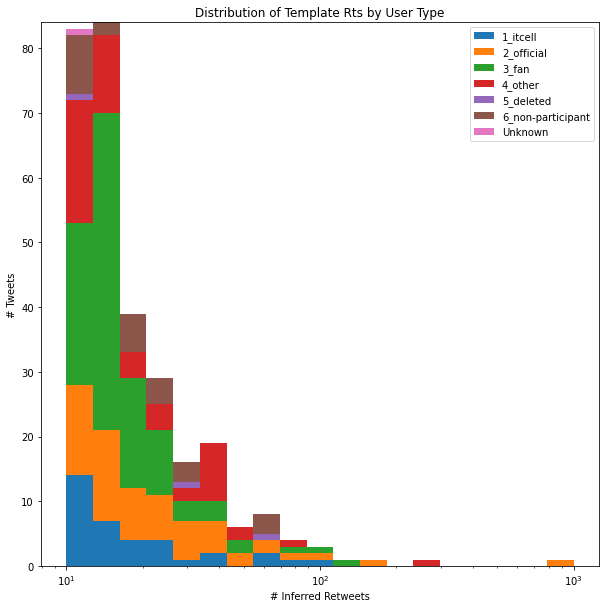

In [26]:
label_dict = summarize_top_tweets(template_rts)#trweets)
keys, values = list(label_dict.keys()), list(label_dict.values())
sorted_keys, sorted_values = zip(*sorted(zip(keys, values), key=lambda x: x[0]))

plt.figure(figsize=(10,10))
logbins = np.geomspace(10, 1000, 20)
plt.hist(sorted_values, stacked=True, label=sorted_keys, bins=logbins)#, density=True)
plt.legend()
plt.xscale('log')
plt.xlabel('# Inferred Retweets')
plt.ylabel('# Tweets')
plt.title('Distribution of Template Rts by User Type')
#plt.savefig('top_tweets_by_user.png')

## Campaigns

In [29]:
for tag, tweets in campaigns.items():
    for t_id, tweet in tweets.items():
        print(tweet)
    break

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


{'username': 'bjym4gumla', 'id': '1097127234706370561', 'retweet_from': '', 'template': 'पिछले 4 साल में 1,22,434 राष्ट्रीय राजमार्गों की लंबाई हो चुकी है पूरे देश में और झारखण्ड में 3,400 किलोमीटर। ताकि बेहतर कनेक्टिविटी के साथ मिले सुखद और तेज यात्रा का अहसास। #jharkhandwithmodi\n', 'retweet_id': '', 'text': 'पिछले\xa04\xa0साल में\xa01,22,434\xa0राष्ट्रीय राजमार्गों की लंबाई हो चुकी है पूरे देश में और झारखण्ड में\xa03,400\xa0किलोमीटर। ताकि बेहतर कनेक्टिविटी के साथ मिले सुखद और तेज यात्रा का अहसास।#jharkhandwithmodi', 'date': datetime.datetime(2019, 2, 17, 13, 34, 51), 'retweets': 0, 'favorites': 0}
{'username': 'bjp4gumla1', 'id': '1172083613816385536', 'retweet_from': 'dasraghubar', 'template': '', 'retweet_id': '1172071280012451841', 'text': 'rt @dasraghubar: विकास हमारी प्राथमिकता भी है और हमारी प्रतिबद्धता भी है। विकास का हमारा वादा भी अटल इरादा है। आज जितनी तेजी से देश चल रहा है उतनी तेजी से पहले कभी नहीं चला: पीएम श्री @narendramodi #jharkhandwithmodi https://t.co/e3domevtwx', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


# Pickle All Cascades for a certain hashtag

In [6]:
campaign_dict = {tag: parse_cascades(*process_tweet_ts(tweets.values())) for tag, tweets in campaigns.items()}

In [7]:
with open('campaign_cascades.pkl', 'wb') as f:
    pickle.dump(campaign_dict, f)

## Bulk Build Temporal Cascades

In [8]:
def construct_temporal_cascade(cascade):
    cascade.create_temporal_cascade()

In [9]:
for tag, tweets in campaigns.items():
    parse_cascades_low_mem(*process_tweet_ts(tweets.values()), cascade_func=construct_temporal_cascade)

 70%|███████   | 5006/7136 [07:10<00:22, 93.50it/s]  

list index out of range
list index out of range
list index out of range


 90%|████████▉ | 6400/7136 [07:13<00:01, 431.61it/s]

list index out of range
list index out of range
list index out of range


 91%|█████████ | 6492/7136 [07:13<00:01, 409.24it/s]

list index out of range


 20%|██        | 61857/302960 [12:13<18:55, 212.35it/s]   

list index out of range


 48%|████▊     | 146486/302960 [26:37<17:20, 150.36it/s]   

list index out of range


 70%|██████▉   | 19820/28380 [02:38<06:00, 23.74it/s] 

list index out of range


  0%|          | 0/1646 [00:00<?, ?it/s]

list index out of range
list index out of range
list index out of range


 58%|█████▊    | 1343/2319 [00:18<00:04, 213.73it/s]

list index out of range
list index out of range


 45%|████▌     | 16204/35888 [08:00<21:26, 15.30it/s]   

list index out of range


 56%|█████▌    | 20154/35888 [12:19<59:32,  4.40it/s]   

list index out of range


 84%|████████▎ | 30051/35888 [16:05<00:20, 289.84it/s]  

list index out of range


 17%|█▋        | 19756/119705 [06:06<10:09, 163.95it/s]  

list index out of range


 18%|█▊        | 21120/119705 [06:50<04:45, 345.57it/s] 

list index out of range


 22%|██▏       | 26903/119705 [08:45<11:32, 133.97it/s]  

list index out of range


 23%|██▎       | 27376/119705 [08:46<05:17, 290.95it/s]

list index out of range


 38%|███▊      | 44986/119705 [10:05<02:02, 607.88it/s] 

list index out of range
list index out of range


 40%|████      | 48006/119705 [10:18<05:55, 201.91it/s]

list index out of range
list index out of range


100%|██████████| 2994/2994 [02:54<00:00, 17.17it/s] 


### Installing Conda Packages from Notebook

In [1]:
import sys
!conda install --yes --prefix {sys.prefix} -c conda-forge sentence-transformers

Fetching package metadata ...........
Solving package specifications: 

PackageNotFoundError: Dependency missing in current linux-64 channels: 
  - sentence-transformers -> pytorch >=1.0.1

